In [55]:
#Using matplotlib for image loading and ploting
#Using numpy library to manipulate images
from matplotlib import pyplot
import numpy as np
import math


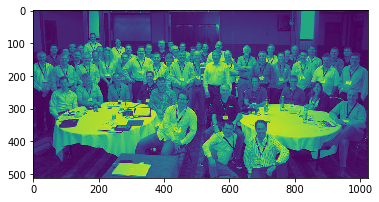

In [56]:
groupImage = pyplot.imread("groupGray.jpg")
baba_g = pyplot.imread("boothiGray.jpg")
pyplot.imshow(groupImage)

In [57]:
#Getting height and width of both images for template matching
shape_baba_image = baba_g.shape
shape_group_image = groupImage.shape
height_baba_image = shape_baba_image[0]
width_baba_image = shape_baba_image[1]
height_group_image = shape_group_image[0]
width_group_image = shape_group_image[1]

In [58]:
Initial_population = 100
#Generating random numbers for 50 population
random_50_height_group_image = np.random.randint(0,height_group_image+1,Initial_population)
random_50_width_group_image = np.random.randint(0,width_group_image+1,Initial_population)

In [59]:
#Slicing 50 population of same shape as baba g shape
#Getting fitness of each sliced image with baba g
pop_50 = []
for i in range(Initial_population):
    #checking slice height is it out side group image 
    random_height = random_50_height_group_image[i]
    check_height = height_group_image - random_height
    if check_height>=height_baba_image:
        random_width = random_50_width_group_image[i]
        check_width = width_group_image - random_width
        if check_width>=width_baba_image:
            temp_slice = groupImage[random_50_height_group_image[i]:random_50_height_group_image[i]+height_baba_image,
                                   random_50_width_group_image[i]:random_50_width_group_image[i]+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[random_50_height_group_image[i]:random_50_height_group_image[i]+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])
            
    else:
        height = height_group_image-height_baba_image
        random_width = random_50_width_group_image[i]
        check_width = width_group_image - random_width
        if check_width>=width_baba_image:
            temp_slice = groupImage[height:height+height_baba_image,
                                   random_50_width_group_image[i]:random_50_width_group_image[i]+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[height:height+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])

In [60]:
sorted_pop_50 = sorted(pop_50,key=lambda x:x[0],reverse=True)

In [61]:
def Cross_over_mutation(x1,y1,x2,y2,height_group_image,width_group_image):
    total_bits_height = int(math.ceil(math.log2(height_group_image)))
    total_bits_width = int(math.ceil(math.log2(width_group_image)))
    x1_bin = bin(x1)
    x1_bin = x1_bin[2:]
    y1_bin = bin(y1)
    y1_bin = y1_bin[2:]
    x2_bin = bin(x2)
    x2_bin = x2_bin[2:]
    y2_bin = bin(y2)
    y2_bin = y2_bin[2:]
    check1 = total_bits_height - len(x1_bin)
    check2 = total_bits_width - len(y1_bin)
    check3 = total_bits_height - len(x2_bin)
    check4 = total_bits_width - len(y2_bin)
    if check1 > 0:
        for i in range(check1):
            x1_bin = '0' + x1_bin
        if check2 > 0:
            for j in range(check2):
                y1_bin = '0' + y1_bin
    if check3 > 0:
        for i in range(check3):
            x2_bin = '0' + x2_bin
        if check4 > 0:
            for j in range(check4):
                y2_bin = '0' + y2_bin
    len_x1_bin = len(x1_bin)
    len_y1_bin = len(y1_bin)
    len_x2_bin = len(x2_bin)
    len_y2_bin = len(y2_bin)
    x1_x2 = x1_bin + x2_bin
    y1_y2 = y1_bin + y2_bin
    x1_x2 = list(map(int,x1_x2))
    y1_y2 = list(map(int,y1_y2))
    #Cross over
    len_x1_x2 = len(x1_x2)
    len_y1_y2 = len(y1_y2)
    for i in range(len_y1_y2//2):
        random_index_x1_x2 = np.random.randint(0,len_x1_x2)
        random_index_y1_y2 = np.random.randint(0,len_y1_y2)
        #swaping
        temp = y1_y2[random_index_y1_y2]
        y1_y2[random_index_y1_y2] = x1_x2[random_index_x1_x2]
        x1_x2[random_index_x1_x2] = temp
    #mutation
    for i in range(len_x1_x2//len_x1_x2):
        random_index_x1_x2 = np.random.randint(0,len_x1_x2)
        random_index_y1_y2 = np.random.randint(0,len_y1_y2)
        check = x1_x2[random_index_x1_x2]
        if check == 0:
            x1_x2[random_index_x1_x2] = 1
            check2 = y1_y2[random_index_y1_y2]
            if check2 == 0:
                y1_y2[random_index_y1_y2] = 1
            else:
                y1_y2[random_index_y1_y2] = 0
        else:
            x1_x2[random_index_x1_x2] = 0
            check2 = y1_y2[random_index_y1_y2]
            if check2 == 0:
                y1_y2[random_index_y1_y2] = 1
            else:
                y1_y2[random_index_y1_y2] = 0
    x1_x2 = list(map(str,x1_x2))
    y1_y2 = list(map(str,y1_y2))
    x1_x2 = ''.join(map(str,x1_x2))
    x1 = x1_x2[:len_x1_bin]
    x2 = x1_x2[len_x1_bin:]
    y1_y2 = ''.join(map(str,y1_y2))
    y1 = y1_y2[:len_y1_bin]
    y2 = y1_y2[len_y1_bin:]
    x1 = "0b" + x1
    x1 = int(x1,2)
    x2 = "0b" + x2
    x2 = int(x2,2)
    y1 = "0b" + y1
    y1 = int(y1,2)
    y2 = "0b" + y2
    y2 = int(y2,2)
    return x1,y1,x2,y2
def fitness(x,y,height_baba_image,width_baba_image,height_group_image,width_group_image,groupImage,baba_g):
    check_height = height_group_image - x
    if check_height >= height_baba_image:
        check_width = width_group_image - y
        if check_width >= width_baba_image:
            temp_slice = groupImage[x:x+height_baba_image,y:y+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[x:x+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness
            
    else:
        height = height_group_image-height_baba_image
        check_width = width_group_image - y
        if check_width >= width_baba_image:
            temp_slice = groupImage[height:height+height_baba_image,y:y+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[height:height+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness

In [62]:
if sorted_pop_50[0][0] >= 0.90:
    print("Baba Ji is found in First Generation")
    print(sorted_pop_50[0][0])
else:
    #Cross over and mutation for evolution towards best possibly match for baba g
    Best_match = sorted_pop_50[0][0]
    print(Best_match)
    a=1
    Fitness_of_Generations = []
    Generations = []
    while a<=20000000:
        Fitness_of_Generations.append(sorted_pop_50[0][0])
        Generations.append(a)
        if sorted_pop_50[0][0] >= 0.7:
            print(f"Baba Ji is found in Generation {a}")
            print(sorted_pop_50[0])
        Second_parent = 1
        for i in range(0,len(sorted_pop_50),2):
            x1 = sorted_pop_50[i][1]
            y1 = sorted_pop_50[i][2]
            x2 = sorted_pop_50[Second_parent][1]
            y2 = sorted_pop_50[Second_parent][2]
            New_Generation = Cross_over_mutation(x1,y1,x2,y2,height_group_image,width_group_image)
            print(x1,y1,x2,y2)
            print(New_Generation)
            for j in range(2):
                if j == 0:
                    Fitness = fitness(New_Generation[0],New_Generation[1],height_baba_image,width_baba_image,height_group_image,width_group_image,groupImage,baba_g)
                    sorted_pop_50[i][0] = Fitness
                    sorted_pop_50[i][1] = New_Generation[0]
                    sorted_pop_50[i][2] = New_Generation[1]
                else:
                    Fitness = fitness(New_Generation[2],New_Generation[3],height_baba_image,width_baba_image,height_group_image,width_group_image,groupImage,baba_g)
                    sorted_pop_50[Second_parent][0] = Fitness
                    sorted_pop_50[Second_parent][1] = New_Generation[2]
                    sorted_pop_50[Second_parent][2] = New_Generation[3]
            Second_parent = Second_parent + 2                                                                                                                                                                                         
        a = a + 1
        sorted_pop_50 = sorted(sorted_pop_50,key=lambda x:x[0],reverse=True)
pyplot.plot(Generations,Fitness_of_Generations)
pyplot.show()

0.4046739088665011
9
10
10001100
1101010010
100111010
1001111100
After adding 0 bit
010001100
1101010010
100111010
1001111100
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
0b110000100
0b100101010
0b1001001000
0b1011101101
140 850 314 636
(388, 584, 298, 749)
9
10
11011101
1001001000
100100000
1111101101
After adding 0 bit
011011101
1001001000
100100000
1111101101
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
0b011010101
0b100100100
0b1001001110
0b0110000101
221 584 288 1005
(213, 590, 292, 389)
9
10
101000000
11000
10110011
1100100
After adding 0 bit
101000000
11000
010110011
0001100100
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
0b101001000
0b010110011
0b10000
0b0100100100
320 24 179 100
(328, 16, 179, 292)
9
10
11

9
10
100001111
1110011000
100100111
1111
After adding 0 bit
100001111
1110011000
100100111
1111
After mutation cross over
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]
0b110001101
0b100101101
0b1010011110
0b1011
271 920 295 15
(397, 670, 301, 11)
9
10
101110011
1001001011
111111100
1001100101
After adding 0 bit
101110011
1001001011
111111100
1001100101
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
0b101100110
0b111011110
0b1011101111
0b1010100101
371 587 508 613
(358, 751, 478, 677)
9
10
1010100
1001100010
111101000
1001100111
After adding 0 bit
001010100
1001100010
111101000
1001100111
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]
0b101010100
0b010110000
0b1001110110
0b1000100111
84 610 488 615
(340, 630, 176, 551)
9
10
110111101
1000101100
1000

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
0b111001001
0b011000101
0b100010101
0b1001111111
463 274 21 255
(457, 277, 197, 639)
9
10
10010011
1100011011
11001011
1110111100
After adding 0 bit
010010011
1100011011
011001011
1110111100
After mutation cross over
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
0b011111111
0b011001011
0b0100011010
0b1100101100
147 795 203 956
(255, 282, 203, 812)
9
10
10010011
101010010
10011101
1110001010
After adding 0 bit
010010011
0101010010
010011101
1110001010
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
0b010010011
0b010010111
0b0101110110
0b1000001010
147 338 157 906
(147, 374, 151, 522)
9
10
101011001
1100110011
101001000
1000100
After adding 0 bit
101011001
1100110011
101001000
1000100
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0

101110100
After adding 0 bit
100100100
110000101
100001001
101110100
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]
0b100101100
0b000000011
0b110010101
0b100100101
292 389 265 372
(300, 405, 3, 293)
9
10
101010100
1001110110
111111110
1010011
After adding 0 bit
101010100
1001110110
111111110
1010011
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
0b101001111
0b111101110
0b1101000110
0b1110010
340 630 510 83
(335, 838, 494, 114)
9
10
101111000
110110011
110010000
100010111
After adding 0 bit
101111000
110110011
110010000
100010111
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
0b111011000
0b110000000
0b110111011
0b000010110
376 435 400 279
(472, 443, 384, 22)
9
10
10011010
101000100
111111001
11001101
After adding 0 bit
01001101

0b0000001011
0b0111001
128 586 294 127
(385, 11, 374, 57)
9
10
10101111
10001111
11110
111000101
After adding 0 bit
010101111
0010001111
000011110
0111000101
After mutation cross over
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
0b010011111
0b110111110
0b0010000101
0b0101010111
175 143 30 453
(159, 133, 446, 343)
9
10
10111011
1010100110
1100110
1111010001
After adding 0 bit
010111011
1010100110
001100110
1111010001
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]
0b010011010
0b101000100
0b0101101111
0b1111010101
187 678 102 977
(154, 367, 324, 981)
9
10
11110110
1001101010
10110011
1010111101
After adding 0 bit
011110110
1001101010
010110011
1010111101
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]
0b111110110
0b110110010
0b100110

9
10
100101
1001111010
101101000
1101000000
After adding 0 bit
000100101
1001111010
101101000
1101000000
After mutation cross over
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
0b000110100
0b001111000
0b1000111010
0b0111100000
37 634 360 832
(52, 570, 120, 480)
9
10
110111111
1110110
101101
1101100010
After adding 0 bit
110111111
1110110
000101101
1101100010
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
0b110101111
0b100110100
0b1010110
0b1110111010
447 118 45 866
(431, 86, 308, 954)
9
10
111011000
11110001
10010000
10100010
After adding 0 bit
111011000
11110001
010010000
0010100010
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
0b111001001
0b010100110
0b10010101
0b0000010010
472 241 144 162
(457, 149, 166, 18)
9
10
101001011
1101000100
1000111

9
10
1101000
1110110101
11000011
10110011
After adding 0 bit
001101000
1110110101
011000011
0010110011
After mutation cross over
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
0b010101010
0b001000011
0b1110110111
0b0110100010
104 949 195 179
(170, 951, 67, 418)
9
10
101111010
111110
101001101
10000101
After adding 0 bit
101111010
111110
101001101
10000101
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
0b101111111
0b100001101
0b011110
0b00000100
378 62 333 133
(383, 30, 269, 4)
9
10
10111
11011011
11000111
1110010100
After adding 0 bit
000010111
0011011011
011000111
1110010100
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]
0b101010111
0b010000011
0b0010001110
0b1100010101
23 219 199 916
(343, 142, 131, 789)
9
10
11010
1011110
110100100
1000010
After 

10
101001000
1000100
1110111
1100101010
After adding 0 bit
101001000
1000100
001110111
1100101010
After mutation cross over
[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
0b101011000
0b001111111
0b1000101
0b1110001000
328 68 119 810
(344, 69, 127, 904)
9
10
110001010
11
111010100
101010011
After adding 0 bit
110001010
11
111010100
101010011
After mutation cross over
[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]
0b110001110
0b101100100
0b11
0b000010011
394 3 468 339
(398, 3, 356, 19)
9
10
1011011
101011011
10000001
11110111
After adding 0 bit
001011011
0101011011
010000001
0011110111
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
0b001110011
0b010010110
0b0100110011
0b0101110101
91 347 129 247
(115, 307, 150, 373)
9
10
100010100
111111010
111
1010110110
After adding 0 bit
100010100
111111010


9
10
10011100
111001001
111110010
11110101
After adding 0 bit
010011100
0111001001
111110010
11110101
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
0b110110000
0b101111110
0b0100011011
0b11111101
156 457 498 245
(432, 283, 382, 253)
9
10
101011
1001000000
11110011
1101011000
After adding 0 bit
000101011
1001000000
011110011
1101011000
After mutation cross over
[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
0b000111011
0b011110010
0b1011000110
0b1101001000
43 576 243 856
(59, 710, 242, 840)
9
10
1111111
1110001000
110001110
11
After adding 0 bit
001111111
1110001000
110001110
11
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
0b010111110
0b111001010
0b1110110010
0b01
127 904 398 3
(190, 946, 458, 1)
9
10
11101000
111001
111100111
1100111
After adding 0 bit
01110

9
10
100010100
110111000
101001100
1101
After adding 0 bit
100010100
110111000
101001100
1101
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
0b111010000
0b111000100
0b111101010
0b0111
276 440 332 13
(464, 490, 452, 7)
9
10
101001010
101001
100000
11101001
After adding 0 bit
101001010
101001
000100000
0011101001
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0]
0b101001010
0b100110010
0b001001
0b0011101010
330 41 32 233
(330, 9, 306, 234)
9
10
11000101
1111110000
1100001
110001010
After adding 0 bit
011000101
1111110000
001100001
0110001010
After mutation cross over
[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
0b011011100
0b010100101
0b1011110010
0b0010000010
197 1008 97 394
(220, 754, 165, 130)
9
10
111011011
1001111000
101110011
1001101101
After adding 0 bit
11101

9
10
100110010
11101010
111001010
1
After adding 0 bit
100110010
11101010
111001010
1
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 1]
0b110110010
0b111011010
0b10110011
0b1
306 234 458 1
(434, 179, 474, 1)
9
10
11101110
1011100111
101001111
100011111
After adding 0 bit
011101110
1011100111
101001111
100011111
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
0b011101110
0b011110111
0b1111100011
0b101011111
238 743 335 287
(238, 995, 247, 351)
9
10
100001100
110
100110110
101010010
After adding 0 bit
100001100
110
100110110
101010010
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
0b100001101
0b000100010
0b011
0b101011110
268 6 310 338
(269, 3, 34, 350)
9
10
10100100
1011100111
110110111
111010010
After adding 0 bit
010100100
1011100111
110110111
111010010
After mutation

9
10
101100111
10
101000011
1000000101
After adding 0 bit
101100111
10
101000011
1000000101
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
0b111100101
0b100001001
0b11
0b0001010001
359 2 323 517
(485, 3, 265, 81)
9
10
1100011
1001110101
10111010
10101100
After adding 0 bit
001100011
1001110101
010111010
0010101100
After mutation cross over
[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
0b001000011
0b110111110
0b1001110111
0b0000001100
99 629 186 172
(67, 631, 446, 12)
9
10
101000010
1111
11010110
1001110010
After adding 0 bit
101000010
1111
011010110
1001110010
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
0b111010011
0b010010110
0b1110
0b0011010010
322 15 214 626
(467, 14, 150, 210)
9
10
11101110
1100001110
1100000
1101101011
After adding 0 bit
011101110
1100001110
00110

9
10
101100000
11000
110010001
11001
After adding 0 bit
101100000
11000
110010001
11001
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
0b101100000
0b111011101
0b00000
0b10001
352 24 401 25
(352, 0, 477, 17)
9
10
10111111
1001001110
101001110
11100
After adding 0 bit
010111111
1001001110
101001110
11100
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0b010101110
0b111001010
0b1001001101
0b11111
191 590 334 28
(174, 589, 458, 31)
9
10
10011110
1101000
110101011
10100001
After adding 0 bit
010011110
0001101000
110101011
10100001
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]
0b000011101
0b110100111
0b1011101000
0b10101001
158 104 427 161
(29, 744, 423, 169)
9
10
110010110
1100
100011000
1110110
After adding 0 bit
110010110
1100
100011000
1110110
After mutation

After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
0b101011100
0b010011111
0b1111100001
0b1011001010
236 483 222 653
(348, 993, 159, 714)
9
10
100110010
10010111
110100110
111
After adding 0 bit
100110010
10010111
110100110
111
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
0b100110010
0b110111101
0b10010011
0b011
306 151 422 7
(306, 147, 445, 3)
9
10
11000111
1010101
11011000
1100000011
After adding 0 bit
011000111
0001010101
011011000
1100000011
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
0b011100111
0b101111000
0b1001000101
0b0110010010
199 85 216 771
(231, 581, 376, 402)
9
10
110100000
100000
111111011
111011000
After adding 0 bit
110100000
100000
111111011
111011000
After mutation cross over
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 

9
10
111001010
11111
111110111
1
After adding 0 bit
111001010
11111
111110111
1
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1]
0b111001011
0b111110111
0b01111
0b1
458 31 503 1
(459, 15, 503, 1)
9
10
100010111
1000011101
100100100
1
After adding 0 bit
100010111
1000011101
100100100
1
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
0b100010011
0b101100100
0b1010011010
0b1
279 541 292 1
(275, 666, 356, 1)
9
10
111001101
1010000
111001100
0
After adding 0 bit
111001101
1010000
111001100
0
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 0]
0b111001101
0b101001101
0b1010000
0b0
461 80 460 0
(461, 80, 333, 0)
9
10
10100110
101001101
1110011
101100111
After adding 0 bit
010100110
0101001101
001110011
0101100111
After mutation cross over
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

9
10
11110111
101111100
100011100
111111
After adding 0 bit
011110111
0101111100
100011100
111111
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
0b111110111
0b101110100
0b0111110000
0b110111
247 380 284 63
(503, 496, 372, 55)
9
10
1001101
1101101111
101110001
1001100101
After adding 0 bit
001001101
1101101111
101110001
1001100101
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]
0b011101101
0b101011001
0b1110100101
0b1001101111
77 879 369 613
(237, 933, 345, 623)
9
10
10111001
110101111
1011000
1110101
After adding 0 bit
010111001
0110101111
001011000
0001110101
After mutation cross over
[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
0b000111101
0b001111001
0b0110110101
0b0001111011
185 431 88 117
(61, 437, 121, 123)
9
10
10110110
1110110111
1011

9
10
111110111
111110000
110111100
101
After adding 0 bit
111110111
111110000
110111100
101
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
0b110110001
0b110111110
0b111010001
0b011
503 496 444 5
(433, 465, 446, 3)
9
10
101010110
11101
10000000
1011110
After adding 0 bit
101010110
11101
010000000
0001011110
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
0b110010110
0b010010000
0b11101
0b0111011010
342 29 128 94
(406, 29, 144, 474)
9
10
1000001
1110111110
10101000
1000010
After adding 0 bit
001000001
1110111110
010101000
0001000010
After mutation cross over
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
0b011000001
0b110011010
0b1000111000
0b0101000001
65 958 168 66
(193, 568, 410, 321)
9
10
110001011
1
100111
1000111101
After adding 0 bit
110001011
1
000100111
1000111101

(333, 104, 412, 437)
9
10
100111011
11
111001011
1010000
After adding 0 bit
100111011
11
111001011
1010000
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 1, 0]
0b001111011
0b111001011
0b11
0b1010110
315 3 459 80
(123, 3, 459, 86)
9
10
110101110
1
11101101
1110100101
After adding 0 bit
110101110
1
011101101
1110100101
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
0b110100100
0b011101101
0b1
0b1110110001
430 1 237 933
(420, 1, 237, 945)
9
10
10011010
100000100
11111001
111111011
After adding 0 bit
010011010
0100000100
011111001
0111111011
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
0b010111101
0b011110001
0b0000100000
0b1011111011
154 260 249 507
(189, 32, 241, 763)
9
10
11001000
11010110
110100110
1000
After adding 0 bit
011001000
0011010110
110100110
1000
After mutat

9
10
101011011
1001011011
1011
1001011001
After adding 0 bit
101011011
1001011011
000001011
1001011001
After mutation cross over
[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]
0b100111110
0b000001110
0b0011111010
0b1001110001
347 603 11 601
(318, 250, 14, 625)
9
10
110100100
1
110101011
1000101
After adding 0 bit
110100100
1
110101011
1000101
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 1, 1, 0, 1]
0b100000100
0b010101011
0b0
0b1011101
420 1 427 69
(260, 0, 171, 93)
9
10
10011010
1110101101
100111101
11110010
After adding 0 bit
010011010
1110101101
100111101
11110010
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
0b010011010
0b111010101
0b0110111101
0b11110010
154 941 317 242
(154, 445, 469, 242)
9
10
10111001
111010011
10010100
10000100
After adding 0 bit
010111001
0111010011
01001

9
10
110010
1101
111001000
1111000111
After adding 0 bit
000110010
0000001101
111001000
1111000111
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b100111010
0b001000000
0b0011001101
0b1011100110
50 13 456 967
(314, 205, 64, 742)
9
10
100111100
110010010
111000011
1
After adding 0 bit
100111100
110010010
111000011
1
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
0b001111000
0b111000110
0b011000111
0b1
316 402 451 1
(120, 199, 454, 1)
9
10
100011110
1
101011111
11101010
After adding 0 bit
100011110
1
101011111
11101010
After mutation cross over
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0]
0b101011010
0b101011111
0b1
0b11111000
286 1 351 234
(346, 1, 351, 248)
9
10
111010101
11110010
10010111
1110000000
After adding 0 bit
111010101
11110010
010010111
1110000000
After mutation cross over
[1, 1,

[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
0b010011010
0b110001101
0b0100101100
0b0000101110
178 36 133 870
(154, 300, 397, 46)
9
10
101110110
0
100100111
1000111010
After adding 0 bit
101110110
0
100100111
1000111010
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
0b101100110
0b100000111
0b0
0b1011111010
374 0 295 570
(358, 0, 263, 762)
9
10
10000010
11000111
101110111
110101
After adding 0 bit
010000010
0011000111
101110111
110101
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1]
0b110000010
0b100111001
0b0011000111
0b100101
130 199 375 53
(386, 199, 313, 37)
9
10
11011110
1101010000
100101011
11111110
After adding 0 bit
011011110
1101010000
100101011
11111110
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
0b111011100
0b110100011
0b11

101101101
After adding 0 bit
110011111
101101100
010101110
0101101101
After mutation cross over
[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]
0b101011010
0b001101110
0b101110100
0b0101001111
415 364 174 365
(346, 372, 110, 335)
9
10
10011010
100101100
100111101
1101000
After adding 0 bit
010011010
0100101100
100111101
1101000
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
0b110111010
0b000111101
0b0101111000
0b0100000
154 300 317 104
(442, 376, 61, 32)
9
10
10111010
1011100101
111101010
1011100110
After adding 0 bit
010111010
1011100101
111101010
1011100110
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
0b010111001
0b011000011
0b1111000111
0b1010110111
186 741 490 742
(185, 967, 195, 695)
9
10
100000001
1111101011
110010100
1
After adding 0 b

111101111
After adding 0 bit
000010100
0000000001
111011100
111101111
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
0b000011100
0b001011110
0b0000010101
0b110101101
20 1 476 495
(28, 21, 94, 429)
9
10
10100010
1000001
111101
1110101
After adding 0 bit
010100010
0001000001
000111101
0001110101
After mutation cross over
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
0b111000000
0b010101101
0b0011100000
0b0101110110
162 65 61 117
(448, 224, 173, 374)
9
10
101110011
100000110
11001101
110010
After adding 0 bit
101110011
100000110
011001101
0000110010
After mutation cross over
[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
0b101111011
0b011001100
0b100111100
0b0000110010
371 262 205 50
(379, 316, 204, 50)
9
10
110001101
1
111000111
100111111
After adding 0 bit
110001

9
10
110101111
1111
10111101
10011111
After adding 0 bit
110101111
1111
010111101
0010011111
After mutation cross over
[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]
0b110101011
0b110110101
0b0111
0b0011011110
431 15 189 159
(427, 7, 437, 222)
9
10
100111000
101
101110111
1101101011
After adding 0 bit
100111000
101
101110111
1101101011
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
0b110111000
0b100100110
0b111
0b1101001011
312 5 375 875
(440, 7, 294, 843)
9
10
110011001
1001100010
1110001
111111
After adding 0 bit
110011001
1001100010
001110001
0000111111
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
0b110100001
0b001110011
0b1001100010
0b0001111110
409 610 113 63
(417, 610, 115, 126)
9
10
111101
100000
101010101
1110
After adding 0 bit
000111101
0000100000
101010101


9
10
111000000
11100000
1100110
1011101000
After adding 0 bit
111000000
11100000
001100110
1011101000
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
0b110000000
0b001110000
0b11101101
0b0011101000
448 224 102 744
(384, 237, 112, 232)
9
10
1000010
11000111
110101101
101
After adding 0 bit
001000010
0011000111
110101101
101
After mutation cross over
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
0b011000001
0b111101001
0b1111001111
0b000
66 199 429 5
(193, 975, 489, 0)
9
10
111010010
101110111
11010111
101100101
After adding 0 bit
111010010
101110111
011010111
0101100101
After mutation cross over
[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
0b101010010
0b011010101
0b011010111
0b0101110101
466 375 215 357
(338, 215, 213, 373)
9
10
110101011
111
111101111
111101
After adding 0 bit
1101010

9
10
111111110
111
111000100
1001101
After adding 0 bit
111111110
111
111000100
1001101
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1]
0b111111110
0b111000100
0b111
0b1000001
510 7 452 77
(510, 7, 452, 65)
9
10
1001001
101000001
111000011
1011011000
After adding 0 bit
001001001
0101000001
111000011
1011011000
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
0b101001101
0b001000011
0b0100000101
0b1011010001
73 321 451 728
(333, 261, 67, 721)
9
10
11111001
101010111
10101101
111100101
After adding 0 bit
011111001
0101010111
010101101
0111100101
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]
0b011111011
0b010101110
0b0111010101
0b0011001110
249 343 173 485
(251, 469, 174, 206)
9
10
101011010
101010100
111110001
110
After adding 0 bit
101011

9
10
10100010
111001101
111000
1010011011
After adding 0 bit
010100010
0111001101
000111000
1010011011
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
0b001110110
0b000101001
0b1101001110
0b1011011001
162 461 56 667
(118, 846, 41, 729)
9
10
11111010
10011
110010110
111
After adding 0 bit
011111010
0000010011
110010110
111
After mutation cross over
[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
0b011011010
0b010011100
0b0110010001
0b110
250 19 406 7
(218, 401, 156, 6)
9
10
1011011
1001111101
10111110
110111110
After adding 0 bit
001011011
1001111101
010111110
0110111110
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
0b101011111
0b011011111
0b1000101000
0b1110011100
91 637 190 446
(351, 552, 223, 924)
9
10
101111010
100110011
111001000
1011001111
After ad

0
After adding 0 bit
110011110
111
110100100
0
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
[1, 1, 0, 0]
0b100011111
0b110101100
0b110
0b0
414 7 420 0
(287, 6, 428, 0)
9
10
110000000
1001101
110100110
101000000
After adding 0 bit
110000000
1001101
110100110
101000000
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
0b110000001
0b110101110
0b1001101
0b001100000
384 77 422 320
(385, 77, 430, 96)
9
10
101100110
1011001
10100000
110011
After adding 0 bit
101100110
1011001
010100000
0000110011
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
0b111100110
0b110100010
0b1011000
0b0000010010
358 89 160 51
(486, 88, 418, 18)
9
10
100011001
1111011
110111010
101010010
After adding 0 bit
100011001
1111011
110111010
101010010
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1

110100101
100010
1011011100
After adding 0 bit
101110100
110100101
000100010
1011011100
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
0b101010110
0b100100010
0b110000101
0b1100011110
372 421 34 732
(342, 389, 290, 798)
9
10
110000000
10101110
11100110
1001111000
After adding 0 bit
110000000
10101110
011100110
1001111000
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
0b111000100
0b101100110
0b10101110
0b1000111001
384 174 230 632
(452, 174, 358, 569)
9
10
111010110
1
110000001
1001101
After adding 0 bit
111010110
1
110000001
1001101
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 1, 1, 1, 1]
0b111110110
0b110000001
0b1
0b1001111
470 1 385 77
(502, 1, 385, 79)
9
10
10100111
1111001110
10100010
110010
After adding 0 bit
010100111
1111001110
010100010
0000110010
Aft

(246, 13, 246, 245)
9
10
110010011
0
101100110
1000111001
After adding 0 bit
110010011
0
101100110
1000111001
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
0b110010011
0b111110111
0b0
0b0000110011
403 0 358 569
(403, 0, 503, 51)
9
10
11011011
1100100110
10001001
1101110110
After adding 0 bit
011011011
1100100110
010001001
1101110110
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
0b011111011
0b011101000
0b1001100100
0b1101110010
219 806 137 886
(251, 612, 232, 882)
9
10
11000001
11011010
110110111
10
After adding 0 bit
011000001
0011011010
110110111
10
After mutation cross over
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]
0b111000000
0b110111111
0b0011001111
0b10
193 218 439 2
(448, 207, 447, 2)
9
10
110000001
1001111
11011100
111
After adding 0 bit
110000001
1001111
011011100
00

9
10
110111111
1
11110111
1100011000
After adding 0 bit
110111111
1
011110111
1100011000
After mutation cross over
[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
0b100111110
0b001110111
0b1
0b1100011010
447 1 247 792
(318, 1, 119, 794)
9
10
110111111
10
110111011
110000101
After adding 0 bit
110111111
10
110111011
110000101
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
0b110111111
0b101111011
0b10
0b110000110
447 2 443 389
(447, 2, 379, 390)
9
10
100110101
1001110
10001100
1101100110
After adding 0 bit
100110101
1001110
010001100
1101100110
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]
0b100110001
0b010100101
0b1011111
0b1111100010
309 78 140 870
(305, 95, 165, 994)
9
10
11110001
1111011
110010100
1011
After adding 0 bit
011110001
0001111011
110010100
1011
After mutation cross over
[0, 1, 0,

9
10
10100101
1011001011
110011011
101100
After adding 0 bit
010100101
1011001011
110011011
101100
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
0b010101101
0b110001011
0b1111001010
0b101100
165 715 411 44
(173, 970, 395, 44)
9
10
1011001
101111011
111000000
1000010101
After adding 0 bit
001011001
0101111011
111000000
1000010101
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]
0b101010101
0b110010110
0b1101101000
0b1001110100
89 379 448 533
(341, 872, 406, 628)
9
10
110011010
1000001000
101010110
1011011000
After adding 0 bit
110011010
1000001000
101010110
1011011000
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
0b010001010
0b101110110
0b1000001010
0b1011001001
410 520 342 728
(138, 522, 374, 713)
9
10
101011111
11111

9
10
11000111
11010100
110000101
100011
After adding 0 bit
011000111
0011010100
110000101
100011
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
0b011000101
0b110000101
0b0011001100
0b100001
199 212 389 35
(197, 204, 389, 33)
9
10
1000011
1100010101
110101
101101
After adding 0 bit
001000011
1100010101
000110101
0000101101
After mutation cross over
[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
0b001000011
0b100010000
0b0100000101
0b0111101111
67 789 53 45
(67, 261, 272, 495)
9
10
110001011
101100
110010010
100010010
After adding 0 bit
110001011
101100
110010010
100010010
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
0b110001011
0b110001011
0b101100
0b100000010
395 44 402 274
(395, 44, 395, 258)
9
10
100010001
100010
111111
111011111
After adding 0 bit
10001

0b10011
466 64 434 22
(216, 64, 418, 19)
9
10
100111110
1
1000111
1101011101
After adding 0 bit
100111110
1
001000111
1101011101
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
0b100111010
0b001000111
0b1
0b1101011001
318 1 71 861
(314, 1, 71, 857)
9
10
10111111
10
111011110
11010111
After adding 0 bit
010111111
0000000010
111011110
11010111
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
0b110011110
0b111011100
0b0110000011
0b11110111
191 2 478 215
(414, 387, 476, 247)
9
10
111110011
11010110
110110000
0
After adding 0 bit
111110011
11010110
110110000
0
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 0, 0]
0b111100011
0b110110001
0b11010110
0b0
499 214 432 0
(483, 214, 433, 0)
9
10
10010111
1100
1110111
1101011100
After adding 0 bit
010010111
0000001100
001110111
1101011100
Afte

9
10
100011101
1010001
110010110
1111011001
After adding 0 bit
100011101
1010001
110010110
1111011001
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
0b101010101
0b010110111
0b0010011
0b1111011011
285 81 406 985
(341, 19, 183, 987)
9
10
1001111
110000111
10011110
100110001
After adding 0 bit
001001111
0110000111
010011110
0100110001
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]
0b011001010
0b010011010
0b0110000101
0b1100110001
79 391 158 305
(202, 389, 154, 817)
9
10
111001011
101011111
1001010
1001011110
After adding 0 bit
111001011
101011111
001001010
1001011110
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
0b011101111
0b110011011
0b101010111
0b1010100110
459 351 74 606
(239, 343, 411, 678)
9
10
11010000
11011010
1

0b010110111
0b1101110110
0b11010010
146 996 503 214
(167, 886, 183, 210)
9
10
100000001
0
100111001
10
After adding 0 bit
100000001
0
100111001
10
After mutation cross over
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
[0, 0, 1]
0b100000001
0b000011001
0b0
0b01
257 0 313 2
(257, 0, 25, 1)
9
10
110101000
1101011011
111011100
1
After adding 0 bit
110101000
1101011011
111011100
1
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0b010100000
0b111011110
0b1111111111
0b1
424 859 476 1
(160, 1023, 478, 1)
9
10
1111010
11100110
101001110
10010
After adding 0 bit
001111010
0011100110
101001110
10010
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
0b000011010
0b101001100
0b1010101110
0b11110
122 230 334 18
(26, 686, 332, 30)
9
10
11101011
111100101
1101110
0
After adding 0 bit
011101011
0111100101
001101110
0000000000
After mutation cross over


9
10
1010101
10011
111101011
1
After adding 0 bit
001010101
0000010011
111101011
1
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
0b011010001
0b111000011
0b1000110000
0b1
85 19 491 1
(209, 560, 451, 1)
9
10
111011110
1
111011001
10
After adding 0 bit
111011110
1
111011001
10
After mutation cross over
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
[0, 1, 0]
0b011011110
0b111011001
0b0
0b10
478 1 473 2
(222, 0, 473, 2)
9
10
100001010
1011000111
111000101
1100110011
After adding 0 bit
100001010
1011000111
111000101
1100110011
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]
0b100001010
0b011000111
0b1001000111
0b1111000001
266 711 453 819
(266, 583, 199, 961)
9
10
100000001
0
1001100
1100100
After adding 0 bit
100000001
0
001001100
0001100100
After mutation cross over
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]


9
10
1011011
1100100
101111010
11
After adding 0 bit
001011011
0001100100
101111010
11
After mutation cross over
[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
0b001001011
0b100111000
0b0101110101
0b11
91 100 378 3
(75, 373, 312, 3)
9
10
11101
1000000011
11010001
1000110000
After adding 0 bit
000011101
1000000011
011010001
1000110000
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
0b100001100
0b111010000
0b1000000111
0b1101010100
29 515 209 560
(268, 519, 464, 852)
9
10
111111100
11
100011111
11010010
After adding 0 bit
111111100
11
100011111
11010010
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
0b111111000
0b100011111
0b10
0b10011010
508 3 287 210
(504, 2, 287, 154)
9
10
10001100
111111
111111
1001100100
After adding 0 bit
010001100
0000111111
000111111
1001100100
After mutation cro

0110110011
000100001
0100100001
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]
0b010111000
0b000000001
0b0110101001
0b1111100001
253 435 33 289
(184, 425, 1, 993)
9
10
110010010
1110100110
1001011
101110101
After adding 0 bit
110010010
1110100110
001001011
0101110101
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
0b010010000
0b000011110
0b1010101110
0b0100101111
402 934 75 373
(144, 686, 30, 303)
9
10
111001100
1000111111
111111001
1000
After adding 0 bit
111001100
1000111111
111111001
1000
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]
0b111011010
0b111011111
0b1010101110
0b1010
460 575 505 8
(474, 686, 479, 10)
9
10
100011110
1011101000
101101000
110101000
After adding 0 bit
100011110
1011101000
101101000
110101000
After 

9
10
100100000
0
10000
1010000000
After adding 0 bit
100100000
0
000010000
1010000000
After mutation cross over
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
0b100100000
0b000010100
0b1
0b1010000000
288 0 16 640
(288, 1, 20, 640)
9
10
110010110
1010110001
101110110
0
After adding 0 bit
110010110
1010110001
101110110
0
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]
0b110010000
0b101111110
0b1110111101
0b0
406 689 374 0
(400, 957, 382, 0)
9
10
10001100
1111001101
101110110
11100101
After adding 0 bit
010001100
1111001101
101110110
11100101
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1]
0b110000100
0b101110100
0b1111101101
0b11100101
140 973 374 229
(388, 1005, 372, 229)
9
10
101010101
0
100011101
11110011
After adding 0 bit
101010101
0
100011101
11110011
After mutation cross over
[1, 1, 1, 0

0b1011101
469 0 415 73
(452, 0, 415, 93)
9
10
100100001
110100100
101001101
10110011
After adding 0 bit
100100001
110100100
101001101
10110011
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0b000000000
0b101001101
0b110100101
0b10111111
289 420 333 179
(0, 421, 333, 191)
9
10
1110
1110110101
10001001
101100001
After adding 0 bit
000001110
1110110101
010001001
0101100001
After mutation cross over
[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
0b100110110
0b010000001
0b1111010101
0b1110100001
14 949 137 353
(310, 981, 129, 929)
9
10
1101011
1100001011
11011010
11000
After adding 0 bit
001101011
1100001011
011011010
0000011000
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
0b000101011
0b001011000
0b1100111010
0b0001001000
107 779 218 24
(43, 8

9
10
101010000
0
111111101
1101
After adding 0 bit
101010000
0
111111101
1101
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[0, 1, 1, 0, 0]
0b101000000
0b111111101
0b0
0b1100
336 0 509 13
(320, 0, 509, 12)
9
10
1110100
1000010010
1000000
101001101
After adding 0 bit
001110100
1000010010
001000000
0101001101
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]
0b011010000
0b001010100
0b0010011010
0b1101000101
116 530 64 333
(208, 154, 84, 837)
9
10
111010111
1100100111
10111
1100110101
After adding 0 bit
111010111
1100100111
000010111
1100110101
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
0b111110111
0b000011011
0b1010000111
0b1100110101
471 807 23 821
(503, 647, 27, 821)
9
10
110111110
1000
100000001
100011001
After adding 0 bit
110111110
1000
100000001
100011001
Afte

9
10
111101110
1000000001
111000011
11011001
After adding 0 bit
111101110
1000000001
111000011
11011001
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
0b111101110
0b111100001
0b1000000010
0b11111101
494 513 451 217
(494, 514, 481, 253)
9
10
111110101
1010011110
11110001
1
After adding 0 bit
111110101
1010011110
011110001
0000000001
After mutation cross over
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
0b111010101
0b101000011
0b0110001100
0b1000000101
501 670 241 1
(469, 396, 323, 517)
9
10
100110011
101111110
0
110100101
After adding 0 bit
100110011
101111110
000000000
0110100101
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
0b100110011
0b000101100
0b101111110
0b0010000001
307 382 0 421
(307, 382, 44, 129)
9
10
10001110
1110010
101010100

(170, 435, 103, 1000)
9
10
10100110
1100001
111110001
10101100
After adding 0 bit
010100110
0001100001
111110001
10101100
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0]
0b001100110
0b101010001
0b1001100011
0b10001110
166 97 497 172
(102, 611, 337, 142)
9
10
101100111
111100
111110100
11110100
After adding 0 bit
101100111
111100
111110100
11110100
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
0b100010110
0b111110100
0b011100
0b10111110
359 60 500 244
(278, 28, 500, 190)
9
10
100010000
11100111
10100
1000101001
After adding 0 bit
100010000
11100111
000010100
1000101001
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
0b100010000
0b011010000
0b11100011
0b1010001001
272 231 20 553
(272, 227, 208, 649)
9
10
11101010
10001001
11000
1000101000

9
10
11000
1110100010
11110001
1111010100
After adding 0 bit
000011000
1110100010
011110001
1111010100
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
0b000011100
0b111111001
0b0110110001
0b1101010100
24 930 241 980
(28, 433, 505, 852)
9
10
101010011
100110
101000110
111
After adding 0 bit
101010011
100110
101000110
111
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0]
0b101111111
0b101000110
0b100110
0b000
339 38 326 7
(383, 38, 326, 0)
9
10
100001100
11011
101000111
101100
After adding 0 bit
100001100
11011
101000111
101100
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
0b100001100
0b110010011
0b10011
0b010100
268 27 327 44
(268, 19, 403, 20)
9
10
101001101
1101
101000100
1001
After adding 0 bit
101001101
1101
101000100
1001
After mutation cross over
[0, 0, 1, 0, 0, 

9
10
110000100
101110000
1110110
11100011
After adding 0 bit
110000100
101110000
001110110
0011100011
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
0b110010000
0b101101110
0b000110000
0b0011100001
388 368 118 227
(400, 48, 366, 225)
9
10
11001110
1001011100
111110100
10111110
After adding 0 bit
011001110
1001011100
111110100
10111110
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
0b110001010
0b111111000
0b1110000100
0b11111100
206 604 500 190
(394, 900, 504, 252)
9
10
100110110
110010
110110011
1000000001
After adding 0 bit
100110110
110010
110110011
1000000001
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]
0b000100110
0b100111011
0b100010
0b1100001101
310 50 435 513
(38, 34, 315, 781)
9
10
110011011
100110100
1100110
1001100

9
10
1000001
1000000000
100111000
11
After adding 0 bit
001000001
1000000000
100111000
11
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
0b001010001
0b100110100
0b1000000000
0b10
65 512 312 3
(81, 512, 308, 2)
9
10
100011111
10110
110010010
11001100
After adding 0 bit
100011111
10110
110010010
11001100
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
0b100010011
0b110100011
0b11001
0b11101100
287 22 402 204
(275, 25, 419, 236)
9
10
100010001
1100011
11100110
1
After adding 0 bit
100010001
1100011
011100110
0000000001
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
0b110000001
0b001100110
0b1110011
0b0010100010
273 99 230 1
(385, 115, 102, 162)
9
10
11010001
11100111
11011001
100110010
After adding 0 bit
011010001
0011100111
011011001
0100110010
After mutation cr

100010110
0
011000110
1100111100
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
0b110110111
0b011000010
0b0
0b1100111001
278 0 198 828
(439, 0, 194, 825)
9
10
1001001
1000001001
101000000
1
After adding 0 bit
001001001
1000001001
101000000
1
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
0b001111001
0b101100100
0b0000010001
0b0
73 521 320 1
(121, 17, 356, 0)
9
10
101010111
1
1000110
1000001010
After adding 0 bit
101010111
1
001000110
1000001010
After mutation cross over
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
0b101010011
0b001000111
0b1
0b0100001010
343 1 70 522
(339, 1, 71, 266)
9
10
111101011
11001110
10011000
111011
After adding 0 bit
111101011
11001110
010011000
0000111011
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

1010100110
1001110
100111001
After adding 0 bit
110001010
1010100110
001001110
0100111001
After mutation cross over
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
0b110101000
0b001001110
0b1001000110
0b0110111001
394 678 78 313
(424, 582, 78, 441)
9
10
111111110
1
101011010
1001011100
After adding 0 bit
111111110
1
101011010
1001011100
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]
0b111111110
0b101111010
0b1
0b1010111100
510 1 346 604
(510, 1, 378, 700)
9
10
11001101
1000111011
110001111
11110100
After adding 0 bit
011001101
1000111011
110001111
11110100
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
0b011001101
0b110001110
0b1001111001
0b01110001
205 571 399 244
(205, 633, 398, 113)
9
10
101011010
0
101110011
110110111
After adding 0 bit
101011010
0
101110011
11

9
10
111001001
10101111
101100101
10110
After adding 0 bit
111001001
10101111
101100101
10110
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
0b111011111
0b101100001
0b10000101
0b11110
457 175 357 22
(479, 133, 353, 30)
9
10
101001001
11
100000110
1010011
After adding 0 bit
101001001
11
100000110
1010011
After mutation cross over
[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 1, 1, 0, 1, 0, 0, 1, 1]
0b111101001
0b000000110
0b01
0b1010011
329 3 262 83
(489, 1, 6, 83)
9
10
100001000
111101011
101101000
1101001
After adding 0 bit
100001000
111101011
101101000
1101001
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
0b100111000
0b101100000
0b110101011
0b1001000
264 491 360 105
(312, 427, 352, 72)
9
10
10111100
1001011011
10000011
1110110110
After adding 0 bit
010111100
1001011011
010000011
1110110110
After mutation cross over


0b0
0b0100101111
356 0 212 941
(236, 0, 212, 303)
9
10
11110000
110001100
101001110
10101
After adding 0 bit
011110000
0110001100
101001110
10101
After mutation cross over
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
0b011011010
0b111001100
0b0110011100
0b10101
240 396 334 21
(218, 412, 460, 21)
9
10
1001110
110111000
10010100
11100000
After adding 0 bit
001001110
0110111000
010010100
0011100000
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
0b001111010
0b001010000
0b0110111110
0b0010000011
78 440 148 224
(122, 446, 80, 131)
9
10
1010000
1001001100
101111110
1000101100
After adding 0 bit
001010000
1001001100
101111110
1000101100
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
0b101010101
0b101101110
0b0000010110
0b1000100100
80 588 382 556
(341,

After adding 0 bit
001111111
0010100000
000100100
1101001100
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
0b001100111
0b010100110
0b0010110000
0b1101001101
127 160 36 844
(103, 176, 166, 845)
9
10
101010101
10110
10111010
10110100
After adding 0 bit
101010101
10110
010111010
0010110100
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
0b110010101
0b010001010
0b10010
0b1010101100
341 22 186 180
(405, 18, 138, 684)
9
10
101010000
1011111001
10010101
1101100001
After adding 0 bit
101010000
1011111001
010010101
1101100001
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
0b101000000
0b010110000
0b1011111000
0b1101010011
336 761 149 865
(320, 760, 176, 851)
9
10
10010010
11110101
111001000
1011001110
After adding 0 bit
010010010


(324, 220, 76, 331)
9
10
101011010
101011101
100010100
100011011
After adding 0 bit
101011010
101011101
100010100
100011011
After mutation cross over
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
0b101011011
0b100010010
0b101011101
0b100001110
346 349 276 283
(347, 349, 274, 270)
9
10
111010001
100011000
11100
1011110
After adding 0 bit
111010001
100011000
000011100
0001011110
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]
0b110000001
0b000111000
0b111001000
0b0001011111
465 280 28 94
(385, 456, 56, 95)
9
10
11000110
10101
101000011
111000011
After adding 0 bit
011000110
0000010101
101000011
111000011
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]
0b011000110
0b000010011
0b0011110111
0b111000010
198 21 323 451
(198, 247, 19, 450)
9
10
1000100

(312, 0, 9, 135)
9
10
1000000
110110
0
1100000000
After adding 0 bit
001000000
0000110110
000000000
1100000000
After mutation cross over
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
0b001000000
0b100101000
0b0000110010
0b1100000000
64 54 0 768
(64, 50, 296, 768)
9
10
101001111
101001
100010
11101001
After adding 0 bit
101001111
101001
000100010
0011101001
After mutation cross over
[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
0b110001111
0b000100010
0b101101
0b0011001001
335 41 34 233
(399, 45, 34, 201)
9
10
100110
10
101111111
11011
After adding 0 bit
000100110
0000000010
101111111
11011
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
0b000100010
0b101011101
0b0001100010
0b01011
38 2 383 27
(34, 98, 349, 11)
9
10
110011001
1110110001
110111101
0
After adding 0 bit
110011001
111011

9
10
1111100
100110
11000000
1011111100
After adding 0 bit
001111100
0000100110
011000000
1011111100
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
0b001111000
0b011000000
0b0000000110
0b1011101101
124 38 192 764
(120, 6, 192, 749)
9
10
1001
10000111
111010111
101011110
After adding 0 bit
000001001
0010000111
111010111
101011110
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
0b001101011
0b101010011
0b0000000111
0b101001001
9 135 471 350
(107, 7, 339, 329)
9
10
110001111
101101
1000000
110010
After adding 0 bit
110001111
101101
001000000
0000110010
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
0b110001010
0b101000000
0b101001
0b0000101010
399 45 64 50
(394, 41, 320, 42)
9
10
100111110
100100
11100101
100101011
After addi

9
10
100101110
100101
1110000
101000
After adding 0 bit
100101110
100101
001110000
0000101000
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
0b110111110
0b010110001
0b101000
0b0000101000
302 37 112 40
(446, 40, 177, 40)
9
10
11011011
1101000110
101010010
1110
After adding 0 bit
011011011
1101000110
101010010
1110
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
0b001011010
0b101011010
0b1101000110
0b1111
219 838 338 14
(90, 838, 346, 15)
9
10
101011101
1011
10000000
110111010
After adding 0 bit
101011101
1011
010000000
0110111010
After mutation cross over
[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
0b001011101
0b011010001
0b1011
0b0101011000
349 11 128 442
(93, 11, 209, 344)
9
10
100111010
11101111
11110100
1
After adding 0 bit
100111010
11101111
011110100
0000000001
After muta

9
10
1011110
1000110110
10101000
1110111110
After adding 0 bit
001011110
1000110110
010101000
1110111110
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
0b001010010
0b010101011
0b1001100000
0b1110011111
94 566 168 958
(82, 608, 171, 927)
9
10
11010101
1101111
101000010
10
After adding 0 bit
011010101
0001101111
101000010
10
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0]
0b011010101
0b111100000
0b0011101100
0b10
213 111 322 2
(213, 236, 480, 2)
9
10
10001011
10001
110111110
101000
After adding 0 bit
010001011
0000010001
110111110
101000
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
0b010100010
0b010111100
0b1100010001
0b111000
139 17 446 40
(162, 785, 188, 56)
9
10
111000000
1000010
1010101
1000011010
After adding 0 bit
111000000
1000010
0010

9
10
11110100
11011001
110101111
11110110
After adding 0 bit
011110100
0011011001
110101111
11110110
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
0b110110001
0b010101111
0b0011110101
0b10110010
244 217 431 246
(433, 245, 175, 178)
9
10
100100111
1000100100
110001001
11000001
After adding 0 bit
100100111
1000100100
110001001
11000001
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
0b001001101
0b100001001
0b1000010101
0b11000011
295 548 393 193
(77, 533, 265, 195)
9
10
10001101
101110100
1110101
10100110
After adding 0 bit
010001101
0101110100
001110101
0010100110
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
0b000101001
0b000110000
0b0110110100
0b0110110110
141 372 117 166
(41, 436, 48, 438)
9
10
101100001
11101100
1

0111010110
001110101
0101101011
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
0b101100110
0b001001101
0b0110110110
0b0111001011
6 470 117 363
(358, 438, 77, 459)
9
10
101100010
1
110100100
1
After adding 0 bit
101100010
1
110100100
1
After mutation cross over
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 0]
0b100100011
0b110100100
0b0
0b0
354 1 420 1
(291, 0, 420, 0)
9
10
10010000
1011000101
10010101
100111001
After adding 0 bit
010010000
1011000101
010010101
0100111001
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
0b110110100
0b000000101
0b1010000101
0b0100111001
144 709 149 313
(436, 645, 5, 313)
9
10
1010111
11111110
101111
1010010
After adding 0 bit
001010111
0011111110
000101111
0001010010
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 0, 

9
10
101101101
11100000
1110000
1100000001
After adding 0 bit
101101101
11100000
001110000
1100000001
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
0b000100100
0b000010011
0b11100101
0b1110110000
365 224 112 769
(36, 229, 19, 944)
9
10
101001111
10001001
11011000
111001
After adding 0 bit
101001111
10001001
011011000
0000111001
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
0b110000111
0b011000000
0b10000011
0b0011111011
335 137 216 57
(391, 131, 192, 251)
9
10
101111001
10010
111111001
100001000
After adding 0 bit
101111001
10010
111111001
100001000
After mutation cross over
[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
0b011011101
0b111111101
0b00010
0b111000010
377 18 505 264
(221, 2, 509, 450)
9
10
111101010
1111011
110100100
0
After adding 0 bit
11110101

218 570 63 818
(194, 570, 431, 819)
9
10
111101010
111001110
10010110
11110000
After adding 0 bit
111101010
111001110
010010110
0011110000
After mutation cross over
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
0b010101000
0b000010010
0b111111110
0b0110110010
490 462 150 240
(168, 510, 18, 434)
9
10
101001001
111011000
10101000
10110100
After adding 0 bit
101001001
111011000
010101000
0010110100
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
0b001001101
0b000001010
0b110110100
0b0010110101
329 472 168 180
(77, 436, 10, 181)
9
10
110111000
10111000
10111111
1101101
After adding 0 bit
110111000
10111000
010111111
0001101101
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
0b110110001
0b110111101
0b10011000
0b1001101101
440 184 191 109
(433, 152, 

(143, 438, 16, 276)
9
10
110
1010111
100100000
0
After adding 0 bit
000000110
0001010111
100100000
0
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
0b100000100
0b100110010
0b0011010001
0b1
6 87 288 0
(260, 209, 306, 1)
9
10
100110
11000000
11000100
1010100100
After adding 0 bit
000100110
0011000000
011000100
1010100100
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
0b000100110
0b011100000
0b1011000000
0b1010100000
38 192 196 676
(38, 704, 224, 672)
9
10
110011011
1101010101
110100011
100000001
After adding 0 bit
110011011
1101010101
110100011
100000001
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
0b010111011
0b110010011
0b0111011101
0b100100001
411 853 419 257
(187, 477, 403, 289)
9
10
111001001
1010110000
1010000
10101101
After addi

9
10
100111000
10011110
1001000
1110100100
After adding 0 bit
100111000
10011110
001001000
1110100100
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
0b101001100
0b101001101
0b00001010
0b1110101110
312 158 72 932
(332, 10, 333, 942)
9
10
11111011
10100111
11100000
1010100000
After adding 0 bit
011111011
0010100111
011100000
1010100000
After mutation cross over
[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
0b010000011
0b001001100
0b1101100111
0b1010100101
251 167 224 672
(131, 871, 76, 677)
9
10
101010000
1011010000
100111001
1011111101
After adding 0 bit
101010000
1011010000
100111001
1011111101
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
0b101010100
0b010101010
0b1011010101
0b1001111111
336 720 313 765
(340, 725, 170, 639)
9
10
11000

326 334 415 0
(327, 282, 441, 1)
9
10
100101001
11000010
100001111
100001011
After adding 0 bit
100101001
11000010
100001111
100001011
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
0b100001001
0b010001101
0b10110111
0b100001111
297 194 271 267
(265, 183, 141, 271)
9
10
110010111
100100001
110101
10110010
After adding 0 bit
110010111
100100001
000110101
0010110010
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
0b110101101
0b000010101
0b100101001
0b0001110010
407 289 53 178
(429, 297, 21, 114)
9
10
111101100
1100011000
111000110
111110000
After adding 0 bit
111101100
1100011000
111000110
111110000
After mutation cross over
[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
0b110001100
0b011010111
0b1000011011
0b011110010
492 792 454 496
(396, 539, 215

11011111
1110010001
After adding 0 bit
011110101
1111011010
011011111
1110010001
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
0b011100111
0b111111111
0b1101011010
0b0110010001
245 986 223 913
(231, 858, 511, 401)
9
10
101101000
1001110
101001100
1010
After adding 0 bit
101101000
1001110
101001100
1010
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]
0b101110000
0b001001100
0b1001010
0b0110
360 78 332 10
(368, 74, 76, 6)
9
10
11110
100011
101001111
1010
After adding 0 bit
000011110
0000100011
101001111
1010
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
0b100011100
0b001101111
0b0111100011
0b0010
30 35 335 10
(284, 483, 111, 2)
9
10
110000011
1000000
11101001
1101010110
After adding 0 bit
110000011
1000000
011101001
1101010110
After mutation cross ove

9
10
111101111
111011011
10000011
1111100101
After adding 0 bit
111101111
111011011
010000011
1111100101
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
0b011001111
0b010100011
0b101011011
0b0111110101
495 475 131 997
(207, 347, 163, 501)
9
10
110110000
10101
110110110
1110001110
After adding 0 bit
110110000
10101
110110110
1110001110
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
0b110110000
0b111111110
0b10101
0b1111011000
432 21 438 910
(432, 21, 510, 984)
9
10
111011111
110111
101000111
100011010
After adding 0 bit
111011111
110111
101000111
100011010
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
0b110010111
0b011000111
0b011111
0b011011011
479 55 327 282
(407, 31, 199, 219)
9
10
11001101
11101010
11001001
101110011
After adding 0 bit

0b0111000100
0b10000110
185 133 379 134
(41, 452, 315, 134)
9
10
11100011
1011111
110010111
11111
After adding 0 bit
011100011
0001011111
110010111
11111
After mutation cross over
[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]
0b011100011
0b110110110
0b0010111110
0b01110
227 95 407 31
(227, 190, 438, 14)
9
10
10110011
10010000
1101100
1010100101
After adding 0 bit
010110011
0010010000
001101100
1010100101
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
0b010101111
0b001001100
0b0011000000
0b1010100101
179 144 108 677
(175, 192, 76, 677)
9
10
111111000
11
110111111
100110
After adding 0 bit
111111000
11
110111111
100110
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 0, 0, 1, 1, 0]
0b111111000
0b111111101
0b11
0b100110
504 3 447 38
(504, 3, 509, 38)
9
10
10011
10101100
100010101
0
After adding 0 bit

1110110
1110111011
After adding 0 bit
111111101
100110
001110110
1110111011
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0b101011111
0b011110110
0b100100
0b1110111111
509 38 118 955
(351, 36, 246, 959)
9
10
1100011
100
110110110
1010100011
After adding 0 bit
001100011
0000000100
110110110
1010100011
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
0b000000001
0b110010111
0b1010000100
0b1100110011
99 4 438 675
(1, 644, 407, 819)
9
10
1001100
1010100101
11000001
1100110
After adding 0 bit
001001100
1010100101
011000001
0001100110
After mutation cross over
[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
0b001101100
0b001000001
0b1001010100
0b1001100110
76 677 193 102
(108, 596, 65, 614)
9
10
11011011
1
101100110
1
After adding 0 bit
011011011
0000

9
10
111111010
111001011
11101111
111010001
After adding 0 bit
111111010
111001011
011101111
0111010001
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
0b110111010
0b011100101
0b101001110
0b0111110101
506 459 239 465
(442, 334, 229, 501)
9
10
101111000
1011101
100011
1011110011
After adding 0 bit
101111000
1011101
000100011
1011110011
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
0b100111010
0b001000011
0b0011100
0b1011110011
376 93 35 755
(314, 28, 67, 755)
9
10
111111001
1011010
100001100
1111
After adding 0 bit
111111001
1011010
100001100
1111
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
0b111111100
0b100001100
0b1001010
0b1110
505 90 268 15
(508, 74, 268, 14)
9
10
110110111
100111
11010000
1000100100
After adding 0 bit
110110111
100111
01

9
10
111001101
1111001101
110100000
1111110101
After adding 0 bit
111001101
1111001101
110100000
1111110101
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
0b111001100
0b110100110
0b1011001101
0b1111110101
461 973 416 1013
(460, 717, 422, 1013)
9
10
10001101
11100010
11001001
10001101
After adding 0 bit
010001101
0011100010
011001001
0010001101
After mutation cross over
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
0b000001000
0b011001000
0b0001101011
0b0111101101
141 226 201 141
(8, 107, 200, 493)
9
10
1100110
1001001101
100001100
1110
After adding 0 bit
001100110
1001001101
100001100
1110
After mutation cross over
[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
0b001000110
0b101001100
0b0001001011
0b1100
102 589 268 14
(70, 75, 332, 12)
9
10
101101010
0
10101101
10100101
Af

9
10
11010011
1111001111
11000001
1100000
After adding 0 bit
011010011
1111001111
011000001
0001100000
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
0b101110001
0b011010010
0b0111000000
0b0111100000
211 975 193 96
(369, 448, 210, 480)
9
10
110011001
1010100000
10101111
10000011
After adding 0 bit
110011001
1010100000
010101111
0010000011
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
0b011110000
0b010101111
0b1111100000
0b0010000111
409 672 175 131
(240, 992, 175, 135)
9
10
1100
101010
1101001
11000000
After adding 0 bit
000001100
0000101010
001101001
0011000000
After mutation cross over
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
0b000001100
0b011101000
0b0010001011
0b0001000000
12 42 105 192
(12, 139, 232, 64)
9
10
111011
110

9
10
101011
1001111111
111011
1111001
After adding 0 bit
000101011
1001111111
000111011
0001111001
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
0b000011000
0b010111011
0b1000111110
0b0010111101
43 639 59 121
(24, 574, 187, 189)
9
10
111110111
1100100010
1011011
1110001010
After adding 0 bit
111110111
1100100010
001011011
1110001010
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
0b101110111
0b001011010
0b1111000011
0b1110001001
503 802 91 906
(375, 963, 90, 905)
9
10
11101000
1000000
110000001
10110100
After adding 0 bit
011101000
0001000000
110000001
10110100
After mutation cross over
[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
0b111101000
0b010001001
0b0001000000
0b00110001
232 64 385 180
(488, 64, 137, 49)
9
10
11000010
11011011
1

000111010
1110001111
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]
0b100011010
0b001111010
0b0101010010
0b0100001111
274 771 58 911
(282, 338, 122, 271)
9
10
100
1001000101
101100101
11101001
After adding 0 bit
000000100
1001000101
101100101
11101001
After mutation cross over
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
0b010000101
0b110100101
0b1101010000
0b11101001
4 581 357 233
(133, 848, 421, 233)
9
10
110000111
1
10111011
10111101
After adding 0 bit
110000111
1
010111011
0010111101
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
0b111000111
0b011011011
0b1
0b0011111110
391 1 187 189
(455, 1, 219, 254)
9
10
100111
1001101101
10111010
1101011
After adding 0 bit
000100111
1001101101
010111010
0001101011
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

9
10
100010110
1000010110
10110001
100001
After adding 0 bit
100010110
1000010110
010110001
0000100001
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
0b100010010
0b000110001
0b1000000010
0b0000110101
278 534 177 33
(274, 514, 49, 53)
9
10
10010011
101011010
1011001
1101001011
After adding 0 bit
010010011
0101011010
001011001
1101001011
After mutation cross over
[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0b010010111
0b001001111
0b0100011011
0b1100000011
147 346 89 843
(151, 283, 79, 771)
9
10
111000001
111110000
10000101
1101010000
After adding 0 bit
111000001
111110000
010000101
1101010000
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
0b110010101
0b010000101
0b111011010
0b1101000010
449 496 133 848
(405, 474, 133, 834)
9
10
11000

1011
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
[1, 1, 0, 1, 1]
0b111001111
0b111110010
0b1
0b1011
455 1 370 11
(463, 1, 498, 11)
9
10
10001101
1000000101
11000000
1001001
After adding 0 bit
010001101
1000000101
011000000
0001001001
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
0b010001000
0b000111000
0b1000000110
0b0001011001
141 517 192 73
(136, 518, 56, 89)
9
10
11000
1111001100
111100111
111011
After adding 0 bit
000011000
1111001100
111100111
111011
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
0b000101001
0b101100111
0b1111001110
0b110011
24 972 487 59
(41, 974, 359, 51)
9
10
1110100
100001110
1010011
10010010
After adding 0 bit
001110100
0100001110
001010011
0010010010
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 

9
10
1001110
110010
1110110
100011100
After adding 0 bit
001001110
0000110010
001110110
0100011100
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
0b101011110
0b000100100
0b0101111000
0b0011011100
78 50 118 284
(350, 376, 36, 220)
9
10
100010010
1000000010
111000
1011001
After adding 0 bit
100010010
1000000010
000111000
0001011001
After mutation cross over
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
0b100000000
0b000010000
0b1111011000
0b0001011001
274 514 56 89
(256, 984, 16, 89)
9
10
11010000
1110000001
111000111
1111000101
After adding 0 bit
011010000
1110000001
111000111
1111000101
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
0b011010000
0b011001110
0b1010010011
0b1111001001
208 897 455 965
(208, 659, 206, 969)
9
10
1000001

111010001
11011000
100000100
1001100111
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
0b010011001
0b100010100
0b11001100
0b1001101011
465 216 260 615
(153, 204, 276, 619)
9
10
10110000
101000
100100101
1010111011
After adding 0 bit
010110000
0000101000
100100101
1010111011
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
0b001110000
0b001100101
0b1000101000
0b1110101010
176 40 293 699
(112, 552, 101, 938)
9
10
110101001
101
1000111
101101010
After adding 0 bit
110101001
101
001000111
0101101010
After mutation cross over
[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
[1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
0b101101000
0b010000111
0b101
0b0111001110
425 5 71 362
(360, 5, 135, 462)
9
10
100000000
1111011000
11110000
1010100000
After adding 0 bit
100000000
1111011000
011110000
1010100000
After mutation

462 24 445 222
(390, 26, 445, 218)
9
10
101010100
100100
100111101
110101
After adding 0 bit
101010100
100100
100111101
110101
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
0b101110101
0b100101101
0b100000
0b110000
340 36 317 53
(373, 32, 301, 48)
9
10
1100101
1010111010
10010001
1010110010
After adding 0 bit
001100101
1010111010
010010001
1010110010
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
0b011100100
0b000110001
0b1000101010
0b1111110010
101 698 145 690
(228, 554, 49, 1010)
9
10
110010101
10000101
11100011
1000010001
After adding 0 bit
110010101
10000101
011100011
1000010001
After mutation cross over
[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0b010100111
0b010100011
0b10000101
0b1100000011
405 133 227 529
(167, 133, 163, 771)
9
10
101011110
1000
11

9
10
110100000
101001101
1111011
1111101000
After adding 0 bit
110100000
101001101
001111011
1111101000
After mutation cross over
[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]
0b101101001
0b001111011
0b101001111
0b1100101001
416 333 123 1000
(361, 335, 123, 809)
9
10
11000
100101100
10001011
1111100100
After adding 0 bit
000011000
0100101100
010001011
1111100100
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
0b010111101
0b110001011
0b0110101100
0b1001000000
24 300 139 996
(189, 428, 395, 576)
9
10
111010111
1001111110
111000110
111
After adding 0 bit
111010111
1001111110
111000110
111
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
0b110110101
0b111000100
0b1100111111
0b101
471 638 454 7
(437, 831, 452, 5)
9
10
10100011
1100000011
11000011
0
After adding 

9
10
11001111
101001011
11111001
11001000
After adding 0 bit
011001111
0101001011
011111001
0011001000
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
0b011001101
0b011110101
0b0101001011
0b1010011000
207 331 249 200
(205, 331, 245, 664)
9
10
111001101
11110010
101110110
1111
After adding 0 bit
111001101
11110010
101110110
1111
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]
0b111011101
0b100110110
0b11101110
0b1110
461 242 374 15
(477, 238, 310, 14)
9
10
100111101
10000
111100010
1000
After adding 0 bit
100111101
10000
111100010
1000
After mutation cross over
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 1]
0b100111100
0b100100010
0b10000
0b1111
317 16 482 8
(316, 16, 290, 15)
9
10
10111101
110101100
110101000
111011010
After adding 0 bit
010111101
0110101100
110101000
111011010
After mutat

0b101100000
0b10001
0b100110
316 16 369 53
(319, 17, 352, 38)
9
10
10111000
111010100
1010100
1111110001
After adding 0 bit
010111000
0111010100
001010100
1111110001
After mutation cross over
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
0b011011011
0b101000000
0b0111110000
0b1001111001
184 468 84 1009
(219, 496, 320, 633)
9
10
11110111
100100010
10101000
100101101
After adding 0 bit
011110111
0100100010
010101000
0100101101
After mutation cross over
[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
0b000110011
0b110101001
0b0101100111
0b0000101001
247 290 168 301
(51, 359, 425, 41)
9
10
101101101
11011
101011010
10010
After adding 0 bit
101101101
11011
101011010
10010
After mutation cross over
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
0b001111101
0b101011110
0b01000
0b11011
365 27 346 18
(125, 8, 350, 27)
9


9
10
10101011
100111000
10011000
101010100
After adding 0 bit
010101011
0100111000
010011000
0101010100
After mutation cross over
[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
0b010000011
0b011011000
0b0100011010
0b1101111100
171 312 152 340
(131, 282, 216, 892)
9
10
110110111
1100
111010110
10100
After adding 0 bit
110110111
1100
111010110
10100
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 0]
0b110111111
0b011010010
0b1111
0b10110
439 12 470 20
(447, 15, 210, 22)
9
10
101001111
1010101110
111010000
111
After adding 0 bit
101001111
1010101110
111010000
111
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
0b101011110
0b111010001
0b1010111110
0b111
335 686 464 7
(350, 702, 465, 7)
9
10
101101101
11101000
100000010
101100010
After adding 0 bit
101101101
11101000
100000010
101100010
After m

9
10
101100111
100111
110101000
1011011011
After adding 0 bit
101100111
100111
110101000
1011011011
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
0b101100111
0b110000010
0b100111
0b1001111111
359 39 424 731
(359, 39, 386, 639)
9
10
100001000
110001
1001011
10
After adding 0 bit
100001000
110001
001001011
0000000010
After mutation cross over
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
0b010000010
0b001101101
0b110000
0b1100000010
264 49 75 2
(130, 48, 109, 770)
9
10
110001111
1110101011
11111
11
After adding 0 bit
110001111
1110101011
000011111
0000000011
After mutation cross over
[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
0b110001111
0b010101010
0b1010100011
0b0000010011
399 939 31 3
(399, 675, 170, 19)
9
10
11101101
10111101
101101000
111010
After adding 0 bit
011101101
0

After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1]
0b011101101
0b111011101
0b1011010001
0b1100010111
493 754 469 790
(237, 721, 477, 791)
9
10
11100000
100010111
110100
101101001
After adding 0 bit
011100000
0100010111
000110100
0101101001
After mutation cross over
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
0b011101001
0b000010100
0b0000010111
0b0101100110
224 279 52 361
(233, 23, 20, 358)
9
10
101100
101101000
11110
11
After adding 0 bit
000101100
0101101000
000011110
0000000011
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
0b100001101
0b000011110
0b0100001000
0b0000011001
44 360 30 3
(269, 264, 30, 25)
9
10
110110011
101011010
10000001
111001111
After adding 0 bit
110110011
101011010
010000001
0111001111
After mutation cross ove

9
10
101100011
100111
11000101
1111101111
After adding 0 bit
101100011
100111
011000101
1111101111
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
0b110100011
0b011000101
0b101001
0b1111101101
355 39 197 1007
(419, 41, 197, 1005)
9
10
1000010
0
101000000
1000000
After adding 0 bit
001000010
0000000000
101000000
1000000
After mutation cross over
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
0b011000010
0b101000000
0b1000000000
0b1000000
66 0 320 64
(194, 512, 320, 64)
9
10
11101110
1111111111
110010001
0
After adding 0 bit
011101110
1111111111
110010001
0
After mutation cross over
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
0b011111100
0b110110001
0b1111111011
0b0
238 1023 401 0
(252, 1019, 433, 0)
9
10
100001101
100001000
1110010
10011
After adding 0 bit
100001101
100001000
001110010
0000010011
After 

110101110
10110011
101110001
101000
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
0b110000100
0b101110001
0b10010111
0b011100
430 179 369 40
(388, 151, 369, 28)
9
10
100101010
110
110110010
11011110
After adding 0 bit
100101010
110
110110010
11011110
After mutation cross over
[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
0b110101011
0b110111110
0b000
0b11001010
298 6 434 222
(427, 0, 446, 202)
9
10
110011000
1011110
11000101
1111101101
After adding 0 bit
110011000
1011110
011000101
1111101101
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
0b111111010
0b011000101
0b1011110
0b1101111100
408 94 197 1005
(506, 94, 197, 892)
9
10
101001
10110100
111101
10
After adding 0 bit
000101001
0010110100
000111101
0000000010
After mutation cross over
[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1

9
10
1110111
1110101001
110110011
101100
After adding 0 bit
001110111
1110101001
110110011
101100
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
0b001010111
0b111110110
0b0110101001
0b111001
119 937 435 44
(87, 425, 502, 57)
9
10
10101000
1011001
1001000
1001011
After adding 0 bit
010101000
0001011001
001001000
0001001011
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
0b010001000
0b011001000
0b0011111001
0b1001001001
168 89 72 75
(136, 249, 200, 585)
9
10
100110
1101010111
101110010
10111110
After adding 0 bit
000100110
1101010111
101110010
10111110
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]
0b010110110
0b101110110
0b1101010100
0b10111010
38 855 370 190
(182, 852, 374, 186)
9
10
100001011
1001100010
100111110
101
After 

After adding 0 bit
110000001
0
100001100
110000100
After mutation cross over
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
0b010000001
0b000001110
0b0
0b011100100
385 0 268 388
(129, 0, 14, 228)
9
10
10101100
101010101
100001001
111
After adding 0 bit
010101100
0101010101
100001001
111
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]
0b111011101
0b100001101
0b0101001110
0b100
172 341 265 7
(477, 334, 269, 4)
9
10
1111000
110001100
110010110
10111110
After adding 0 bit
001111000
0110001100
110010110
10111110
After mutation cross over
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
0b011101000
0b110110010
0b0110010101
0b00111110
120 396 406 190
(232, 405, 434, 62)
9
10
111110110
111001
1001011
1100001011
After adding 0 bit
111110110
111001
001001011
1100001011
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 

111101110
1
10000
111011101
After adding 0 bit
111101110
1
000010000
0111011101
After mutation cross over
[0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
0b001101110
0b010010000
0b1
0b1111011000
494 1 16 477
(110, 1, 144, 984)
9
10
1110010
10111001
100110
1100001100
After adding 0 bit
001110010
0010111001
000100110
1100001100
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
0b110000010
0b100101110
0b0110111001
0b1110100000
114 185 38 780
(386, 441, 302, 928)
9
10
10100100
100010111
111000000
10010110
After adding 0 bit
010100100
0100010111
111000000
10010110
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
0b011000110
0b111001000
0b1100001111
0b10010100
164 279 448 150
(198, 783, 456, 148)
9
10
1111111
1
1110110
1110011011
After adding 0 bit
001111111
0000000001
001110

9
10
111110001
10010
101111
100001000
After adding 0 bit
111110001
10010
000101111
0100001000
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
0b111100000
0b000011111
0b10010
0b0110001001
497 18 47 264
(480, 18, 31, 393)
9
10
111010001
111
1101101
111011101
After adding 0 bit
111010001
111
001101101
0111011101
After mutation cross over
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]
0b111010100
0b001111101
0b110
0b0111011101
465 7 109 477
(468, 6, 125, 477)
9
10
10010000
1111011000
100011
1010100001
After adding 0 bit
010010000
1111011000
000100011
1010100001
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
0b010010000
0b011100011
0b1111010000
0b1000100001
144 984 35 673
(144, 976, 227, 545)
9
10
110110110
10000111
10111
111011001
After adding 0 bit
110110110
10000111
000

9
10
1101001
110011
1001110
10
After adding 0 bit
001101001
0000110011
001001110
0000000010
After mutation cross over
[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
0b001100001
0b001010011
0b1000110010
0b1000011010
105 51 78 2
(97, 562, 83, 538)
9
10
101110
11
10100001
1011111001
After adding 0 bit
000101110
0000000011
010100001
1011111001
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
0b011001110
0b110100001
0b0010010010
0b1011011001
46 3 161 761
(206, 146, 417, 729)
9
10
101011111
1010010110
1000011
1010001000
After adding 0 bit
101011111
1010010110
001000011
1010001000
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
0b111011100
0b010000010
0b0110011110
0b1010001010
351 662 67 648
(476, 414, 130, 650)
9
10
110010010
11100
10011101

159 392 120 5
(153, 424, 80, 789)
9
10
100010111
111010100
10110011
11001011
After adding 0 bit
100010111
111010100
010110011
0011001011
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
0b101010110
0b010001011
0b111010100
0b0000100111
279 468 179 203
(342, 468, 139, 39)
9
10
100100100
10100001
101011101
100001
After adding 0 bit
100100100
10100001
101011101
100001
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
0b001100100
0b101111100
0b10100000
0b101010
292 161 349 33
(100, 160, 380, 42)
9
10
110001011
1111110011
100001111
1110010
After adding 0 bit
110001011
1111110011
100001111
1110010
After mutation cross over
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
0b101011011
0b100101110
0b0111100010
0b1011010
395 1011 271 114
(347, 482, 302, 90)
9
10
1100101
1101
111

0b110010000
0b110101100
0b11011001
0b110010011
400 216 328 507
(400, 217, 428, 403)
9
10
110001010
11110
101010010
0
After adding 0 bit
110001010
11110
101010010
0
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 1, 0, 1, 1, 0]
0b110001000
0b101110010
0b11011
0b0
394 30 338 0
(392, 27, 370, 0)
9
10
10010101
110000110
111100000
1100100001
After adding 0 bit
010010101
0110000110
111100000
1100100001
After mutation cross over
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1]
0b000010001
0b110000000
0b0110000101
0b1101110001
149 390 480 801
(17, 389, 384, 881)
9
10
110111010
110101011
100111100
10011
After adding 0 bit
110111010
110101011
100111100
10011
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
0b110110011
0b110111100
0b110001111
0b00110
442 427 316 19
(435, 399, 444, 6)
9
10
11111110
1101000110
10001011
101

69 601 109 85
(7, 840, 303, 77)
9
10
100100010
10000100
110001100
0
After adding 0 bit
100100010
10000100
110001100
0
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0]
0b100010010
0b110001100
0b10000111
0b0
290 132 396 0
(274, 135, 396, 0)
9
10
110001110
1
110110011
110001111
After adding 0 bit
110001110
1
110110011
110001111
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1]
0b111001010
0b011110010
0b1
0b110101111
398 1 435 399
(458, 1, 242, 431)
9
10
110111100
110
110010
1010000110
After adding 0 bit
110111100
110
000110010
1010000110
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
0b110111100
0b000000110
0b110
0b1010001110
444 6 50 646
(444, 6, 6, 654)
9
10
11101110
110010000
101111100
111010
After adding 0 bit
011101110
0110010000
101111100
111010
After mutation cross over
[0, 1, 1, 0, 0, 0, 

9
10
110110110
10010010
101001100
111100100
After adding 0 bit
110110110
10010010
101001100
111100100
After mutation cross over
[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
0b000110111
0b101001101
0b00100000
0b111100100
438 146 332 484
(55, 32, 333, 484)
9
10
110111100
110
110
1010001110
After adding 0 bit
110111100
110
000000110
1010001110
After mutation cross over
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
0b100101000
0b010100100
0b011
0b1000101110
444 6 6 654
(296, 3, 164, 558)
9
10
111111010
1010001001
1100001
111101100
After adding 0 bit
111111010
1010001001
001100001
0111101100
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]
0b110111110
0b001100011
0b1010001010
0b0110111000
506 649 97 492
(446, 650, 99, 440)
9
10
11010110
1010010111
110001111
1100011101
After adding 0 bit
011

9
10
100000011
1
10011000
1011000010
After adding 0 bit
100000011
1
010011000
1011000010
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0]
0b100010011
0b010010000
0b1
0b1001001010
259 1 152 706
(275, 1, 144, 586)
9
10
1111111
10001100
110010011
10100010
After adding 0 bit
001111111
0010001100
110010011
10100010
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
0b100011100
0b110010101
0b0010001111
0b10111000
127 140 403 162
(284, 143, 405, 184)
9
10
100100111
100
1110001
1010011010
After adding 0 bit
100100111
100
001110001
1010011010
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1]
0b110100010
0b000110001
0b110
0b1010011101
295 4 113 666
(418, 6, 49, 669)
9
10
1
110000101
110011011
10110000
After adding 0 bit
000000001
0110000101
110011011
10110000
After mutation cro

9
10
1011110
1111111110
1011110
1111100111
After adding 0 bit
001011110
1111111110
001011110
1111100111
After mutation cross over
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]
0b001011111
0b001110110
0b1110011110
0b1111100011
94 1022 94 999
(95, 926, 118, 995)
9
10
110101100
110000101
100001
111011110
After adding 0 bit
110101100
110000101
000100001
0111011110
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
0b100101100
0b010110010
0b100000100
0b1110111101
428 389 33 478
(300, 260, 178, 957)
9
10
10111
100100010
1010011
1111100110
After adding 0 bit
000010111
0100100010
001010011
1111100110
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
0b000010110
0b011011001
0b0110100011
0b1101101110
23 290 83 998
(22, 419, 217, 878)
9
10
10101111
11

[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
0b101001001
0b101101011
0b0100001010
0b0000001000
329 839 19 8
(329, 266, 363, 8)
9
10
101001011
10001100
100110010
100010001
After adding 0 bit
101001011
10001100
100110010
100010001
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
0b101001011
0b110110000
0b10101100
0b100011001
331 140 306 273
(331, 172, 432, 281)
9
10
100101100
100000100
10110011
1111101110
After adding 0 bit
100101100
100000100
010110011
1111101110
After mutation cross over
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
0b000001110
0b111110011
0b010010000
0b1110101110
300 260 179 1006
(14, 144, 499, 942)
9
10
111010
100010100
110010011
101111111
After adding 0 bit
000111010
0100010100
110010011
101111111
After mutation cross over
[0, 0, 0, 1, 1, 1, 1, 1, 

9
10
100011
1010011101
100111111
10110000
After adding 0 bit
000100011
1010011101
100111111
10110000
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]
0b001110011
0b100111011
0b1100110101
0b10111000
35 669 319 176
(115, 821, 315, 184)
9
10
101010100
1011000
100101100
1011110001
After adding 0 bit
101010100
1011000
100101100
1011110001
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
0b101010100
0b110101100
0b1011000
0b1011110011
340 88 300 753
(340, 88, 428, 755)
9
10
1011100
100100010
110011101
111011
After adding 0 bit
001011100
0100100010
110011101
111011
After mutation cross over
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
0b101010011
0b110011100
0b0100001010
0b101111
92 290 413 59
(339, 266, 412, 47)
9
10
110100010
100
101111
1000010011
After adding 0 bit

9
10
101010001
1101010001
111001000
1010100001
After adding 0 bit
101010001
1101010001
111001000
1010100001
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
0b101010101
0b111001010
0b1101000001
0b0010100111
337 849 456 673
(341, 833, 458, 167)
9
10
101111100
1111
10111011
1011
After adding 0 bit
101111100
1111
010111011
0000001011
After mutation cross over
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
0b101101110
0b010111001
0b1111
0b0001001110
380 15 187 11
(366, 15, 185, 78)
9
10
11100101
1011110001
10001
1010011001
After adding 0 bit
011100101
1011110001
000010001
1010011001
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
0b001100101
0b110000101
0b1001100011
0b1010011100
229 753 17 665
(101, 611, 389, 668)
9
10
101001100
10
110010010
111
After addi

9
10
110010011
10
110100101
10011101
After adding 0 bit
110010011
10
110100101
10011101
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0]
0b111011011
0b110100101
0b11
0b01011100
403 2 421 157
(475, 3, 421, 92)
9
10
10010000
11000000
111010111
1100100
After adding 0 bit
010010000
0011000000
111010111
1100100
After mutation cross over
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
0b001100000
0b100010111
0b0011000011
0b1100001
144 192 471 100
(96, 195, 279, 97)
9
10
100000010
111001000
100000100
101011
After adding 0 bit
100000010
111001000
100000100
101011
After mutation cross over
[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
0b100000010
0b110000100
0b101001001
0b101010
258 456 260 43
(258, 329, 388, 42)
9
10
1101110
11100001
100000
100100100
After adding 0 bit
001101110
0011100001
000100000
0100100100
After mut

26 403 510 709
(90, 211, 350, 833)
9
10
110111011
0
101001101
111100011
After adding 0 bit
110111011
0
101001101
111100011
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1]
0b111111010
0b101001101
0b0
0b011111001
443 0 333 483
(506, 0, 333, 249)
9
10
10100011
101000
110011101
0
After adding 0 bit
010100011
0000101000
110011101
0
After mutation cross over
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
0b010101011
0b010011100
0b0000001000
0b0
163 40 413 0
(171, 8, 156, 0)
9
10
1011010
110011100
100011
1000111101
After adding 0 bit
001011010
0110011100
000100011
1000111101
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]
0b011110010
0b010101011
0b1010001100
0b1000101111
90 412 35 573
(242, 652, 171, 559)
9
10
110111111
0
110001010
1
After adding 0 bit
110111111
0
110001010
1
After mutation cross

0b0110010101
62 963 52 149
(126, 805, 51, 405)
9
10
1000100
1111100000
101010011
110
After adding 0 bit
001000100
1111100000
101010011
110
After mutation cross over
[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
0b001000100
0b101011011
0b1101100000
0b000
68 992 339 6
(68, 864, 347, 0)
9
10
110100101
1100010101
101001110
110001
After adding 0 bit
110100101
1100010101
101001110
110001
After mutation cross over
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]
0b101101101
0b101001100
0b0000110101
0b100001
421 789 334 49
(365, 53, 332, 33)
9
10
110100110
100010
110000100
101010
After adding 0 bit
110100110
100010
110000100
101010
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
0b110100110
0b011000110
0b100100
0b001010
422 34 388 42
(422, 36, 198, 10)
9
10
101011011
101100
101101110
1011101
After adding 0 bit
101011011
10

9
10
111111000
0
111111011
1
After adding 0 bit
111111000
0
111111011
1
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0]
0b111111000
0b111011011
0b0
0b0
504 0 507 1
(504, 0, 475, 0)
9
10
111011100
1100001101
100000100
0
After adding 0 bit
111011100
1100001101
100000100
0
After mutation cross over
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
0b011011100
0b100000100
0b1110001101
0b0
476 781 260 0
(220, 909, 260, 0)
9
10
101011011
0
110010110
10101110
After adding 0 bit
101011011
0
110010110
10101110
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 0, 0, 1, 1, 1]
0b101011111
0b100110110
0b1
0b10100111
347 0 406 174
(351, 1, 310, 167)
9
10
110011100
10110
11101001
10110
After adding 0 bit
110011100
10110
011101001
0000010110
After mutation cross over
[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
0b100111100
0b

0b100111001
0b110101001
0b101
0b0001100111
271 5 233 19
(313, 5, 425, 103)
9
10
10000110
1011
100111100
100
After adding 0 bit
010000110
0000001011
100111100
100
After mutation cross over
[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
0b010000110
0b010011110
0b0001111001
0b100
134 11 316 4
(134, 121, 158, 4)
9
10
1011100
1111000101
1000100
111001
After adding 0 bit
001011100
1111000101
001000100
0000111001
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
0b001001100
0b011000101
0b1011000000
0b0000111001
92 965 68 57
(76, 704, 197, 57)
9
10
110100100
10101
101111000
11110111
After adding 0 bit
110100100
10101
101111000
11110111
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
0b110110101
0b100111000
0b00011
0b11110111
420 21 376 247
(437, 3, 312, 247)
9
10
11011100
1110001101
1

9
10
10001111
1110110110
1010100
1110001000
After adding 0 bit
010001111
1110110110
001010100
1110001000
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
0b000101010
0b101111000
0b1010111110
0b1101001000
143 950 84 904
(42, 702, 376, 840)
9
10
110010
1110
11000101
111001
After adding 0 bit
000110010
0000001110
011000101
0000111001
After mutation cross over
[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
0b000110011
0b011100001
0b0000001111
0b0000101000
50 14 197 57
(51, 15, 225, 40)
9
10
100011110
10010100
100011001
1101010111
After adding 0 bit
100011110
10010100
100011001
1101010111
After mutation cross over
[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
0b010001110
0b000011001
0b10010011
0b1101011010
286 148 281 855
(142, 147, 25, 858)
9
10
111000100
1110001101
1

[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
0b110010000
0b011011110
0b1011101001
0b0110100001
49 761 222 1
(400, 745, 222, 417)
9
10
10101001
1101101000
111001110
1101100111
After adding 0 bit
010101001
1101101000
111001110
1101100111
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
0b010101101
0b111011100
0b0101101000
0b1100100011
169 872 462 871
(173, 360, 476, 803)
9
10
10101001
101001
11001000
1011000101
After adding 0 bit
010101001
0000101001
011001000
1011000101
After mutation cross over
[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
0b010110001
0b010001010
0b0000100001
0b1111000101
169 41 200 709
(177, 33, 138, 965)
9
10
101010
1010111110
10000000
101000
After adding 0 bit
000101010
1010111110
010000000
0000101000
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1,

9
10
110111001
1111
111010010
100011100
After adding 0 bit
110111001
1111
111010010
100011100
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]
0b100111001
0b011110010
0b0111
0b000111010
441 15 466 284
(313, 7, 242, 58)
9
10
110011111
10
11100000
1000000000
After adding 0 bit
110011111
10
011100000
1000000000
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0b110010111
0b101100000
0b10
0b0000000000
415 2 224 512
(407, 2, 352, 0)
9
10
11011100
10110
11101001
111101
After adding 0 bit
011011100
0000010110
011101001
0000111101
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
0b011001000
0b011011101
0b1000010001
0b0001111101
220 22 233 61
(200, 529, 221, 125)
9
10
10000011
101110101
111000100
11110110
After adding 0 bit
010000011
0101110101
111000100
11110110
A

9
10
10000
100111100
11011111
1000111010
After adding 0 bit
000010000
0100111100
011011111
1000111010
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
0b000010100
0b000011111
0b1100111100
0b1101011000
16 316 223 570
(20, 828, 31, 856)
9
10
10001110
1101010110
101010000
11001
After adding 0 bit
010001110
1101010110
101010000
11001
After mutation cross over
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
0b010001110
0b100111000
0b1101010100
0b01011
142 854 336 25
(142, 852, 312, 11)
9
10
101111100
10110
101
1110011100
After adding 0 bit
101111100
10110
000000101
1110011100
After mutation cross over
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
0b101101010
0b101001101
0b10110
0b1110101100
380 22 5 924
(362, 22, 333, 940)
9
10
100101
110001110
111010010
1111010
After adding 0 bit
000100101
01

000100111
0010000011
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
0b011001000
0b000101111
0b101011010
0b0011000011
408 374 39 131
(200, 346, 47, 195)
9
10
100111001
111
101010
110100
After adding 0 bit
100111001
111
000101010
0000110100
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
0b111001001
0b000001010
0b110
0b0100110000
313 7 42 52
(457, 6, 10, 304)
9
10
101001
110011
10001000
100000100
After adding 0 bit
000101001
0000110011
010001000
0100000100
After mutation cross over
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
0b000010000
0b110001000
0b0000110001
0b1000000100
41 51 136 260
(16, 49, 392, 516)
9
10
111001010
100000111
10001110
1101010100
After adding 0 bit
111001010
100000111
010001110
1101010100
After mutation cross over
[1, 1, 1, 1, 0, 1, 0

0b0100011001
47 195 63 345
(15, 222, 111, 281)
9
10
1000111
1111100101
10101010
100101010
After adding 0 bit
001000111
1111100101
010101010
0100101010
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
0b011001110
0b010101110
0b1101100111
0b0000000110
71 997 170 298
(206, 871, 174, 6)
9
10
1
1000
111001001
110
After adding 0 bit
000000001
0000001000
111001001
110
After mutation cross over
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
0b000001000
0b101101001
0b0001000000
0b110
1 8 457 6
(8, 64, 361, 6)
9
10
101000001
1101000101
110100111
101100001
After adding 0 bit
101000001
1101000101
110100111
101100001
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
0b101100010
0b100101011
0b0101001111
0b101100000
321 837 423 353
(354, 335, 299, 352)
9
10
10000
110001
1010

206 871 496 0
(207, 775, 504, 0)
9
10
1110011
111100
10010
100101
After adding 0 bit
001110011
0000111100
000010010
0000100101
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
0b011010101
0b001010100
0b0001010100
0b0101100101
115 60 18 37
(213, 84, 84, 357)
9
10
10011000
1101111
1111
110111101
After adding 0 bit
010011000
0001101111
000001111
0110111101
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
0b001111001
0b000001110
0b0001001010
0b0111101101
152 111 15 445
(121, 74, 14, 493)
9
10
100100001
101110001
101101001
110
After adding 0 bit
100100001
101110001
101101001
110
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
0b101100001
0b101100101
0b010111101
0b110
289 369 361 6
(353, 189, 357, 6)
9
10
1011011
11010111
111100101
10111
Af

9
10
1011011
1011110110
10001110
11011010
After adding 0 bit
001011011
1011110110
010001110
0011011010
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
0b100011001
0b010100110
0b0011110010
0b0110011011
91 758 142 218
(281, 242, 166, 411)
9
10
11010001
10000
110001001
11000100
After adding 0 bit
011010001
0000010000
110001001
11000100
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
0b110010011
0b110000001
0b0000010000
0b00000100
209 16 393 196
(403, 16, 385, 4)
9
10
111011
11100100
10010011
1111101111
After adding 0 bit
000111011
0011100100
010010011
1111101111
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]
0b110111011
0b110000111
0b0000000101
0b1011101010
59 228 147 1007
(443, 5, 391, 746)
9
10
111000001
10011
1011

0b1001010
12 40 471 98
(15, 552, 469, 74)
9
10
11011110
110
100111
1001001111
After adding 0 bit
011011110
0000000110
000100111
1001001111
After mutation cross over
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
0b000111110
0b100110111
0b0000000111
0b1001011101
222 6 39 591
(62, 7, 311, 605)
9
10
100000011
1111111011
10000011
101000000
After adding 0 bit
100000011
1111111011
010000011
0101000000
After mutation cross over
[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
0b100100001
0b000000011
0b1111111011
0b1101001010
259 1019 131 320
(289, 1019, 3, 842)
9
10
10101001
101101
1111111
1001100
After adding 0 bit
010101001
0000101101
001111111
0001001100
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
0b110100010
0b100101001
0b0001111101
0b0001001110
169 45 127 76

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
0b111110100
0b000011000
0b0000001111
0b0101100000
212 591 124 258
(500, 15, 24, 352)
9
10
110111111
111
100000011
1010110100
After adding 0 bit
110111111
111
100000011
1010110100
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
0b110111010
0b110000011
0b110
0b1110111100
447 7 259 692
(442, 6, 387, 956)
9
10
10111101
111000
10010011
1001000011
After adding 0 bit
010111101
0000111000
010010011
1001000011
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
0b010100011
0b010110011
0b0010110011
0b1101000110
189 56 147 579
(163, 179, 179, 838)
9
10
111110010
110011110
101111010
1000110
After adding 0 bit
111110010
110011110
101111010
1000110
After mutation cross over
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
0b1

9
10
101111
1001101000
11111110
1010001
After adding 0 bit
000101111
1001101000
011111110
0001010001
After mutation cross over
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
0b000101101
0b011100100
0b1001101101
0b0001010010
47 616 254 81
(45, 621, 228, 82)
9
10
110010100
1
11111000
1111110
After adding 0 bit
110010100
1
011111000
0001111110
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
0b110000100
0b011111000
0b1
0b0001011110
404 1 248 126
(388, 1, 248, 94)
9
10
11111111
111010101
10011110
1111111001
After adding 0 bit
011111111
0111010101
010011110
1111111001
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
0b111111111
0b010011110
0b0111010101
0b1011010001
255 469 158 1017
(511, 469, 158, 721)
9
10
111001
11111000
111000001
1
After adding 0 bit
000111001
001

9
10
1011010
100011001
1
1100101100
After adding 0 bit
001011010
0100011001
000000001
1100101100
After mutation cross over
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
0b001000011
0b010000101
0b1000011001
0b1001101011
90 281 1 812
(67, 537, 133, 619)
9
10
11000010
10010
111110101
1111
After adding 0 bit
011000010
0000010010
111110101
1111
After mutation cross over
[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
0b010100100
0b111000101
0b0010011011
0b1011
194 18 501 15
(164, 155, 453, 11)
9
10
101101
1001101101
110001
1010011010
After adding 0 bit
000101101
1001101101
000110001
1010011010
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
0b000011101
0b001110000
0b1001111111
0b1010101010
45 621 49 666
(29, 639, 112, 682)
9
10
111000000
0
10111111
1001000011
After adding 0 bit
11

10
1101010
110110011
100011000
11100110
After adding 0 bit
001101010
0110110011
100011000
11100110
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
0b010111010
0b110011010
0b0010010011
0b11000110
106 435 280 230
(186, 147, 410, 198)
9
10
111110000
111101
100101111
101010
After adding 0 bit
111110000
111101
100101111
101010
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
0b011110000
0b100101111
0b111100
0b001011
496 61 303 42
(240, 60, 303, 11)
9
10
100010001
1
111
111100110
After adding 0 bit
100010001
1
000000111
0111100110
After mutation cross over
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
0b100100101
0b010000111
0b1
0b0111001000
273 1 7 486
(293, 1, 135, 456)
9
10
100010100
100
100101101
100011000
After adding 0 bit
100010100
100
100101101
100011000
After mutation cross over
[0, 0, 

9
10
100111101
110011010
110010101
1010111010
After adding 0 bit
100111101
110011010
110010101
1010111010
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
0b110011100
0b110010011
0b110001011
0b1111111011
317 410 405 698
(412, 395, 403, 1019)
9
10
110110100
100011111
11000001
1100000000
After adding 0 bit
110110100
100011111
011000001
1100000000
After mutation cross over
[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0]
0b010100100
0b111000000
0b100101111
0b1100001100
436 287 193 768
(164, 303, 448, 780)
9
10
111111111
111010101
100110010
1
After adding 0 bit
111111111
111010101
100110010
1
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
0b111111111
0b100011010
0b111010000
0b1
511 469 306 1
(511, 464, 282, 1)
9
10
1000011
1000011001
1111
1111100110
After adding 0 bit
001000

9
10
1101000
1110001
10110011
11101001
After adding 0 bit
001101000
0001110001
010110011
0011101001
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]
0b001101000
0b010111011
0b0001110100
0b1001110101
104 113 179 233
(104, 116, 187, 629)
9
10
100011010
1
111101010
1011001
After adding 0 bit
100011010
1
111101010
1011001
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 1]
0b000011010
0b100101010
0b0
0b1111011
282 1 490 89
(26, 0, 298, 123)
9
10
101101110
1
110011000
11100
After adding 0 bit
101101110
1
110011000
11100
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0]
0b111101111
0b110010000
0b1
0b11110
366 1 408 28
(495, 1, 400, 30)
9
10
110000001
11000000
11100010
110011000
After adding 0 bit
110000001
11000000
011100010
0110011000
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 

(358, 2, 456, 468)
9
10
100010110
1110110011
101110001
1
After adding 0 bit
100010110
1110110011
101110001
1
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
0b100010111
0b101110001
0b1011111011
0b1
278 947 369 1
(279, 763, 369, 1)
9
10
1100011
11100100
100111101
0
After adding 0 bit
001100011
0011100100
100111101
0
After mutation cross over
[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
0b000110001
0b110110101
0b1101000101
0b0
99 228 317 0
(49, 837, 437, 0)
9
10
110001010
1111010010
1111
100111
After adding 0 bit
110001010
1111010010
000001111
0000100111
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
0b011001010
0b101010111
0b1111101100
0b0001100100
394 978 15 39
(202, 1004, 343, 100)
9
10
10101011
1011010111
111001
111000111
After adding 0 bit
010101011
1011010111
000111001
0111000111

9
10
11111011
1010010110
10110100
1001011
After adding 0 bit
011111011
1010010110
010110100
0001001011
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
0b011111001
0b000100101
0b1110010111
0b0001111011
251 662 180 75
(249, 919, 37, 123)
9
10
111001000
111010100
101100110
10
After adding 0 bit
111001000
111010100
101100110
10
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1]
[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
0b101001000
0b001100111
0b101010110
0b00
456 468 358 2
(328, 342, 103, 0)
9
10
11110001
10011001
101111
100100000
After adding 0 bit
011110001
0010011001
000101111
0100100000
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
0b011110000
0b100001101
0b0110011000
0b0101101000
241 153 47 288
(240, 408, 269, 360)
9
10
1100010
1011010110
1110001
1110000
After adding 0 bit
001

9
10
110101011
1101100101
10011010
101100010
After adding 0 bit
110101011
1101100101
010011010
0101100010
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
0b111001000
0b010111010
0b1100101101
0b0101001110
427 869 154 354
(456, 813, 186, 334)
9
10
100000
1010111111
101101000
111100011
After adding 0 bit
000100000
1010111111
101101000
111100011
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
0b000100101
0b101001111
0b0010110111
0b110100001
32 703 360 483
(37, 183, 335, 417)
9
10
100110110
100000111
111001110
0
After adding 0 bit
100110110
100000111
111001110
0
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
0b100111010
0b111001100
0b100110001
0b1
310 263 462 0
(314, 305, 460, 1)
9
10
10110001
100001110
101001000
101010110
After adding 0 bit
010

9
10
101001110
1
11111101
1101001111
After adding 0 bit
101001110
1
011111101
1101001111
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
0b110011110
0b011111001
0b0
0b1111010111
334 1 253 847
(414, 0, 249, 983)
9
10
10010010
100111
11011110
10000000
After adding 0 bit
010010010
0000100111
011011110
0010000000
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
0b001010011
0b010110110
0b0001100011
0b0000001000
146 39 222 128
(83, 99, 182, 8)
9
10
110110001
1010011111
11110001
110011010
After adding 0 bit
110110001
1010011111
011110001
0110011010
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
0b110110000
0b011110001
0b1010001011
0b1110011010
433 671 241 410
(432, 651, 241, 922)
9
10
110011
1001011110
1111101
101011100
After adding 0 bit
000

9
10
110001010
1
1011101
10110001
After adding 0 bit
110001010
1
001011101
0010110001
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
0b110010010
0b000011101
0b1
0b1010110001
394 1 93 177
(402, 1, 29, 689)
9
10
11001111
1010100
111000110
1111011
After adding 0 bit
011001111
0001010100
111000110
1111011
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
0b111001110
0b111000111
0b0000110000
0b1001011
207 84 454 123
(462, 48, 455, 75)
9
10
101000110
1011100000
100111111
111101
After adding 0 bit
101000110
1011100000
100111111
111101
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]
0b100001110
0b000111111
0b1000111000
0b111111
326 736 319 61
(270, 568, 63, 63)
9
10
1011110
0
101011111
101011101
After adding 0 bit
001011110
0000000000
101011111
101011101
After muta

9
10
110110000
1010001011
101110
11010011
After adding 0 bit
110110000
1010001011
000101110
0011010011
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
0b110111000
0b110111010
0b1010010000
0b0011010010
432 651 46 211
(440, 656, 442, 210)
9
10
1100001
1101110111
110110000
1100011101
After adding 0 bit
001100001
1101110111
110110000
1100011101
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1]
0b010100001
0b110111001
0b1101100011
0b0010011001
97 887 432 797
(161, 867, 441, 153)
9
10
11111001
1111010111
111111
11010011
After adding 0 bit
011111001
1111010111
000111111
0011010011
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
0b010111111
0b000111110
0b1101000111
0b0011110001
249 983 63 211
(191, 839, 62, 241)
9
10
1

145 114 62 479
(153, 90, 111, 990)
9
10
101010111
111011110
100110
1
After adding 0 bit
101010111
111011110
000100110
0000000001
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
0b101110100
0b000100010
0b101011011
0b1010010001
343 478 38 1
(372, 347, 34, 657)
9
10
1001100
0
100100
10
After adding 0 bit
001001100
0000000000
000100100
0000000010
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
0b000000000
0b000100100
0b1000000000
0b0000100011
76 0 36 2
(0, 512, 36, 35)
9
10
110111101
11000010
110
1101000011
After adding 0 bit
110111101
11000010
000000110
1101000011
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
0b110111110
0b110000110
0b11000011
0b0001001011
445 194 6 835
(446, 195, 390, 75)
9
10
101100001
1100111
111101

459 898 258 0
(507, 646, 258, 0)
9
10
110010011
101000110
100010101
1
After adding 0 bit
110010011
101000110
100010101
1
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
0b111010011
0b111010101
0b101000010
0b1
403 326 277 1
(467, 322, 469, 1)
9
10
110000000
1
111000010
11100011
After adding 0 bit
110000000
1
111000010
11100011
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 1, 1, 1]
0b110100000
0b110000010
0b0
0b11100111
384 1 450 227
(416, 0, 386, 231)
9
10
11000000
110100011
111000001
111101000
After adding 0 bit
011000000
0110100011
111000001
111101000
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
0b010001001
0b011100001
0b0110100010
0b110001000
192 419 449 488
(137, 418, 225, 392)
9
10
100110000
0
1101111
1111011110
After adding 0 bit
100110000
0
001101111
1111011110
After muta

After mutation cross over
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
0b101101010
0b100110010
0b0101000001
0b11111001
102 96 370 251
(362, 321, 306, 249)
9
10
10010111
100111100
111000011
1
After adding 0 bit
010010111
0100111100
111000011
1
After mutation cross over
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]
0b000110101
0b111000101
0b0101001100
0b1
151 316 451 1
(53, 332, 453, 1)
9
10
101100001
1
101101011
1
After adding 0 bit
101100001
1
101101011
1
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
[1, 1]
0b101100101
0b101101001
0b1
0b1
353 1 363 1
(357, 1, 361, 1)
9
10
11
1101010100
110100010
100010000
After adding 0 bit
000000011
1101010100
110100010
100010000
After mutation cross over
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0b000001011
0b010100011
0b1101010000
0b100000

9
10
10110100
11010111
111001101
110001
After adding 0 bit
010110100
0011010111
111001101
110001
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
0b010110100
0b011001001
0b0101100111
0b110001
180 215 461 49
(180, 359, 201, 49)
9
10
101010100
1
101101001
1
After adding 0 bit
101010100
1
101101001
1
After mutation cross over
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
[1, 1]
0b111010110
0b101101001
0b1
0b1
340 1 361 1
(470, 1, 361, 1)
9
10
111000110
101110111
1001011
1110110110
After adding 0 bit
111000110
101110111
001001011
1110110110
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
0b111100110
0b101011001
0b101110110
0b1100110110
454 375 75 950
(486, 374, 345, 822)
9
10
100011101
1000001
101101010
101000001
After adding 0 bit
100011101
1000001
101101010
101000001
After mutation cross over
[1, 0, 0, 0, 0, 1

0b010000110
0b010011011
0b1
0b0111000110
470 1 218 18
(134, 1, 155, 454)
9
10
110001010
100011011
10110100
101100111
After adding 0 bit
110001010
100011011
010110100
0101100111
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
0b110010011
0b111111100
0b000111011
0b0100100101
394 283 180 359
(403, 59, 508, 293)
9
10
10110101
101000110
100111000
111100
After adding 0 bit
010110101
0101000110
100111000
111100
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
0b110110100
0b100111100
0b0111000100
0b011100
181 326 312 60
(436, 452, 316, 28)
9
10
1111000
101010100
1001000
1010101011
After adding 0 bit
001111000
0101010100
001001000
1010101011
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
0b011111000
0b110001110
0b1101000100
0b100000

(350, 307, 219, 468)
9
10
100111111
1100011111
1011100
1001111110
After adding 0 bit
100111111
1100011111
001011100
1001111110
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
0b100101111
0b111101101
0b1100001110
0b1001101010
319 799 92 638
(303, 782, 493, 618)
9
10
111001111
10
110001100
1001
After adding 0 bit
111001111
10
110001100
1001
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 1]
0b111001101
0b110001100
0b10
0b1011
463 2 396 9
(461, 2, 396, 11)
9
10
101000100
1110011010
110010011
111011
After adding 0 bit
101000100
1110011010
110010011
111011
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
0b101001110
0b100010011
0b0110011010
0b101111
324 922 403 59
(334, 410, 275, 47)
9
10
110110001
101111010
111111
1001001110
After adding 0 bit
110110001
101111010
000111

9
10
111110
1110101111
101010001
111110
After adding 0 bit
000111110
1110101111
101010001
111110
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
0b011111010
0b101111001
0b1100101101
0b011011
62 943 337 62
(250, 813, 377, 27)
9
10
100010011
101111
1011110
110011
After adding 0 bit
100010011
101111
001011110
0000110011
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
0b100001010
0b001101111
0b011110
0b0001010010
275 47 94 51
(266, 30, 111, 82)
9
10
10101001
111101
110011
1010101001
After adding 0 bit
010101001
0000111101
000110011
1010101001
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
0b000101001
0b101010110
0b1001111110
0b1010100000
169 61 51 681
(41, 638, 342, 672)
9
10
100001100
100001000
100101100
110011101
After adding 0 bit
1

0b110100100
146 688 386 372
(411, 674, 416, 420)
9
10
11011000
1101001010
101001001
1101110000
After adding 0 bit
011011000
1101001010
101001001
1101110000
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
0b011010010
0b100100001
0b0111000110
0b1101010000
216 842 329 880
(210, 454, 289, 848)
9
10
101110011
1100111
11101
1110010101
After adding 0 bit
101110011
1100111
000011101
1110010101
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
0b101100011
0b010011100
0b1100111
0b1111001101
371 103 29 917
(355, 103, 156, 973)
9
10
11010110
100110100
111000001
1100001
After adding 0 bit
011010110
0100110100
111000001
1100001
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
0b001110010
0b101001001
0b0100111110
0b1100101
214 308 449 97
(114, 

1111111010
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0b110111111
0b001111110
0b0000100001
0b0111101010
255 1 118 1018
(447, 33, 126, 490)
9
10
10000111
1100000101
100000100
1010
After adding 0 bit
010000111
1100000101
100000100
1010
After mutation cross over
[0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
0b011000011
0b100110100
0b1000000101
0b1000
135 773 260 10
(195, 517, 308, 8)
9
10
11000000
1010001
110101011
1010111
After adding 0 bit
011000000
0001010001
110101011
1010111
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
0b011001010
0b110001111
0b0101000000
0b1010011
192 81 427 87
(202, 320, 399, 83)
9
10
11111010
0
100101001
1010
After adding 0 bit
011111010
0000000000
100101001
1010
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0

9
10
100000101
1
10001100
1111100101
After adding 0 bit
100000101
1
010001100
1111100101
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
0b100001100
0b010101110
0b1
0b1111000100
261 1 140 997
(268, 1, 174, 964)
9
10
110010101
1101110010
111101111
111011101
After adding 0 bit
110010101
1101110010
111101111
111011101
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]
0b111011111
0b011101101
0b0101110001
0b111010001
405 882 495 477
(479, 369, 237, 465)
9
10
100001110
0
101001111
10011100
After adding 0 bit
100001110
0
101001111
10011100
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 0, 0, 0]
0b100011110
0b100111111
0b0
0b00110000
270 0 335 156
(286, 0, 319, 48)
9
10
110100111
111
11101000
101001111
After adding 0 bit
110100111
111
011101000
0101001111
After mutation cross over
[1, 1, 

9
10
110
110000001
101000111
1
After adding 0 bit
000000110
0110000001
101000111
1
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0b110000010
0b100000111
0b0110000001
0b1
6 385 327 1
(386, 385, 263, 1)
9
10
111111100
111000100
100101011
1111
After adding 0 bit
111111100
111000100
100101011
1111
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
0b111111110
0b110101001
0b100000000
0b1111
508 452 299 15
(510, 256, 425, 15)
9
10
11100100
1100100
101101111
100
After adding 0 bit
011100100
0001100100
101101111
100
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
0b010100000
0b111101110
0b0100101000
0b100
228 100 367 4
(160, 296, 494, 4)
9
10
11100000
11110001
11011101
11000110
After adding 0 bit
011100000
0011110001
011011101
0011000110
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 

001101100
0100001111
110110001
111101111
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]
0b111101100
0b110110011
0b0101001111
0b001101111
108 271 433 495
(492, 335, 435, 111)
9
10
1001000
100011100
10101100
1100011011
After adding 0 bit
001001000
0100011100
010101100
1100011011
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
0b001001101
0b010101010
0b0101111100
0b0000011011
72 284 172 795
(77, 380, 170, 27)
9
10
1010110
10100111
111111110
100000000
After adding 0 bit
001010110
0010100111
111111110
100000000
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
0b101100100
0b101110010
0b0110111100
0b100100001
86 167 510 256
(356, 444, 370, 289)
9
10
10001110
100011001
110101111
1101010110
After adding 0 bit
010001110
0100

9
10
100110011
1000010110
10010001
1001010111
After adding 0 bit
100110011
1000010110
010010001
1001010111
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
0b101110011
0b010100000
0b1000011111
0b1000011111
307 534 145 599
(371, 543, 160, 543)
9
10
111101100
101001111
10111
1010111110
After adding 0 bit
111101100
101001111
000010111
1010111110
After mutation cross over
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0b111110000
0b001010111
0b111001101
0b1110111111
492 335 23 702
(496, 461, 87, 959)
9
10
101101010
100010110
100111111
1011101010
After adding 0 bit
101101010
100010110
100111111
1011101010
After mutation cross over
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0b101101110
0b001010101
0b011011110
0b0111101010
362 278 319 746
(366, 222, 85, 490)
9
10
1101

9
10
110010000
0
101100001
111100000
After adding 0 bit
110010000
0
101100001
111100000
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
0b100010000
0b111100011
0b0
0b011110001
400 0 353 480
(272, 0, 483, 241)
9
10
110111111
0
110011101
1
After adding 0 bit
110111111
0
110011101
1
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
[0, 1]
0b110111111
0b110001100
0b0
0b1
447 0 413 1
(447, 0, 396, 1)
9
10
110001001
0
1011110
1
After adding 0 bit
110001001
0
001011110
0000000001
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
0b110000100
0b000011100
0b0
0b0010001000
393 0 94 1
(388, 0, 28, 136)
9
10
101101110
11011110
100111000
10011010
After adding 0 bit
101101110
11011110
100111000
10011010
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
0b111101110


9
10
111011011
1010100
11000111
0
After adding 0 bit
111011011
1010100
011000111
0000000000
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
0b111001011
0b011010111
0b1001100
0b0110000000
475 84 199 0
(459, 76, 215, 384)
9
10
10101100
101100001
100100000
100100110
After adding 0 bit
010101100
0101100001
100100000
100100110
After mutation cross over
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
0b010101000
0b000000100
0b0101100111
0b100100110
172 353 288 294
(168, 359, 4, 294)
9
10
111000000
101110110
11000011
1101000010
After adding 0 bit
111000000
101110110
011000011
1101000010
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]
0b111010000
0b010101011
0b000110110
0b1001000110
448 374 195 834
(464, 54, 171, 582)
9
10
1111011
10010111
1101000
101001010

9
10
100010001
101001001
111100011
10
After adding 0 bit
100010001
101001001
111100011
10
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]
0b101110001
0b110100011
0b011001010
0b00
273 329 483 2
(369, 202, 419, 0)
9
10
111100011
1
111001011
10001000
After adding 0 bit
111100011
1
111001011
10001000
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 0, 1, 1]
0b111100011
0b110001011
0b1
0b10101011
483 1 459 136
(483, 1, 395, 171)
9
10
110111111
100101010
111110000
11010001
After adding 0 bit
110111111
100101010
111110000
11010001
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
0b110110111
0b101111110
0b100100100
0b11000110
447 298 496 209
(439, 292, 382, 198)
9
10
111000111
1101101
101001111
1110111111
After adding 0 bit
111000111
1101101
101001111
1110111111
After mutation cross over
[0, 1, 

470 78 176 261
(454, 78, 406, 291)
9
10
10001111
101101011
1110001
10001110
After adding 0 bit
010001111
0101101011
001110001
0010001110
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
0b010111011
0b010110101
0b0101100010
0b0010001011
143 363 113 142
(187, 354, 181, 139)
9
10
110001110
110100
10
100110010
After adding 0 bit
110001110
110100
000000010
0100110010
After mutation cross over
[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
0b010010110
0b000001010
0b010111
0b0101110100
398 52 2 306
(150, 23, 10, 372)
9
10
100101110
1001101
111000010
101100011
After adding 0 bit
100101110
1001101
111000010
101100011
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
0b000101010
0b111001010
0b1000111
0b101001100
302 77 450 355
(42, 71, 458, 332)
9
10
111101010
111101
10

9
10
1011110
11101101
101010010
1100000
After adding 0 bit
001011110
0011101101
101010010
1100000
After mutation cross over
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]
0b001011110
0b001010000
0b0111001000
0b1101001
94 237 338 96
(94, 456, 80, 105)
9
10
1111011
10011010
100100111
100000001
After adding 0 bit
001111011
0010011010
100100111
100000001
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0b001111011
0b100000111
0b1000001010
0b100000001
123 154 295 257
(123, 522, 263, 257)
9
10
111100101
101
111111111
0
After adding 0 bit
111100101
101
111111111
0
After mutation cross over
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 0, 0, 0]
0b111101001
0b111101111
0b100
0b0
485 5 511 0
(489, 4, 495, 0)
9
10
111111111
1
111100111
1
After adding 0 bit
111111111
1
111100111
1
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
0b111101100
0b101101100
0b111001
0b0100011000
300 49 372 785
(492, 57, 364, 280)
9
10
11110
111011111
100100000
1000111001
After adding 0 bit
000011110
0111011111
100100000
1000111001
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
0b001001110
0b100100010
0b0001011011
0b1010110001
30 479 288 569
(78, 91, 290, 689)
9
10
111100101
111
11100
111000011
After adding 0 bit
111100101
111
000011100
0111000011
After mutation cross over
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
0b011110111
0b001011110
0b010
0b0110100001
485 7 28 451
(247, 2, 94, 417)
9
10
111000000
1100100001
100001100
101001001
After adding 0 bit
111000000
1100100001
100001100
101001001
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1

9
10
100110100
1100010
101011110
10111101
After adding 0 bit
100110100
1100010
101011110
10111101
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
0b110110100
0b101101100
0b1100010
0b10100101
308 98 350 189
(436, 98, 364, 165)
9
10
10011001
101001001
100001000
101001001
After adding 0 bit
010011001
0101001001
100001000
101001001
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
0b110110000
0b100000000
0b0101011001
0b111001000
153 329 264 329
(432, 345, 256, 456)
9
10
1011100
11001001
101010101
1101110100
After adding 0 bit
001011100
0011001001
101010101
1101110100
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
0b101001110
0b101000101
0b0011000001
0b0101100011
92 201 341 884
(334, 193, 325, 355)
9
10
101011
11100001
101101011
101

0b0011111111
218 18 94 45
(82, 274, 68, 255)
9
10
100111010
1010110001
100011
111111001
After adding 0 bit
100111010
1010110001
000100011
0111111001
After mutation cross over
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
0b100101000
0b000100111
0b1000110101
0b1101111011
314 689 35 505
(296, 565, 39, 891)
9
10
111110000
100001011
1011100
1011
After adding 0 bit
111110000
100001011
001011100
0000001011
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
0b110111000
0b001001111
0b001011011
0b0000000010
496 267 92 11
(440, 91, 79, 2)
9
10
100101100
10011001
111010101
1101010000
After adding 0 bit
100101100
10011001
111010101
1101010000
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
0b100001001
0b101110101
0b10011111
0b0111000000
300 153 469 848
(26

1001101101
After adding 0 bit
110011101
0
000000101
1001101101
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
0b100011101
0b000001101
0b0
0b0100101111
413 0 5 621
(285, 0, 13, 303)
9
10
110111
1101100111
100110
1000111101
After adding 0 bit
000110111
1101100111
000100110
1000111101
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
0b010111100
0b001101111
0b1100100101
0b1000011101
55 871 38 573
(188, 805, 111, 541)
9
10
110111111
1
110011111
1
After adding 0 bit
110111111
1
110011111
1
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1]
0b110111111
0b111011011
0b1
0b1
447 1 415 1
(447, 1, 475, 1)
9
10
111000100
1111011
101111010
100000
After adding 0 bit
111000100
1111011
101111010
100000
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 0

9
10
100011011
11011010
11111
11010110
After adding 0 bit
100011011
11011010
000011111
0011010110
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
0b110001001
0b010101111
0b11010010
0b0111011010
283 218 31 214
(393, 210, 175, 474)
9
10
1000110
101101
110101
1000110001
After adding 0 bit
001000110
0000101101
000110101
1000110001
After mutation cross over
[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
0b001000110
0b000010001
0b0110101001
0b1000111001
70 45 53 561
(70, 425, 17, 569)
9
10
11101000
10011
100101000
1000110101
After adding 0 bit
011101000
0000010011
100101000
1000110101
After mutation cross over
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
0b011100000
0b100000010
0b0000010011
0b1000110011
232 19 296 565
(224, 19, 258, 563)
9
10
10000111
1100
11101001
11

111101011
1010110000
11000001
1010110
After adding 0 bit
111101011
1010110000
011000001
0001010110
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b011100101
0b110100001
0b1110100000
0b0011100110
491 688 193 86
(229, 928, 417, 230)
9
10
100001111
11011
110011001
101110
After adding 0 bit
100001111
11011
110011001
101110
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]
0b100001101
0b110011001
0b11010
0b101110
271 27 409 46
(269, 26, 409, 46)
9
10
100010110
110000
100101101
1101100001
After adding 0 bit
100010110
110000
100101101
1101100001
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
0b100010101
0b100001001
0b011010
0b1100111001
278 48 301 865
(277, 26, 265, 825)
9
10
11011100
100011010
100100
1000100100
After adding 0 bit
011011100
0100011010
0

9
10
100011110
11011001
11001001
11001110
After adding 0 bit
100011110
11011001
011001001
0011001110
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
0b100010011
0b011011001
0b01111100
0b0011001101
286 217 201 206
(275, 124, 217, 205)
9
10
111001010
11011001
10001010
11010010
After adding 0 bit
111001010
11011001
010001010
0011010010
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
0b101001010
0b010001010
0b11001101
0b0011010110
458 217 138 210
(330, 205, 138, 214)
9
10
11010010
100010
1111010
100001
After adding 0 bit
011010010
0000100010
001111010
0000100001
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
0b011010000
0b010010010
0b0000010110
0b1100101011
210 34 122 33
(208, 22, 146, 811)
9
10
1000100
100100
1101000
10000

9
10
100110111
1
110001010
100110011
After adding 0 bit
100110111
1
110001010
100110011
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 1, 0, 0, 0, 1, 1, 0, 0, 1]
0b110111111
0b100010010
0b1
0b100011001
311 1 394 307
(447, 1, 274, 281)
9
10
101110011
10110010
101100000
110100
After adding 0 bit
101110011
10110010
101100000
110100
After mutation cross over
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
0b100100011
0b101001000
0b10110011
0b010100
371 178 352 52
(291, 179, 328, 20)
9
10
101111110
0
100010011
1111100
After adding 0 bit
101111110
0
100010011
1111100
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 0]
0b101111110
0b110011011
0b0
0b1111100
382 0 275 124
(382, 0, 411, 124)
9
10
101000010
1
111011100
1
After adding 0 bit
101000010
1
111011100
1
After mutation cross over
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 1]
0b10100

9
10
100100011
10110011
111011010
100001011
After adding 0 bit
100100011
10110011
111011010
100001011
After mutation cross over
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0b100100111
0b111111110
0b10100011
0b100000001
291 179 474 267
(295, 163, 510, 257)
9
10
101100111
1
111001101
1
After adding 0 bit
101100111
1
111001101
1
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
[0, 0]
0b111100111
0b111001111
0b0
0b0
359 1 461 1
(487, 0, 463, 0)
9
10
110011011
1111100
111000100
111001101
After adding 0 bit
110011011
1111100
111000100
111001101
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
0b110111001
0b111100000
0b1111100
0b111001101
411 124 452 461
(441, 124, 480, 461)
9
10
101101011
110110000
101000111
0
After adding 0 bit
101101011
110110000
101000111
0
After mutation cross over
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,

9
10
10010011
1011100
100010101
1100100
After adding 0 bit
010010011
0001011100
100010101
1100100
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
0b010011001
0b111011100
0b0001001001
0b1000100
147 92 277 100
(153, 73, 476, 68)
9
10
110111001
1111100
110011011
10001
After adding 0 bit
110111001
1111100
110011011
10001
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
0b110111001
0b110101000
0b1110110
0b01001
441 124 411 17
(441, 118, 424, 9)
9
10
110110011
100101000
10111
100011100
After adding 0 bit
110110011
100101000
000010111
0100011100
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]
0b010010011
0b010010010
0b101101101
0b0100101100
435 296 23 284
(147, 365, 146, 300)
9
10
1010000
110101
111001101
101011
After adding 0 bit
001010000
0000110101


9
10
11110000
1010110101
11000000
1000101111
After adding 0 bit
011110000
1010110101
011000000
1000101111
After mutation cross over
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
0b011110101
0b010000010
0b0011110111
0b0000101111
240 693 192 559
(245, 247, 130, 47)
9
10
111010011
111
10010010
100101100
After adding 0 bit
111010011
111
010010010
0100101100
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
0b111011110
0b110010010
0b111
0b0101101000
467 7 146 300
(478, 7, 402, 360)
9
10
101101010
1100110000
11000110
11111
After adding 0 bit
101101010
1100110000
011000110
0000011111
After mutation cross over
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
0b100101010
0b111000010
0b1100110011
0b0000011110
362 816 198 31
(298, 819, 450, 30)
9
10
1100100
10000
110001101
110010100
After add

9
10
101010111
1100
101000110
1011
After adding 0 bit
101010111
1100
101000110
1011
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
[1, 1, 0, 0, 1, 1, 1, 0]
0b100010111
0b100000110
0b1100
0b1110
343 12 326 11
(279, 12, 262, 14)
9
10
101110100
11000110
101101110
1001101111
After adding 0 bit
101110100
11000110
101101110
1001101111
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
0b101111100
0b100001101
0b11001010
0b1001011101
372 198 366 623
(380, 202, 269, 605)
9
10
101110111
10100101
101101001
1001001
After adding 0 bit
101110111
10100101
101101001
1001001
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
0b111111101
0b101100001
0b00100001
0b1101011
375 165 361 73
(509, 33, 353, 107)
9
10
100001
1101000010
101100001
1101011
After adding 0 bit
000100001
1101000010
101100001
1101011
After muta

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
0b101010101
0b100010111
0b0111110010
0b1100
81 215 279 12
(341, 498, 279, 12)
9
10
11110101
11110111
111100
1000110011
After adding 0 bit
011110101
0011110111
000111100
1000110011
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
0b111110111
0b000011100
0b0111010011
0b0100010111
245 247 60 563
(503, 467, 28, 279)
9
10
11010001
10101000
1100011
1000111100
After adding 0 bit
011010001
0010101000
001100011
1000111100
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]
0b011010000
0b001000101
0b0001101000
0b1011111100
209 168 99 572
(208, 104, 69, 764)
9
10
111010101
1000000
11001011
11011001
After adding 0 bit
111010101
1000000
011001011
0011011001
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 

9
10
110101010
1100100110
1001111
110001100
After adding 0 bit
110101010
1100100110
001001111
0110001100
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
0b111111110
0b001000111
0b1100100100
0b0100001100
426 806 79 396
(510, 804, 71, 268)
9
10
110101100
100010010
11110001
1010101111
After adding 0 bit
110101100
100010010
011110001
1010101111
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]
0b010101100
0b011110011
0b110100010
0b1110101111
428 274 241 687
(172, 418, 243, 943)
9
10
101010100
100010001
110101000
1110
After adding 0 bit
101010100
100010001
110101000
1110
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
0b101110100
0b110000000
0b100100011
0b1110
340 273 424 14
(372, 291, 384, 14)
9
10
101001000
110010110
111000011
11011011
A

010001110
0001111000
100001010
1100
After mutation cross over
[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
0b010000110
0b000000010
0b0101111101
0b1100
142 120 266 12
(134, 381, 2, 12)
9
10
110101001
111000
11110000
101101
After adding 0 bit
110101001
111000
011110000
0000101101
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
0b111001001
0b011000001
0b010000
0b0101101100
425 56 240 45
(457, 16, 193, 364)
9
10
1010110
101010
110110000
1
After adding 0 bit
001010110
0000101010
110110000
1
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
0b001010110
0b110100010
0b0100101010
0b0
86 42 432 1
(86, 298, 418, 0)
9
10
100001001
1000
100010100
0
After adding 0 bit
100001001
1000
100010100
0
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
[1, 0, 0, 0, 1]
0b100001001
0

9
10
1101000
111100000
101101001
1
After adding 0 bit
001101000
0111100000
101101001
1
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]
0b001100100
0b101100001
0b1001100000
0b1
104 480 361 1
(100, 608, 353, 1)
9
10
10000110
101111101
111110010
1110110110
After adding 0 bit
010000110
0101111101
111110010
1110110110
After mutation cross over
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
0b010010110
0b111101010
0b0100111100
0b1000111110
134 381 498 950
(150, 316, 490, 574)
9
10
100011100
1
1110110
100001010
After adding 0 bit
100011100
1
001110110
0100001010
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]
0b100011000
0b001110110
0b1
0b0000101011
284 1 118 266
(280, 1, 118, 43)
9
10
11011
11000001
10001110
10000
After adding 0 bit
000011011
0011000001
010001110
0000010000
After mutation cro

0b1111110001
479 45 133 917
(469, 45, 455, 1009)
9
10
10010110
100111100
111011100
1001100001
After adding 0 bit
010010110
0100111100
111011100
1001100001
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
0b010110111
0b011011110
0b0100110100
0b1011100001
150 316 476 609
(183, 308, 222, 737)
9
10
110111
1001111
10010100
1001111010
After adding 0 bit
000110111
0001001111
010010100
1001111010
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
0b100101111
0b110010100
0b0001010101
0b1001110010
55 79 148 634
(303, 85, 404, 626)
9
10
111100111
1011010
101100001
1
After adding 0 bit
111100111
1011010
101100001
1
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0]
0b111000111
0b101110000
0b1111110
0b0
487 90 353 1
(455, 126, 368, 0)
9
10
100111111
11001110
10110

9
10
11000100
1010101110
100110011
1001000010
After adding 0 bit
011000100
1010101110
100110011
1001000010
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
0b110000110
0b100010011
0b0010101111
0b1100000010
196 686 307 578
(390, 175, 275, 770)
9
10
10010010
11000111
111000111
1111110
After adding 0 bit
010010010
0011000111
111000111
1111110
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
0b011010010
0b010000111
0b0011000111
0b1111010
146 199 455 126
(210, 199, 135, 122)
9
10
10111
11
101111010
100101110
After adding 0 bit
000010111
0000000011
101111010
100101110
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]
0b100000101
0b101101010
0b0001000011
0b100101010
23 3 378 302
(261, 67, 362, 298)
9
10
101001
101
111001000
1000011

9
10
10010
1001010
1000001
1010000011
After adding 0 bit
000010010
0001001010
001000001
1010000011
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
0b000000010
0b001110001
0b0001001000
0b1010110011
18 74 65 643
(2, 72, 113, 691)
9
10
11010000
110100
1110000
1011100
After adding 0 bit
011010000
0000110100
001110000
0001011100
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
0b111011010
0b011000000
0b0000110100
0b0001010011
208 52 112 92
(474, 52, 192, 83)
9
10
10100011
10010000
100010011
1100000010
After adding 0 bit
010100011
0010010000
100010011
1100000010
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
0b000100111
0b100010011
0b1010011000
0b1100000010
163 144 275 770
(39, 664, 275, 770)
9
10
11001
1111000
111

278 630 484 52
(23, 564, 356, 60)
9
10
100000101
1000011
11000011
1111110001
After adding 0 bit
100000101
1000011
011000011
1111110001
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
0b100000101
0b111010011
0b0001011
0b1110110000
261 67 195 1009
(261, 11, 467, 944)
9
10
11110000
111101100
11010010
11000111
After adding 0 bit
011110000
0111101100
011010010
0011000111
After mutation cross over
[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
0b001100010
0b111110011
0b0110100100
0b1011000101
240 492 210 199
(98, 420, 499, 709)
9
10
10000111
1000111010
10011101
101111100
After adding 0 bit
010000111
1000111010
010011101
0101111100
After mutation cross over
[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
0b010000011
0b010011000
0b1000111011
0b0101111111
135 570 157 380
(131,

9
10
110011101
10110101
11000000
1010011
After adding 0 bit
110011101
10110101
011000000
0001010011
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
0b000011001
0b111001000
0b10111011
0b0101010010
413 181 192 83
(25, 187, 456, 338)
9
10
10000
10001000
110100100
111001100
After adding 0 bit
000010000
0010001000
110100100
111001100
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
0b001010110
0b010000100
0b0110011000
0b000001100
16 136 420 460
(86, 408, 132, 12)
9
10
101010001
1011
110001000
1001110001
After adding 0 bit
101010001
1011
110001000
1001110001
After mutation cross over
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
0b111010100
0b110101011
0b1001
0b1100000000
337 11 392 625
(468, 9, 427, 768)
9
10
10101011
1101011111
110000000
100000011
After adding 0 b

259 294 76 420
(259, 300, 216, 484)
9
10
111110010
1100110100
100001000
0
After adding 0 bit
111110010
1100110100
100001000
0
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]
0b111010000
0b100001100
0b1100111010
0b0
498 820 264 0
(464, 826, 268, 0)
9
10
10000100
1100
10100000
1010010011
After adding 0 bit
010000100
0000001100
010100000
1010010011
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
0b010100011
0b010100000
0b0000001110
0b1110010000
132 12 160 659
(163, 14, 160, 912)
9
10
100101011
1110011
110100
1101011
After adding 0 bit
100101011
1110011
000110100
0001101011
After mutation cross over
[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
0b100101001
0b001110001
0b1100111
0b1000101011
299 115 52 107
(297, 103, 113, 555)
9
10
1010111
1111001001
100000111
1011
After a

483 851 370 7
(505, 965, 496, 3)
9
10
1110001
1000101011
110000010
1
After adding 0 bit
001110001
1000101011
110000010
1
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
0b101100000
0b110010010
0b0000111110
0b1
113 555 386 1
(352, 62, 402, 1)
9
10
111011100
1
1100110
100111
After adding 0 bit
111011100
1
001100110
0000100111
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
0b111001110
0b001110110
0b1
0b0110100110
476 1 102 39
(462, 1, 118, 422)
9
10
10011001
1110100001
100100110
1
After adding 0 bit
010011001
1110100001
100100110
1
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]
0b010011001
0b100001101
0b1011000011
0b1
153 929 294 1
(153, 707, 269, 1)
9
10
110000010
0
100010111
10
After adding 0 bit
110000010
0
100010111
10
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1

9
10
111100010
101101
101110010
111001001
After adding 0 bit
111100010
101101
101110010
111001001
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
0b111001110
0b101100011
0b101101
0b110011011
482 45 370 457
(462, 45, 355, 411)
9
10
100101001
110001000
10000100
10001
After adding 0 bit
100101001
110001000
010000100
0000010001
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
0b100101101
0b010010000
0b110011000
0b0000000101
297 392 132 17
(301, 408, 144, 5)
9
10
110000011
111010101
111101110
1011010011
After adding 0 bit
110000011
111010101
111101110
1011010011
After mutation cross over
[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
0b111000011
0b101101111
0b101010111
0b1011100001
387 469 494 723
(451, 343, 367, 737)
9
10
111111001
1111000101
11111
1000001101

[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
0b110011001
0b101001001
0b0101110110
0b0111010011
152 790 328 1011
(409, 374, 329, 467)
9
10
100010111
1011101111
101011011
1100101110
After adding 0 bit
100010111
1011101111
101011011
1100101110
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
0b010110111
0b101111111
0b1010100001
0b1101101110
279 751 347 814
(183, 673, 383, 878)
9
10
111110101
1110
1110000
11011000
After adding 0 bit
111110101
1110
001110000
0011011000
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
0b011010000
0b001110000
0b1111
0b0011111110
501 14 112 216
(208, 15, 112, 254)
9
10
101010
1010011010
10101101
1110110111
After adding 0 bit
000101010
1010011010
010101101
1110110111
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

394 63 29 399
(451, 63, 93, 559)
9
10
10011
100001001
101100001
11111
After adding 0 bit
000010011
0100001001
101100001
11111
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
0b000010111
0b101100100
0b0110001001
0b01101
19 265 353 31
(23, 393, 356, 13)
9
10
11001001
10110
1110000
11111110
After adding 0 bit
011001001
0000010110
001110000
0011111110
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
0b011010010
0b010000000
0b1100010111
0b0101111100
201 22 112 254
(210, 791, 128, 380)
9
10
11101000
11101100
11011111
110010001
After adding 0 bit
011101000
0011101100
011011111
0110010001
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
0b011010000
0b011011101
0b1011101110
0b0110000101
232 236 223 401
(208, 750, 221, 389)
9
10
111101

[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
0b001011101
0b101011001
0b1100001110
0b0001111010
93 559 321 634
(93, 782, 345, 122)
9
10
10110011
1110000001
1101111
1010000010
After adding 0 bit
010110011
1110000001
001101111
1010000010
After mutation cross over
[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
0b000110011
0b001100010
0b1110001001
0b1010010010
179 897 111 642
(51, 905, 98, 658)
9
10
111001001
110010001
101001010
11101
After adding 0 bit
111001001
110010001
101001010
11101
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
0b101001001
0b000101010
0b010111011
0b11101
457 401 330 29
(329, 187, 42, 29)
9
10
10011000
1110001011
10011010
1100010101
After adding 0 bit
010011000
1110001011
010011010
1100010101
After mutation cross over
[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 

9
10
101110011
111100
101000100
101011011
After adding 0 bit
101110011
111100
101000100
101011011
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
0b001110111
0b111000100
0b111110
0b101011011
371 60 324 347
(119, 62, 452, 347)
9
10
110000000
100101001
100100100
111010110
After adding 0 bit
110000000
100101001
100100100
111010110
After mutation cross over
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
0b100100100
0b010100100
0b010101101
0b101011110
384 297 292 470
(292, 173, 164, 350)
9
10
110110011
10010010
111110
1010000000
After adding 0 bit
110110011
10010010
000111110
1010000000
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]
0b110100011
0b100111010
0b10000010
0b1111010001
435 146 62 640
(419, 130, 314, 977)
9
10
101011001
1111010
101101111
11001101
After a

9
10
110101010
1
10111100
110100111
After adding 0 bit
110101010
1
010111100
0110100111
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]
0b110101110
0b010101100
0b1
0b1100100111
426 1 188 423
(430, 1, 172, 807)
9
10
1000001
1001100000
1100010
1010010010
After adding 0 bit
001000001
1001100000
001100010
1010010010
After mutation cross over
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
0b001000001
0b000001100
0b1001110001
0b1011010010
65 608 98 658
(65, 625, 12, 722)
9
10
110000000
1011111110
10010001
1101100
After adding 0 bit
110000000
1011111110
010010001
0001101100
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
0b110100001
0b010110010
0b1001011110
0b0000101100
384 766 145 108
(417, 606, 178, 44)
9
10
100010001
1101000
111011000
10000100
After adding 0 bit
1

10
1110011
1
110110001
1001010100
After adding 0 bit
001110011
0000000001
110110001
1001010100
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
0b001110101
0b010111001
0b0000000001
0b0001000100
115 1 433 596
(117, 1, 185, 68)
9
10
10100010
1001101111
11100000
101000010
After adding 0 bit
010100010
1001101111
011100000
0101000010
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
0b000000000
0b011111001
0b1011101101
0b1000001010
162 623 224 322
(0, 749, 249, 522)
9
10
10000000
100111000
110110111
100010011
After adding 0 bit
010000000
0100111000
110110111
100010011
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]
[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]
0b011110000
0b010100110
0b1100100000
0b110000111
128 312 439 275
(240, 800, 166, 391)
9
10
101100000
100
1

9
10
110100010
1001100010
110100011
1101001010
After adding 0 bit
110100010
1001100010
110100011
1101001010
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]
0b110111110
0b111100001
0b0001000001
0b1101001110
418 610 419 842
(446, 65, 481, 846)
9
10
111001100
1
111101101
0
After adding 0 bit
111001100
1
111101101
0
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 0]
0b111001100
0b111110101
0b1
0b0
460 1 493 0
(460, 1, 501, 0)
9
10
111100010
1
1010010
1101011001
After adding 0 bit
111100010
1
001010010
1101011001
After mutation cross over
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]
0b111000010
0b001011011
0b0
0b0101100001
482 1 82 857
(450, 0, 91, 353)
9
10
110110
100001110
1110101
1
After adding 0 bit
000110110
0100001110
001110101
0000000001
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 

9
10
1110101
1100001000
111000010
0
After adding 0 bit
001110101
1100001000
111000010
0
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
0b001100101
0b111001000
0b1110001011
0b0
117 776 450 0
(101, 907, 456, 0)
9
10
110011000
111000010
100010110
11000010
After adding 0 bit
110011000
111000010
100010110
11000010
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]
0b110001001
0b110010011
0b111000001
0b11001010
408 450 278 194
(393, 449, 403, 202)
9
10
1011
1000000000
10001000
1001100111
After adding 0 bit
000001011
1000000000
010001000
1001100111
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
0b101001011
0b011001000
0b0000001001
0b1001100001
11 512 136 615
(331, 9, 200, 609)
9
10
1011011
101100001
110010001
1001011000
After adding 0 bit
001011011
010

379 537 485 498
(270, 155, 455, 507)
9
10
10101110
1000011
1110100
11110010
After adding 0 bit
010101110
0001000011
001110100
0011110010
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
0b011101100
0b000110100
0b0000000101
0b0011100011
174 67 116 242
(236, 5, 52, 227)
9
10
110111111
1
1100101
1110001011
After adding 0 bit
110111111
1
001100101
1110001011
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0b111111111
0b011100101
0b1
0b1100000011
447 1 101 907
(511, 1, 229, 771)
9
10
11001000
1001100001
11010111
110001101
After adding 0 bit
011001000
1001100001
011010111
0110001101
After mutation cross over
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
0b011000010
0b111101010
0b1011000001
0b0111011110
200 609 215 397
(194, 705, 490, 478)
9
10
111101110
1110011111
1

9
10
100110011
10000110
10111001
111
After adding 0 bit
100110011
10000110
010111001
0000000111
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
0b100111001
0b010011011
0b10001110
0b0011000101
307 134 185 7
(313, 142, 155, 197)
9
10
100101100
11010110
10000001
1000001101
After adding 0 bit
100101100
11010110
010000001
1000001101
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
0b100101100
0b100001001
0b01010100
0b1000001001
300 214 129 525
(300, 84, 265, 521)
9
10
101001111
0
111110110
1100100
After adding 0 bit
101001111
0
111110110
1100100
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 0, 0, 0]
0b101001011
0b111110110
0b0
0b1100000
335 0 502 100
(331, 0, 502, 96)
9
10
110011011
1000
100001001
111000101
After adding 0 bit
110011011
1000
100001001
111000101
After mu

9
10
11101100
101
1011010
111010000
After adding 0 bit
011101100
0000000101
001011010
0111010000
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
0b001101010
0b001001110
0b0000010001
0b0110010110
236 5 90 464
(106, 17, 78, 406)
9
10
11110000
110
111101111
110101
After adding 0 bit
011110000
0000000110
111101111
110101
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
0b011110010
0b010100011
0b1001100101
0b110101
240 6 495 53
(242, 613, 163, 53)
9
10
111111100
110101
100110110
101110
After adding 0 bit
111111100
110101
100110110
101110
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
0b111111111
0b110110110
0b010101
0b111100
508 53 310 46
(511, 21, 438, 60)
9
10
101001001
1011
11111101
100001
After adding 0 bit
101001001
1011
011111101
0000100001
Af

9
10
101110011
10111001
100001101
1
After adding 0 bit
101110011
10111001
100001101
1
After mutation cross over
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0, 1, 1]
0b101010011
0b100001110
0b10011001
0b1
371 185 269 1
(339, 153, 270, 1)
9
10
1000100
1101011000
100001001
1000001001
After adding 0 bit
001000100
1101011000
100001001
1000001001
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
0b001010000
0b100001001
0b1111111010
0b0000001001
68 856 265 521
(80, 1018, 265, 9)
9
10
110110110
111100
11100101
1000010010
After adding 0 bit
110110110
111100
011100101
1000010010
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0b111110110
0b000000101
0b101100
0b1100000011
438 60 229 530
(502, 44, 5, 771)
9
10
10110000
101010010
1001100
11011000
After adding 0 bit
010110000
0101010010
001001100
00

After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]
0b110100111
0b001101010
0b1011
0b0101111101
263 9 235 373
(423, 11, 106, 381)
9
10
100001010
0
101111111
1101001101
After adding 0 bit
100001010
0
101111111
1101001101
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
0b100011010
0b111111111
0b0
0b1100000101
266 0 383 845
(282, 0, 511, 773)
9
10
11101001
101
1111
111100110
After adding 0 bit
011101001
0000000101
000001111
0111100110
After mutation cross over
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
0b011101001
0b001100101
0b0010011101
0b0111000011
233 5 15 486
(233, 157, 101, 451)
9
10
11110100
11110011
1110101
100000
After adding 0 bit
011110100
0011110011
001110101
0000100000
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 

9
10
111111011
1
1110001
10101000
After adding 0 bit
111111011
1
001110001
0010101000
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
0b111111011
0b001110101
0b1
0b0010101010
507 1 113 168
(507, 1, 117, 170)
9
10
11100001
101000010
1111001
1001110000
After adding 0 bit
011100001
0101000010
001111001
1001110000
After mutation cross over
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
0b100000011
0b001100011
0b0001110110
0b1101000010
225 322 121 624
(259, 118, 99, 834)
9
10
11100001
110100000
1110000
1000000010
After adding 0 bit
011100001
0110100000
001110000
1000000010
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
0b000100001
0b011010000
0b0010111100
0b1000000010
225 416 112 514
(33, 188, 208, 514)
9
10
101010000
11111110
11011110
1000011
After adding 0 bit
1

9
10
1001000
1010110010
111111100
1001
After adding 0 bit
001001000
1010110010
111111100
1001
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]
0b011001100
0b110111101
0b0110110010
0b1001
72 690 508 9
(204, 434, 445, 9)
9
10
101010011
1100101101
101101011
101010010
After adding 0 bit
101010011
1100101101
101101011
101010010
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
0b111111111
0b101101110
0b0100011101
0b001010010
339 813 363 338
(511, 285, 366, 82)
9
10
10100
1100000101
110110101
101001011
After adding 0 bit
000010100
1100000101
110110101
101001011
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
0b100010110
0b010110100
0b0100010101
0b101001011
20 773 437 331
(278, 277, 180, 331)
9
10
11110000
1010001
111011010
11111
After adding

0b0011111001
233 688 56 184
(121, 642, 288, 249)
9
10
1101101
11111000
11011011
11011
After adding 0 bit
001101101
0011111000
011011011
0000011011
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0]
0b101001100
0b011011100
0b1011110011
0b0010011010
109 248 219 27
(332, 755, 220, 154)
9
10
110100111
1000011
110100001
1011001010
After adding 0 bit
110100111
1000011
110100001
1011001010
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0]
0b101110111
0b110100000
0b1000010
0b1011001110
423 67 417 714
(375, 66, 416, 718)
9
10
111101111
1100
101111
1010010011
After adding 0 bit
111101111
1100
000101111
1010010011
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
0b110111011
0b000101111
0b1100
0b1110000010
495 12 47 659
(443, 12, 47, 898)
9
10
110111101

110001001
10
111000101
110010110
After adding 0 bit
110001001
10
111000101
110010110
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
0b110001011
0b110000101
0b11
0b010010110
393 2 453 406
(395, 3, 389, 150)
9
10
111010101
10110010
100100000
11111001
After adding 0 bit
111010101
10110010
100100000
11111001
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1]
0b111011110
0b100101000
0b00110000
0b10011001
469 178 288 249
(478, 48, 296, 153)
9
10
110011001
0
110111011
1100
After adding 0 bit
110011001
0
110111011
1100
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0]
0b110011101
0b110011111
0b0
0b0100
409 0 443 12
(413, 0, 415, 4)
9
10
101100100
1100010
110100000
1011001110
After adding 0 bit
101100100
1100010
110100000
1011001110
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 

[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
0b100011010
0b110110011
0b0001101010
0b1101100
58 47 443 108
(282, 106, 435, 108)
9
10
101010111
101110
10100101
100100001
After adding 0 bit
101010111
101110
010100101
0100100001
After mutation cross over
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
0b000001110
0b010010001
0b100010
0b1110101101
343 46 165 289
(14, 34, 145, 941)
9
10
1110111
1011111001
1000
1110000110
After adding 0 bit
001110111
1011111001
000001000
1110000110
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b001110101
0b000001001
0b1111111001
0b1011100110
119 761 8 902
(117, 1017, 9, 742)
9
10
100110010
1110000100
100010111
1011011100
After adding 0 bit
100110010
1110000100
100010111
1011011100
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

(171, 426, 91, 230)
9
10
111001011
10010110
101110000
1001110110
After adding 0 bit
111001011
10010110
101110000
1001110110
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
0b111001111
0b100100100
0b11010111
0b0011110110
459 150 368 630
(463, 215, 292, 246)
9
10
110110011
110100
100110000
1001
After adding 0 bit
110110011
110100
100110000
1001
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
0b110110011
0b100110010
0b010100
0b1001
435 52 304 9
(435, 20, 306, 9)
9
10
111000
110100
11110101
11010000
After adding 0 bit
000111000
0000110100
011110101
0011010000
After mutation cross over
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
0b010110000
0b001101000
0b0101011100
0b0011010100
56 52 245 208
(176, 348, 104, 212)
9
10
101111100
11110
110110110
110100010
After adding 0 bit

9
10
101011000
11
100000001
1
After adding 0 bit
101011000
11
100000001
1
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 1]
0b001011000
0b100000001
0b10
0b1
344 3 257 1
(88, 2, 257, 1)
9
10
10110000
101011100
100000110
1111
After adding 0 bit
010110000
0101011100
100000110
1111
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
0b000100110
0b101000110
0b0101011111
0b1110
176 348 262 15
(38, 351, 326, 14)
9
10
100001110
1
1101110
1111100000
After adding 0 bit
100001110
1
001101110
1111100000
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
0b110000100
0b011101110
0b1
0b1111111000
270 1 110 992
(388, 1, 238, 1016)
9
10
101001100
1101111010
110000100
11010011
After adding 0 bit
101001100
1101111010
110000100
11010011
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 1, 1,

9
10
10110011
1010000000
10000
1000000101
After adding 0 bit
010110011
1010000000
000010000
1000000101
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0b010110111
0b100010001
0b1000000000
0b1000000000
179 640 16 517
(183, 512, 273, 512)
9
10
11110001
1100100010
110101101
101111000
After adding 0 bit
011110001
1100100010
110101101
101111000
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]
0b010010010
0b100101101
0b1111100111
0b101101000
241 802 429 376
(146, 999, 301, 360)
9
10
111111100
1
101100100
11011001
After adding 0 bit
111111100
1
101100100
11011001
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 0, 1, 1]
0b111111110
0b001100100
0b1
0b10011011
508 1 356 217
(510, 1, 100, 155)
9
10
111011100
11010000
100000100
1100110
After adding 0 bit
111011100
1

9
10
110011111
1110001
10011110
111101
After adding 0 bit
110011111
1110001
010011110
0000111101
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
0b010111100
0b110011110
0b1101001
0b0000111111
415 113 158 61
(188, 105, 414, 63)
9
10
1001100
1010101101
111101110
100010001
After adding 0 bit
001001100
1010101101
111101110
100010001
After mutation cross over
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1]
0b001011100
0b110101110
0b0101101100
0b100010101
76 685 494 273
(92, 364, 430, 277)
9
10
10101110
111011001
111110001
100100010
After adding 0 bit
010101110
0111011001
111110001
100100010
After mutation cross over
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
0b011111110
0b111010000
0b0111011001
0b000100011
174 473 497 290
(254, 473, 464, 35)
9
10
1000110
1010
11001101
111001

9
10
11110111
110000101
110101110
1000001000
After adding 0 bit
011110111
0110000101
110101110
1000001000
After mutation cross over
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
0b011100010
0b110000000
0b0011100111
0b1001101010
247 389 430 520
(226, 231, 384, 618)
9
10
1101001
1100101001
1101111
10010110
After adding 0 bit
001101001
1100101001
001101111
0010010110
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
0b001111011
0b101111111
0b1100001000
0b0000000110
105 809 111 150
(123, 776, 383, 6)
9
10
101110010
0
111010111
0
After adding 0 bit
101110010
0
111010111
0
After mutation cross over
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
[1, 1]
0b101010010
0b111010011
0b1
0b1
370 0 471 0
(338, 1, 467, 1)
9
10
1100100
10001011
101011011
1001001101
After adding 0 bit
001100100
0010001011
101011011
1001001101
After mutat

After adding 0 bit
111111000
1100
000011100
0011111000
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]
0b111011000
0b001001101
0b1011
0b0010111000
504 12 28 248
(472, 11, 77, 184)
9
10
11100010
11100111
110100001
1
After adding 0 bit
011100010
0011100111
110100001
1
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
0b011100100
0b110110001
0b0010110111
0b0
226 231 417 1
(228, 183, 433, 0)
9
10
110010110
0
110000111
111101
After adding 0 bit
110010110
0
110000111
111101
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
0b000010110
0b111000111
0b0
0b111111
406 0 391 61
(22, 0, 455, 63)
9
10
1001101
101010101
111100
1001001101
After adding 0 bit
001001101
0101010101
000111100
1001001101
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

276 218 201 22
(344, 218, 232, 36)
9
10
10101001
1000110000
111111010
11111001
After adding 0 bit
010101001
1000110000
111111010
11111001
After mutation cross over
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
0b010101001
0b001110110
0b1000111100
0b11011000
169 560 506 249
(169, 572, 118, 216)
9
10
10101011
111
100001101
100000101
After adding 0 bit
010101011
0000000111
100001101
100000101
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
0b000011011
0b000001101
0b0010000011
0b101100101
171 7 269 261
(27, 131, 13, 357)
9
10
10111010
100001111
101001001
1111010010
After adding 0 bit
010111010
0100001111
101001001
1111010010
After mutation cross over
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]
0b011111110
0b101001011
0b0000010110
0b1111000010
186 271 329 978
(254, 22

9
10
1111101
10010
1010010
1
After adding 0 bit
001111101
0000010010
001010010
0000000001
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
0b001010101
0b010010010
0b0000011110
0b0010000101
125 18 82 1
(85, 30, 146, 133)
9
10
1001100
1
111101011
111110101
After adding 0 bit
001001100
0000000001
111101011
111110101
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
0b001100100
0b100111001
0b0000100100
0b111111011
76 1 491 501
(100, 36, 313, 507)
9
10
110001
10110101
110000000
11100
After adding 0 bit
000110001
0010110101
110000000
11100
After mutation cross over
[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
0b000110001
0b110110100
0b0000110101
0b01000
49 181 384 28
(49, 53, 436, 8)
9
10
10100
11111100
100010100
11010000
After adding 0 bit
000010100
0011111

9
10
101011110
111
11011110
1101001010
After adding 0 bit
101011110
111
011011110
1101001010
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]
0b100010110
0b101011110
0b111
0b1111001110
350 7 222 842
(278, 7, 350, 974)
9
10
110001100
101111110
100000
110110
After adding 0 bit
110001100
101111110
000100000
0000110110
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
0b110001000
0b011101101
0b001010100
0b0100100110
396 382 32 54
(392, 84, 237, 294)
9
10
11110011
0
11011
1100011100
After adding 0 bit
011110011
0000000000
000011011
1100011100
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
0b000100000
0b000011011
0b1000111101
0b0100011100
243 0 27 796
(32, 573, 27, 284)
9
10
100001000
100000
11110011
1
After adding 0 bit
100001000
100000
01

10110110
111101
11011
100011100
After adding 0 bit
010110110
0000111101
000011011
0100011100
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
0b110100010
0b010010010
0b0001111101
0b1101011000
182 61 27 284
(418, 125, 146, 856)
9
10
111001010
10
10101101
1010110
After adding 0 bit
111001010
10
010101101
0001010110
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
0b011001000
0b010101111
0b11
0b0000011011
458 2 173 86
(200, 3, 175, 27)
9
10
11000110
100110000
110100110
100
After adding 0 bit
011000110
0100110000
110100110
100
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
0b011010100
0b111101010
0b0000010010
0b010
198 304 422 4
(212, 18, 490, 2)
9
10
101011110
1111001110
1010101
11110
After adding 0 bit
101011110
1111001110
001010101
0000011110
After mutati

After mutation cross over
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]
0b000111000
0b011010010
0b1010100100
0b0000111011
208 142 82 543
(56, 676, 210, 59)
9
10
1011000
1110000010
11010100
10010
After adding 0 bit
001011000
1110000010
011010100
0000010010
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
0b001011001
0b000110110
0b0001000000
0b0001110010
88 898 212 18
(89, 64, 54, 114)
9
10
110000011
110010
111100
1000110000
After adding 0 bit
110000011
110010
000111100
1000110000
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]
0b110110011
0b000110100
0b110110
0b1000010010
387 50 60 560
(435, 54, 52, 530)
9
10
100000111
100
101110001
11000010
After adding 0 bit
100000111
100
101110001
11000010
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 1, 1, 

9
10
11011110
1010010110
1000011
100110001
After adding 0 bit
011011110
1010010110
001000011
0100110001
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
0b001110111
0b000001001
0b0111000111
0b0100111101
222 662 67 305
(119, 455, 9, 317)
9
10
100100011
1
10000100
100010
After adding 0 bit
100100011
1
010000100
0000100010
After mutation cross over
[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
0b100100011
0b010000000
0b1
0b0000101010
291 1 132 34
(291, 1, 128, 42)
9
10
100011000
10111111
1010000
1000000
After adding 0 bit
100011000
10111111
001010000
0001000000
After mutation cross over
[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
0b100110100
0b000010000
0b10111111
0b0011001000
280 191 80 64
(308, 191, 16, 200)
9
10
100010111
1
111101010
10
After adding 0 bit
100010111
1
111101010
10
After m

9
10
111000110
1011000010
10010000
1111011101
After adding 0 bit
111000110
1011000010
010010000
1111011101
After mutation cross over
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]
0b101000111
0b110011010
0b1001000000
0b0111011101
454 706 144 989
(327, 576, 410, 477)
9
10
101010100
111000
10000000
101010
After adding 0 bit
101010100
111000
010000000
0000101010
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
0b101001100
0b011001000
0b101010
0b0010100010
340 56 128 42
(332, 42, 200, 162)
9
10
11011101
0
10110100
1001011110
After adding 0 bit
011011101
0000000000
010110100
1001011110
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
0b111101100
0b110110011
0b0000000100
0b0001110011
221 0 180 606
(492, 4, 435, 115)
9
10
100111101
10000
111001001
111000

37 187 26 66
(45, 185, 208, 18)
9
10
100101000
1100101101
110110001
10011011
After adding 0 bit
100101000
1100101101
110110001
10011011
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
0b111011100
0b010111001
0b1101100100
0b10001010
296 813 433 155
(476, 868, 185, 138)
9
10
10100000
101011
101011110
111001
After adding 0 bit
010100000
0000101011
101011110
111001
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
0b110110000
0b101011011
0b0100111011
0b010001
160 43 350 57
(432, 315, 347, 17)
9
10
111110
1010101100
111010100
110001011
After adding 0 bit
000111110
1010101100
111010100
110001011
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
0b010101111
0b111010000
0b0010110000
0b100011011
62 684 468 395
(175, 176, 464, 283)
9
10
100010

9
10
101101
10111001
110111100
1110101010
After adding 0 bit
000101101
0010111001
110111100
1110101010
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
0b101100101
0b010111001
0b0010111000
0b0010101011
45 185 444 938
(357, 184, 185, 171)
9
10
1100001
1101111
110111011
1
After adding 0 bit
001100001
0001101111
110111011
1
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]
0b001111001
0b010111001
0b1101100011
0b1
97 111 443 1
(121, 867, 185, 1)
9
10
111010000
100011011
10000011
1011010011
After adding 0 bit
111010000
100011011
010000011
1011010011
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
0b011010001
0b010000011
0b100011011
0b0011110011
464 283 131 723
(209, 283, 131, 243)
9
10
110011
1110011
110110010
10011010
After adding 0 bit
00011001

0b0010001010
420 21 185 138
(133, 21, 189, 138)
9
10
110100001
110011010
100100011
11100
After adding 0 bit
110100001
110011010
100100011
11100
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
0b110100011
0b110100011
0b010010010
0b00100
417 410 291 28
(419, 146, 419, 4)
9
10
100101000
100000
111000001
111000000
After adding 0 bit
100101000
100000
111000001
111000000
After mutation cross over
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]
0b000101100
0b101000001
0b110100
0b111000001
296 32 449 448
(44, 52, 321, 449)
9
10
1010011
100011
10011001
110111000
After adding 0 bit
001010011
0000100011
010011001
0110111000
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
0b001110100
0b110011011
0b0000100001
0b1101101001
83 35 153 440
(116, 33, 411, 873)
9
10
100000
101101
11110

10
1010000
1000010100
100011110
11100
After adding 0 bit
001010000
1000010100
100011110
11100
After mutation cross over
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
0b000010001
0b000011110
0b1000110110
0b10100
80 532 286 28
(17, 566, 30, 20)
9
10
100000000
111101
110111001
111000
After adding 0 bit
100000000
111101
110111001
111000
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
0b100010000
0b110011001
0b111101
0b111000
256 61 441 56
(272, 61, 409, 56)
9
10
100011101
110
11111
10010110
After adding 0 bit
100011101
110
000011111
0010010110
After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
0b110011000
0b010011111
0b110
0b0100010110
285 6 31 150
(408, 6, 159, 278)
9
10
100000001
1001011000
101001000
1110111
After adding 0 bit
100000001
1001011000
101001000
1110111
After mutation cross over
[0, 0

111000001
After adding 0 bit
100010111
111100101
000010010
0111000001
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
0b101010111
0b000010010
0b111100100
0b0001000001
279 485 18 449
(343, 484, 18, 65)
9
10
110001100
101001000
110001
1100000001
After adding 0 bit
110001100
101001000
000110001
1100000001
After mutation cross over
[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0b110001110
0b000110001
0b101001011
0b0100000001
396 328 49 769
(398, 331, 49, 257)
9
10
111011111
1000111001
100010000
111101
After adding 0 bit
111011111
1000111001
100010000
111101
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
0b101001111
0b101001000
0b0100111101
0b111011
479 569 272 61
(335, 317, 328, 59)
9
10
100001000
110110110
100010011
10000
After adding 0 bit
100001000
1

111011001
111010
After adding 0 bit
010101010
0000111000
111011001
111010
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]
0b010100010
0b111011001
0b1101111000
0b111010
170 56 473 58
(162, 888, 473, 58)
9
10
110111000
1001010001
111100001
1110001110
After adding 0 bit
110111000
1001010001
111100001
1110001110
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]
0b100111000
0b111100001
0b0001110011
0b0100001110
440 593 481 910
(312, 115, 481, 270)
9
10
101100011
1111101110
10100101
11010000
After adding 0 bit
101100011
1111101110
010100101
0011010000
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
0b100011011
0b010001101
0b0110111110
0b0011010010
355 1006 165 208
(283, 446, 141, 210)
9
10
101011011
110100
10101110
11101010
Afte

9
10
110111100
101010111
1101001
1001000011
After adding 0 bit
110111100
101010111
001101001
1001000011
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
0b110111100
0b111100001
0b101001001
0b1000000011
444 343 105 579
(444, 329, 481, 515)
9
10
11100
1011101000
100101
1100
After adding 0 bit
000011100
1011101000
000100101
0000001100
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
0b000011100
0b000101101
0b1011101000
0b0100101000
28 744 37 12
(28, 744, 45, 296)
9
10
101011101
100111100
101111100
1000001100
After adding 0 bit
101011101
100111100
101111100
1000001100
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
0b011000111
0b101101100
0b100101101
0b1000011101
349 316 380 524
(199, 301, 364, 541)
9
10
10111100
1101111

(376, 110, 134, 332)
9
10
110011110
1
10010111
0
After adding 0 bit
110011110
1
010010111
0000000000
After mutation cross over
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
0b111010110
0b010000111
0b0
0b1000000100
414 1 151 0
(470, 0, 135, 516)
9
10
101111011
111011
11110010
1001000100
After adding 0 bit
101111011
111011
011110010
1001000100
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
0b001101011
0b011010010
0b111011
0b0010011100
379 59 242 580
(107, 59, 210, 156)
9
10
11110
1001010
111111111
101000010
After adding 0 bit
000011110
0001001010
111111111
101000010
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
0b100000110
0b111101111
0b0101001011
0b101000010
30 74 511 322
(262, 331, 495, 322)
9
10
10110010
10
1101001
1101010000
After adding 0 bit
010110010
0000000010
0011

9
10
111111001
10101011
10110000
111000111
After adding 0 bit
111111001
10101011
010110000
0111000111
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
0b111111110
0b011110010
0b10101101
0b0101001101
505 171 176 455
(510, 173, 242, 333)
9
10
101100
101101001
111100000
111110000
After adding 0 bit
000101100
0101101001
111100000
111110000
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
0b010110111
0b111100100
0b0000001001
0b011010100
44 361 480 496
(183, 9, 484, 212)
9
10
101000100
110001010
10000110
101001100
After adding 0 bit
101000100
110001010
010000110
0101001100
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
0b001110100
0b000110100
0b000011001
0b0101010100
324 394 134 332
(116, 25, 52, 340)
9
10
10000010
10101
101111

After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
0b000100111
0b011010110
0b11100000
0b0010011000
258 208 210 156
(39, 224, 214, 152)
9
10
100110001
11110
10000111
1000000100
After adding 0 bit
100110001
11110
010000111
1000000100
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
0b100111011
0b110000101
0b11110
0b0010000100
305 30 135 516
(315, 30, 389, 132)
9
10
11111000
1011111011
111101100
110100
After adding 0 bit
011111000
1011111011
111101100
110100
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
0b011111010
0b011001100
0b1010110011
0b110110
248 763 492 52
(250, 691, 204, 54)
9
10
100010111
100010
110111011
111100
After adding 0 bit
100010111
100010
110111011
111100
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

9
10
101010
1000011111
10101011
101011
After adding 0 bit
000101010
1000011111
010101011
0000101011
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
0b100101111
0b110001010
0b0010110111
0b1000101100
42 543 171 43
(303, 183, 394, 556)
9
10
101001101
1001001101
101000000
1
After adding 0 bit
101001101
1001001101
101000000
1
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
0b101001101
0b101000011
0b1001001101
0b1
333 589 320 1
(333, 589, 323, 1)
9
10
1011000
101011
100100000
10
After adding 0 bit
001011000
0000101011
100100000
10
After mutation cross over
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
0b000001000
0b100110000
0b0000110011
0b11
88 43 288 2
(8, 51, 304, 3)
9
10
111000101
10
111100100
11010100
After adding 0 bit
111000101
10
111100100
11010100
After mutation cross over
[1, 1,

9
10
1101010
11010000
10011011
110011010
After adding 0 bit
001101010
0011010000
010011011
0110011010
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
0b010111100
0b110010011
0b0011110000
0b0100111010
106 208 155 410
(188, 240, 403, 314)
9
10
101011100
10100110
111001
1111
After adding 0 bit
101011100
10100110
000111001
0000001111
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
0b101011110
0b010001001
0b11100110
0b0001001111
348 166 57 15
(350, 230, 137, 79)
9
10
10101010
1100100101
1000000
1011000000
After adding 0 bit
010101010
1100100101
001000000
1011000000
After mutation cross over
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
0b010100000
0b000000010
0b1000101101
0b1010000001
170 805 64 704
(160, 557, 2, 641)
9
10
10001111
111101011
1

9
10
110110100
1010001
1001110
1101111
After adding 0 bit
110110100
1010001
001001110
0001101111
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
0b110100100
0b000001110
0b1001011
0b0001001111
436 81 78 111
(420, 75, 14, 79)
9
10
1100100
111
110111001
1010110000
After adding 0 bit
001100100
0000000111
110111001
1010110000
After mutation cross over
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
0b000001000
0b110111100
0b0011000111
0b0010110100
100 7 441 688
(8, 199, 444, 180)
9
10
11110
100001100
111000001
1001011
After adding 0 bit
000011110
0100001100
111000001
1001011
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
0b000011110
0b110000000
0b0010001110
0b1101011
30 268 449 75
(30, 142, 384, 107)
9
10
111010100
100111000
111101101
100001100
After addin

9
10
110101000
1011110000
1110
1001111
After adding 0 bit
110101000
1011110000
000001110
0001001111
After mutation cross over
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
0b011000010
0b100101111
0b0001110100
0b1001001111
424 752 14 79
(194, 116, 303, 591)
9
10
11100001
1111111
11100100
100010100
After adding 0 bit
011100001
0001111111
011100100
0100010100
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
0b010011011
0b011100100
0b0011011110
0b0110000001
225 127 228 276
(155, 222, 228, 385)
9
10
110111111
1
110010110
111110
After adding 0 bit
110111111
1
110010110
111110
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 1, 0, 1, 0]
0b110111111
0b111010110
0b1
0b111010
447 1 406 62
(447, 1, 470, 58)
9
10
1100001
1100011000
10010
11
After adding 0 bit
001100001
1100011000
000010010
000000

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]
0b101101100
0b010111001
0b1001000100
0b0100100011
254 1 184 419
(364, 580, 185, 291)
9
10
100010110
110
10111100
1011010100
After adding 0 bit
100010110
110
010111100
1011010100
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]
0b001010010
0b010111000
0b110
0b1011111100
278 6 188 724
(82, 6, 184, 764)
9
10
101110
101100001
1
111010010
After adding 0 bit
000101110
0101100001
000000001
0111010010
After mutation cross over
[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]
0b000101110
0b000110101
0b0001000001
0b1111000011
46 353 1 466
(46, 65, 53, 963)
9
10
110101001
11001101
100011001
100010
After adding 0 bit
110101001
11001101
100011001
100010
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]
0b100101101
0b110111001
0b0

9
10
101110100
110
100110000
1111
After adding 0 bit
101110100
110
100110000
1111
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 0]
0b101110001
0b100110100
0b011
0b1110
372 6 304 15
(369, 3, 308, 14)
9
10
10011
11010110
101011000
1
After adding 0 bit
000010011
0011010110
101011000
1
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
0b010010011
0b101011000
0b0011010110
0b0
19 214 344 1
(147, 214, 344, 0)
9
10
100111100
111001011
110101000
100011000
After adding 0 bit
100111100
111001011
110101000
100011000
After mutation cross over
[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
0b100110101
0b110110000
0b101001001
0b100011101
316 459 424 280
(309, 329, 432, 285)
9
10
11100011
110101001
100101101
1001011101
After adding 0 bit
011100011
0110101001
100101101
1001011101
After mutation cross over
[1, 1, 1, 1, 0, 0,

9
10
10011111
10110111
101101000
10
After adding 0 bit
010011111
0010110111
101101000
10
After mutation cross over
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
0b010000111
0b101001000
0b1111110111
0b10
159 183 360 2
(135, 1015, 328, 2)
9
10
100010101
111110011
101110001
11
After adding 0 bit
100010101
111110011
101110001
11
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
0b100011101
0b101100000
0b111110111
0b00
277 499 369 3
(285, 503, 352, 0)
9
10
100110101
101001001
101100111
11
After adding 0 bit
100110101
101001001
101100111
11
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
0b000100101
0b101101110
0b101010101
0b01
309 329 359 3
(37, 341, 366, 1)
9
10
100011001
1
10011010
110011
After adding 0 bit
100011001
1
010011010
0000110011
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
0b101000101
0b110100011
0b101010110
0b11111010
321 343 499 246
(325, 342, 419, 250)
9
10
101011111
1101110001
100111011
111111
After adding 0 bit
101011111
1101110001
100111011
111111
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]
0b101011111
0b100111101
0b1101111001
0b101111
351 881 315 63
(351, 889, 317, 47)
9
10
110001100
100100001
101000101
10000110
After adding 0 bit
110001100
100100001
101000101
10000110
After mutation cross over
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
0b100100100
0b111000111
0b100100000
0b01000101
396 289 325 134
(292, 288, 455, 69)
9
10
11001100
1011101011
1100011
111000010
After adding 0 bit
011001100
1011101011
001100011
0111000010
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1

9
10
11001110
1000010
110100010
101110
After adding 0 bit
011001110
0001000010
110100010
101110
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
0b001011010
0b101100010
0b0010011011
0b100010
206 66 418 46
(90, 155, 354, 34)
9
10
100101101
1001
10100
10000011
After adding 0 bit
100101101
1001
000010100
0010000011
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
0b110011101
0b000010100
0b0001
0b0110100011
301 9 20 131
(413, 1, 20, 419)
9
10
1011111
1000101010
10101
1100110000
After adding 0 bit
001011111
1000101010
000010101
1100110000
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
0b000011111
0b100110110
0b1001001001
0b0000010000
95 554 21 816
(31, 585, 310, 16)
9
10
101000111
1000010
10011111
100001101
After adding 0 bit
101000111
1000010


110010100
10101011
10001
After adding 0 bit
101001010
110010100
010101011
0000010001
After mutation cross over
[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
0b101000101
0b110001010
0b101010001
0b1010000010
330 404 171 17
(325, 337, 394, 642)
9
10
110000001
101000110
10
11011000
After adding 0 bit
110000001
101000110
000000010
0011011000
After mutation cross over
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]
0b100000000
0b000100110
0b101000101
0b0110001010
385 326 2 216
(256, 325, 38, 394)
9
10
101001100
1111010
110101110
1110000110
After adding 0 bit
101001100
1111010
110101110
1110000110
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
0b111001110
0b110101010
0b1111010
0b0110010010
332 122 430 902
(462, 122, 426, 402)
9
10
101100010
100010
100100100
100100000
After addin

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
0b100100110
0b010010111
0b1
0b1011111101
494 1 86 456
(294, 1, 151, 765)
9
10
101111110
10
10000011
100101
After adding 0 bit
101111110
10
010000011
0000100101
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]
0b101011110
0b010000011
0b10
0b0010100110
382 2 131 37
(350, 2, 131, 166)
9
10
10111101
1010001101
10000011
100011
After adding 0 bit
010111101
1010001101
010000011
0000100011
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
0b110111101
0b010100011
0b1010001101
0b0000100011
189 653 131 35
(445, 653, 163, 35)
9
10
110010011
101000111
100000000
101000101
After adding 0 bit
110010011
101000111
100000000
101000101
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
0b010011011
0b100010000
0b101001101
0b1010000

9
10
10000011
10100110
111010010
1101010111
After adding 0 bit
010000011
0010100110
111010010
1101010111
After mutation cross over
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1]
0b000000101
0b111001110
0b1010001110
0b1100010111
131 166 466 855
(5, 654, 462, 791)
9
10
100100001
1001101101
100110100
100100110
After adding 0 bit
100100001
1001101101
100110100
100100110
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
0b100110001
0b001000100
0b1001101001
0b100010110
289 621 308 294
(305, 617, 68, 278)
9
10
100111
10010
101111101
1000011111
After adding 0 bit
000100111
0000010010
101111101
1000011111
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
0b001100111
0b110111101
0b0001011100
0b1000011110
39 18 381 543
(103, 92, 445, 542)
9
10
1100011

9
10
10001100
1110000001
110010100
1
After adding 0 bit
010001100
1110000001
110010100
1
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
0b010001000
0b110010101
0b0011001001
0b1
140 897 404 1
(136, 201, 405, 1)
9
10
101100001
1111110
10001010
111101010
After adding 0 bit
101100001
1111110
010001010
0111101010
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1]
0b101110011
0b011000010
0b1011110
0b0001100111
353 126 138 490
(371, 94, 194, 103)
9
10
10110
1001010100
1000100
100010110
After adding 0 bit
000010110
1001010100
001000100
0100010110
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
0b000010110
0b101001101
0b1000111000
0b0100010100
22 596 68 278
(22, 568, 333, 276)
9
10
111100010
100101101
100111110
110100100
After adding 0 bit
111100010
10010

9
10
10101111
1111010111
11111011
110111111
After adding 0 bit
010101111
1111010111
011111011
0110111111
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0b011101111
0b111111011
0b1110010101
0b0110111111
175 983 251 447
(239, 917, 507, 447)
9
10
110110110
110100110
10111
1
After adding 0 bit
110110110
110100110
000010111
0000000001
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
0b111011001
0b000010111
0b100011110
0b1000001001
438 422 23 1
(473, 286, 23, 521)
9
10
100110100
1010001111
11
1011010100
After adding 0 bit
100110100
1010001111
000000011
1011010100
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
0b100110000
0b100001011
0b1010001111
0b0001011100
308 655 3 724
(304, 655, 267, 92)
9
10
101011011
111100
100

9
10
100100110
1101
100000100
101000010
After adding 0 bit
100100110
1101
100000100
101000010
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
0b100101111
0b100000100
0b0101
0b100010000
294 13 260 322
(303, 5, 260, 272)
9
10
110010101
1110010100
110110110
1111111
After adding 0 bit
110010101
1110010100
110110110
1111111
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
0b110010111
0b100110111
0b1010011100
0b1111011
405 916 438 127
(407, 668, 311, 123)
9
10
101000110
101101011
100100111
1111101
After adding 0 bit
101000110
101101011
100100111
1111101
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
0b101110010
0b100111111
0b100001001
0b1111101
326 363 295 125
(370, 265, 319, 125)
9
10
111101010
1
101011101
0
After adding 0 bit
111101010
1
101011101
0
Afte

111000110
11110
101110111
1011110
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
0b011010110
0b101110111
0b10110
0b1111110
454 30 375 94
(214, 22, 375, 126)
9
10
1011010
1010111110
111101
100100111
After adding 0 bit
001011010
1010111110
000111101
0100100111
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]
0b000011000
0b001111100
0b1010111111
0b1000101111
90 702 61 295
(24, 703, 124, 559)
9
10
100110111
1111011
100101011
0
After adding 0 bit
100110111
1111011
100101011
0
After mutation cross over
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 1, 0, 1, 1, 0]
0b100111111
0b101101011
0b1001011
0b0
311 123 299 0
(319, 75, 363, 0)
9
10
100001100
1
1001011
101100100
After adding 0 bit
100001100
1
001001011
0101100100
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 

[1, 1, 1, 1, 0, 1, 1]
0b101110001
0b110100110
0b1
0b111011
353 1 446 51
(369, 1, 422, 59)
9
10
101101110
1
10111001
101011110
After adding 0 bit
101101110
1
010111001
0101011110
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
0b101111111
0b011011001
0b1
0b0111000010
366 1 185 350
(383, 1, 217, 450)
9
10
110111111
11000
110101100
1100011
After adding 0 bit
110111111
11000
110101100
1100011
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1]
0b110111011
0b110100100
0b11100
0b1100111
447 24 428 99
(443, 28, 420, 103)
9
10
1001110
1111101011
11010110
10110
After adding 0 bit
001001110
1111101011
011010110
0000010110
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
0b001011011
0b010110011
0b1101111011
0b1000000010
78 1003 214 22
(91, 891, 179, 514)
9
10
100011110
10100

9
10
111101100
11011011
101110001
1
After adding 0 bit
111101100
11011011
101110001
1
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 0]
0b111101101
0b111111000
0b11111011
0b0
492 219 369 1
(493, 251, 504, 0)
9
10
1001110
101110011
1100100
10001001
After adding 0 bit
001001110
0101110011
001100100
0010001001
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
0b001001110
0b011011100
0b0001010101
0b0000011001
78 371 100 137
(78, 85, 220, 25)
9
10
11011001
111000010
11010110
1011001110
After adding 0 bit
011011001
0111000010
011010110
1011001110
After mutation cross over
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
0b011011011
0b011111111
0b0111000100
0b0011000110
217 450 214 718
(219, 452, 255, 198)
9
10
101011110
11101100
101111001
101111001
After adding 0 bit
101011110


9
10
110001
1010010010
11101110
1001001000
After adding 0 bit
000110001
1010010010
011101110
1001001000
After mutation cross over
[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
0b000110011
0b001111110
0b1000000010
0b0001001000
49 658 238 584
(51, 514, 126, 72)
9
10
111111101
11111010
110100101
1000110
After adding 0 bit
111111101
11111010
110100101
1000110
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
0b111111111
0b111101101
0b11111110
0b0000100
509 250 421 70
(511, 254, 493, 4)
9
10
101010110
10101100
111101101
11111011
After adding 0 bit
101010110
10101100
111101101
11111011
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
0b111000100
0b100111101
0b10101111
0b10111010
342 172 493 251
(452, 175, 317, 186)
9
10
110011101
1111101100
1110010
100000011
After add

0101110101
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
0b111111001
0b000101000
0b10001001
0b1101100111
441 200 12 373
(505, 137, 40, 871)
9
10
1111110
1011101
100111111
11110
After adding 0 bit
001111110
0001011101
100111111
11110
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
0b101111111
0b100111100
0b0001001111
0b11110
126 93 319 30
(383, 79, 316, 30)
9
10
100111011
1001001
11010001
110101
After adding 0 bit
100111011
1001001
011010001
0000110101
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
0b100011010
0b001010011
0b0000011
0b0100110101
315 73 209 53
(282, 3, 83, 309)
9
10
100011110
110100
1001
10101110
After adding 0 bit
100011110
110100
000001001
0010101110
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1

424 41 505 75
(424, 59, 265, 15)
9
10
110101011
10
1
1000001101
After adding 0 bit
110101011
10
000000001
1000001101
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
0b110111011
0b000011000
0b00
0b1010000100
427 2 1 525
(443, 0, 24, 644)
9
10
110101010
100010
10000011
1100110000
After adding 0 bit
110101010
100010
010000011
1100110000
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
0b010001011
0b010001110
0b101010
0b1000110000
426 34 131 816
(139, 42, 142, 560)
9
10
1110101
1010100000
11010101
1110100
After adding 0 bit
001110101
1010100000
011010101
0001110100
After mutation cross over
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
0b100010001
0b010010100
0b1011001100
0b0101110110
117 672 213 116
(273, 716, 148, 374)
9
10
110101101
111001111
101001101
100010
After addi

166 207 116 41
(446, 645, 96, 43)
9
10
1010011
100110101
111010
100100111
After adding 0 bit
001010011
0100110101
000111010
0100100111
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
0b011010001
0b000011110
0b0101110100
0b0001101011
83 309 58 295
(209, 372, 30, 107)
9
10
100110000
100100001
101110011
10001001
After adding 0 bit
100110000
100100001
101110011
10001001
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
0b100110011
0b100100011
0b100100011
0b00000101
304 289 371 137
(307, 291, 291, 5)
9
10
11010110
1111001
110011001
111110101
After adding 0 bit
011010110
0001111001
110011001
111110101
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
0b011000110
0b110111001
0b0001111001
0b110110001
214 121 409 501
(198, 121, 441, 

473 70 347 1
(473, 104, 347, 1)
9
10
100011011
11
100101011
1110000
After adding 0 bit
100011011
11
100101011
1110000
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 0, 0, 0, 1]
0b100011011
0b110101011
0b11
0b0100001
283 3 299 112
(283, 3, 427, 33)
9
10
10100111
1100101101
110101011
0
After adding 0 bit
010100111
1100101101
110101011
0
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
0b110100111
0b010101011
0b1000100101
0b0
167 813 427 0
(423, 549, 171, 0)
9
10
10011011
1000100101
10001011
1001101
After adding 0 bit
010011011
1000100101
010001011
0001001101
After mutation cross over
[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
0b010001001
0b100011101
0b0010100101
0b0000011111
155 549 139 77
(137, 165, 285, 31)
9
10
110101001
10011
10110000
1010011011
After adding 0 bit
110101001
10011
010110000
10100110

9
10
10110111
1001111
1010111
1010101000
After adding 0 bit
010110111
0001001111
001010111
1010101000
After mutation cross over
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
0b010010111
0b111010110
0b1001101110
0b1010001000
183 79 87 680
(151, 622, 470, 648)
9
10
1001
101011110
111111100
11110
After adding 0 bit
000001001
0101011110
111111100
11110
After mutation cross over
[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
0b001001001
0b111111111
0b0011010100
0b01110
9 350 508 30
(73, 212, 511, 14)
9
10
100111111
11001110
100111011
1
After adding 0 bit
100111111
11001110
100111011
1
After mutation cross over
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 0, 1]
0b100111111
0b000110011
0b01101110
0b1
319 206 315 1
(319, 110, 51, 1)
9
10
110001101
111100011
1100001
11011100
After adding 0 bit
110001101
111100011
001100001
0011011100
After m

9
10
1010011
110000
111010110
1010001000
After adding 0 bit
001010011
0000110000
111010110
1010001000
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
0b001010001
0b110011010
0b0100110000
0b1010001010
83 48 470 648
(81, 304, 410, 650)
9
10
10100010
110001011
110101111
100100
After adding 0 bit
010100010
0110001011
110101111
100100
After mutation cross over
[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
0b010110010
0b100101101
0b0010101010
0b110110
162 395 431 36
(178, 170, 301, 54)
9
10
10010010
1111001110
110110110
0
After adding 0 bit
010010010
1111001110
110110110
0
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
0b010010010
0b110110110
0b1111111010
0b1
146 974 438 0
(146, 1018, 438, 1)
9
10
10100101
101100001
101000101
101100010
After adding 0 bit
010100101
0101100001


[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
0b010111110
0b010010010
0b1010100110
0b10100111
191 550 338 183
(190, 678, 146, 167)
9
10
1010110
1011001110
111111101
110001100
After adding 0 bit
001010110
1011001110
111111101
110001100
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
0b011000110
0b111110101
0b1001011110
0b110000100
86 718 509 396
(198, 606, 501, 388)
9
10
101101001
1011010110
111011001
101100
After adding 0 bit
101101001
1011010110
111011001
101100
After mutation cross over
[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
0b101101101
0b011010101
0b1011010110
0b011100
361 726 473 44
(365, 726, 213, 28)
9
10
11100001
11101001
10001100
1110001010
After adding 0 bit
011100001
0011101001
010001100
1110001010
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,

100001110
110001
1001101110
After adding 0 bit
000100001
0100001110
000110001
1001101110
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
0b100110011
0b000110000
0b0100001110
0b1011101100
33 270 49 622
(307, 270, 48, 748)
9
10
10010010
10100111
11100000
11101001
After adding 0 bit
010010010
0010100111
011100000
0011101001
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
0b000011010
0b001000110
0b0010000110
0b1010110100
146 167 224 233
(26, 134, 70, 692)
9
10
111000001
110111000
100011011
1000010100
After adding 0 bit
111000001
110111000
100011011
1000010100
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
0b101000000
0b010001111
0b110011110
0b0000111100
449 440 283 532
(320, 414, 143, 60)
9
10
11011100
1110
1100011

9
10
101000010
1000011100
1011011
110
After adding 0 bit
101000010
1000011100
001011011
0000000110
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
0b101000010
0b011011111
0b1000010000
0b1000000111
322 540 91 6
(322, 528, 223, 519)
9
10
10001101
101011010
1100000
10100010
After adding 0 bit
010001101
0101011010
001100000
0010100010
After mutation cross over
[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
0b010001101
0b001000000
0b0001110010
0b0100100010
141 346 96 162
(141, 114, 64, 290)
9
10
110111101
10
110110101
1110101111
After adding 0 bit
110111101
10
110110101
1110101111
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
0b110111101
0b110111111
0b11
0b1010101111
445 2 437 943
(445, 3, 447, 687)
9
10
11011
1110000
110111001
0
After adding 0 bit
000011011
0

9
10
100001111
1110100100
10010
101110110
After adding 0 bit
100001111
1110100100
000010010
0101110110
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
0b100001010
0b110110000
0b0110101001
0b0001110010
271 932 18 374
(266, 425, 432, 114)
9
10
101000
100010111
101011110
1100010
After adding 0 bit
000101000
0100010111
101011110
1100010
After mutation cross over
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
0b000101110
0b101011110
0b0101110100
0b0101010
40 279 350 98
(46, 372, 350, 42)
9
10
110111011
0
110111101
11
After adding 0 bit
110111011
0
110111101
11
After mutation cross over
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[0, 1, 1]
0b111110011
0b110111101
0b0
0b11
443 0 445 3
(499, 0, 445, 3)
9
10
1001
1011001111
100111
100011010
After adding 0 bit
000001001
1011001111
000100111
0100011010
After mutation cross over
[0, 0,

[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
0b011011110
0b000111010
0b1011100000
0b0110000001
222 489 28 393
(222, 736, 58, 385)
9
10
11011011
1101100010
10001101
1110010
After adding 0 bit
011011011
1101100010
010001101
0001110010
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
0b000000011
0b000101101
0b1111100110
0b1000101010
219 866 141 114
(3, 998, 45, 554)
9
10
110101001
10110110
101100101
101000
After adding 0 bit
110101001
10110110
101100101
101000
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
0b110101101
0b100101101
0b11010010
0b011000
425 182 357 40
(429, 210, 301, 24)
9
10
101000010
1000010000
111110110
1000000111
After adding 0 bit
101000010
1000010000
111110110
1000000111
After mutation cross over
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 

9
10
111100100
101111
110110000
1110010
After adding 0 bit
111100100
101111
110110000
1110010
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
0b111100110
0b110110100
0b001101
0b1110010
484 47 432 114
(486, 13, 436, 114)
9
10
11000001
11001110
11110101
1101100000
After adding 0 bit
011000001
0011001110
011110101
1101100000
After mutation cross over
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
0b111000001
0b010101011
0b0010111010
0b1100010100
193 206 245 864
(449, 186, 171, 788)
9
10
100011010
1010
11011110
1011100000
After adding 0 bit
100011010
1010
011011110
1011100000
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
0b100110010
0b001011100
0b1110
0b0011101100
282 10 222 736
(306, 14, 92, 236)
9
10
11011101
1001001
110011010
110011
After adding 0 bit
011011101
000100100

9
10
111110011
0
111101011
0
After adding 0 bit
111110011
0
111101011
0
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
[1, 1]
0b111110111
0b101101011
0b1
0b1
499 0 491 0
(503, 1, 363, 1)
9
10
110111110
1001001100
100100111
0
After adding 0 bit
110111110
1001001100
100100111
0
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
0b110110110
0b110100100
0b1010011110
0b0
446 588 295 0
(438, 670, 420, 0)
9
10
100110011
100000111
100101101
11000
After adding 0 bit
100110011
100000111
100101101
11000
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]
0b111110111
0b000001101
0b110001101
0b11000
307 263 301 24
(503, 397, 13, 24)
9
10
11111111
0
100001000
1110010011
After adding 0 bit
011111111
0000000000
100001000
1110010011
After mutation cross over
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0

After adding 0 bit
001110100
1011001111
110000010
1
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
0b101110100
0b111000100
0b1011001010
0b1
116 719 386 1
(372, 714, 452, 1)
9
10
111111000
10111
11001001
1101000100
After adding 0 bit
111111000
10111
011001001
1101000100
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]
0b111110101
0b010001101
0b00111
0b1101000100
504 23 201 836
(501, 7, 141, 836)
9
10
111011010
1
11001
10011111
After adding 0 bit
111011010
1
000011001
0010011111
After mutation cross over
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
0b001011110
0b000111001
0b1
0b0110011011
474 1 25 159
(94, 1, 57, 411)
9
10
101010111
10
10110000
1000110111
After adding 0 bit
101010111
10
010110000
1000110111
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0

9
10
110011011
1111110
101010111
0
After adding 0 bit
110011011
1111110
101010111
0
After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 1]
0b110011010
0b101110111
0b0111110
0b1
411 126 343 0
(410, 62, 375, 1)
9
10
1001
1000011001
100001011
1100110
After adding 0 bit
000001001
1000011001
100001011
1100110
After mutation cross over
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
0b100001001
0b000101010
0b1000011001
0b1100101
9 537 267 102
(265, 537, 42, 101)
9
10
10010011
1111101000
1000000
100001001
After adding 0 bit
010010011
1111101000
001000000
0100001001
After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0b110011001
0b101000000
0b1100101100
0b0100000001
147 1000 64 265
(409, 812, 320, 257)
9
10
111110111
0
11111001
1110
After adding 0 bit
111110111
0
011111001
0000001110
After mutatio

215 47 375 1
(215, 295, 436, 1)
9
10
1110010
1000101111
101111110
1000000101
After adding 0 bit
001110010
1000101111
101111110
1000000101
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
0b011111000
0b101110111
0b1000101111
0b1000011001
114 559 382 517
(248, 559, 375, 537)
9
10
10111111
1010011001
101000011
100010110
After adding 0 bit
010111111
1010011001
101000011
100010110
After mutation cross over
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
0b010100111
0b110000011
0b1110011010
0b000010110
191 665 323 278
(167, 922, 387, 22)
9
10
101100001
1
111100111
111
After adding 0 bit
101100001
1
111100111
111
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
[1, 0, 1, 0]
0b111100011
0b111100111
0b1
0b010
353 1 487 7
(483, 1, 487, 2)
9
10
110100110
0
101111100
1001001110
After adding 0 bit
110100110
0
10

9
10
110100110
11111000
111110001
10011101
After adding 0 bit
110100110
11111000
111110001
10011101
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
0b111100110
0b011101000
0b11110100
0b10111101
422 248 497 157
(486, 244, 232, 189)
9
10
1001001
1101000000
11000001
1111000110
After adding 0 bit
001001001
1101000000
011000001
1111000110
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
0b010011001
0b011100101
0b1101000000
0b0010010100
73 832 193 966
(153, 832, 229, 148)
9
10
1110000
1100100111
11
1110000100
After adding 0 bit
001110000
1100100111
000000011
1110000100
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
0b001110000
0b001100000
0b0100111010
0b1110000000
112 807 3 900
(112, 314, 96, 896)
9
10
1100100
1000100001
10011

0110111101
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
0b001010101
0b001111010
0b0100010011
0b1110101101
85 339 106 445
(85, 275, 122, 941)
9
10
100100100
1111111
100100010
110001101
After adding 0 bit
100100100
1111111
100100010
110001101
After mutation cross over
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
0b100100110
0b100100010
0b1111111
0b010101010
292 127 290 397
(294, 127, 290, 170)
9
10
1000101
1001111100
101110
10100101
After adding 0 bit
001000101
1001111100
000101110
0010100101
After mutation cross over
[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
0b101000100
0b001011110
0b1111010100
0b0011110001
69 636 46 165
(324, 980, 94, 241)
9
10
110011110
100011011
10100111
111000100
After adding 0 bit
110011110
100011011
010100111
0111000100
After mutation cro

After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]
0b110011001
0b000010001
0b1
0b1001111101
393 1 49 597
(409, 1, 17, 637)
9
10
110010101
1110
101010011
10110001
After adding 0 bit
110010101
1110
101010011
10110001
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
0b110000101
0b101010111
0b1110
0b11110000
405 14 339 177
(389, 14, 343, 240)
9
10
111100001
1101000
1000010
11001
After adding 0 bit
111100001
1101000
001000010
0000011001
After mutation cross over
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
0b111000000
0b100010011
0b1000000
0b0001011101
481 104 66 25
(448, 64, 275, 93)
9
10
101001101
0
1100011
1010001001
After adding 0 bit
101001101
0
001100011
1010001001
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1]
0b101001101
0b0

9
10
111011001
1101000000
110000111
101101111
After adding 0 bit
111011001
1101000000
110000111
101101111
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]
0b111011100
0b010000011
0b1101010101
0b001101111
473 832 391 367
(476, 853, 131, 111)
9
10
110110
100101000
111111110
110110
After adding 0 bit
000110110
0100101000
111111110
110110
After mutation cross over
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
0b000111010
0b111110110
0b0010101000
0b110010
54 296 510 54
(58, 168, 502, 50)
9
10
101011110
1001
101111101
1011101110
After adding 0 bit
101011110
1001
101111101
1011101110
After mutation cross over
[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0b001001010
0b101111100
0b1101
0b1111111111
350 9 381 750
(74, 13, 380, 1023)
9
10
1001011
100011
110010011
1100001
After adding 0 bit
001001011

9
10
100111010
1001000001
111010110
1100010101
After adding 0 bit
100111010
1001000001
111010110
1100010101
After mutation cross over
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
0b000111110
0b010010010
0b1001010011
0b1101011001
314 577 470 789
(62, 595, 146, 857)
9
10
10011100
1000110101
1110000
1001001011
After adding 0 bit
010011100
1000110101
001110000
1001001011
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]
0b010011000
0b001010001
0b1001111111
0b1100101010
156 565 112 587
(152, 639, 81, 810)
9
10
10011011
1000111011
1011101
1
After adding 0 bit
010011011
1000111011
001011101
0000000001
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
0b010111011
0b000110001
0b1000111000
0b0000001100
155 571 93 1
(187, 568, 49, 12)
9
10
101011

281 14 348 1
(281, 10, 340, 1)
9
10
11001001
10011100
101011
1010100
After adding 0 bit
011001001
0010011100
000101011
0001010100
After mutation cross over
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
0b001100000
0b001000011
0b1011111100
0b1001011100
201 156 43 84
(96, 764, 67, 604)
9
10
111001010
11011110
101111100
11111011
After adding 0 bit
111001010
11011110
101111100
11111011
After mutation cross over
[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
0b111101010
0b101011000
0b01001110
0b11111111
458 222 380 251
(490, 78, 344, 255)
9
10
10100001
1100000101
100001010
0
After adding 0 bit
010100001
1100000101
100001010
0
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
0b110100011
0b100001000
0b1000000101
0b0
161 773 266 0
(419, 517, 264, 0)
9
10
110010010
101011011
1000010
101101
After adding 0 

9
10
111110
101011111
10111
11100100
After adding 0 bit
000111110
0101011111
000010111
0011100100
After mutation cross over
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]
0b000111100
0b000011101
0b0101111111
0b1001100100
62 351 23 228
(60, 383, 29, 612)
9
10
10111011
1000111000
101001100
1010
After adding 0 bit
010111011
1000111000
101001100
1010
After mutation cross over
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
0b010111101
0b101101110
0b0100001000
0b1010
187 568 332 10
(189, 264, 366, 10)
9
10
1111111
1111
1010001
1
After adding 0 bit
001111111
0000001111
001010001
0000000001
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
0b001001101
0b011000111
0b0000001111
0b1100100100
127 15 81 1
(77, 15, 199, 804)
9
10
1111000
1010101100
10010
0
After adding 0 bit
001111000
101010

492 385 328 2
(492, 451, 328, 2)
9
10
100000010
1010011000
100100
111000100
After adding 0 bit
100000010
1010011000
000100100
0111000100
After mutation cross over
[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
0b100001110
0b001000110
0b1110011000
0b0001000100
258 664 36 452
(270, 920, 70, 68)
9
10
1110100
10
1011011
111010101
After adding 0 bit
001110100
0000000010
001011011
0111010101
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
0b010010000
0b000011010
0b1001011011
0b0011000100
116 2 91 469
(144, 603, 26, 196)
9
10
10010
1001
100100110
110101101
After adding 0 bit
000010010
0000001001
100100110
110101101
After mutation cross over
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
0b101010011
0b100100100
0b0100001001
0b100101101
18 9 294 429
(339, 265, 292, 301)

9
10
111001011
1111101011
10011000
111011
After adding 0 bit
111001011
1111101011
010011000
0000111011
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
0b011100111
0b000011101
0b1011110010
0b0100111110
459 1003 152 59
(231, 754, 29, 318)
9
10
101010011
100001001
111111010
1100110100
After adding 0 bit
101010011
100001001
111111010
1100110100
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]
0b101001111
0b011011010
0b110111011
0b0100110100
339 265 506 820
(335, 443, 218, 308)
9
10
11111110
1110000000
100100011
110101111
After adding 0 bit
011111110
1110000000
100100011
110101111
After mutation cross over
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
0b000101110
0b101101010
0b1100000101
0b100011111
254 896 291 431
(46, 773, 362, 287)
9
10
1000

9
10
11001100
1010000011
101010101
1001111111
After adding 0 bit
011001100
1010000011
101010101
1001111111
After mutation cross over
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
0b011011100
0b101110111
0b1000100010
0b1101111101
204 643 341 639
(220, 546, 375, 893)
9
10
11000110
100100100
100001110
1010
After adding 0 bit
011000110
0100100100
100001110
1010
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
0b011001010
0b100001010
0b1100101100
0b0010
198 292 270 10
(202, 812, 266, 2)
9
10
11011111
1000001100
111111011
11
After adding 0 bit
011011111
1000001100
111111011
11
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
0b011010110
0b111011011
0b1101001101
0b11
223 524 507 3
(214, 845, 475, 3)
9
10
11011010
1101011010
111100100
11100
After adding 0 bit
011011010
1101011010
111

9
10
10101111
1111000110
10001111
1110001101
After adding 0 bit
010101111
1111000110
010001111
1110001101
After mutation cross over
[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
0b000000111
0b010001111
0b1111010010
0b1110101101
175 966 143 909
(7, 978, 143, 941)
9
10
111101001
10010011
1101001
10
After adding 0 bit
111101001
10010011
001101001
0000000010
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
0b111001001
0b001101101
0b10010011
0b0000001110
489 147 105 2
(457, 147, 109, 14)
9
10
100001110
1101110
110100
1001000110
After adding 0 bit
100001110
1101110
000110100
1001000110
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
0b110000110
0b001100100
0b1001110
0b0001110101
270 110 52 582
(390, 78, 100, 117)
9
10
101010101
100111011
100000100
111111

100011110
After adding 0 bit
001101101
0000001110
000100001
0100011110
After mutation cross over
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
0b010100101
0b001100001
0b0001000010
0b0001011100
109 14 33 286
(165, 66, 97, 92)
9
10
100001111
1111011110
110001011
10111011
After adding 0 bit
100001111
1111011110
110001011
10111011
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
0b011001111
0b110011011
0b0111011110
0b00110111
271 990 395 187
(207, 478, 411, 55)
9
10
101000001
101000001
100001101
1111101010
After adding 0 bit
101000001
101000001
100001101
1111101010
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
0b110000000
0b000001101
0b101101001
0b1111101010
321 321 269 1002
(384, 361, 13, 1002)
9
10
100011101
0
110010001
111
After adding 0 bit

9
10
110110
1011010111
11110111
1010111010
After adding 0 bit
000110110
1011010111
011110111
1010111010
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
0b110110110
0b111101011
0b1011010110
0b1011010010
54 727 247 698
(438, 726, 491, 722)
9
10
101001100
101110100
10001010
101011101
After adding 0 bit
101001100
101110100
010001010
0101011101
After mutation cross over
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
0b001001111
0b110000010
0b111110100
0b0001011001
332 372 138 349
(79, 500, 386, 89)
9
10
101110101
11100010
110111101
101
After adding 0 bit
101110101
11100010
110111101
101
After mutation cross over
[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
0b101110011
0b110111101
0b11100001
0b011
373 226 445 5
(371, 225, 445, 3)
9
10
1101
100111001
1000000
1010101100
After adding 0 bit
0000

54 481 467 520
(22, 482, 217, 588)
9
10
1010
10110011
101110011
11100001
After adding 0 bit
000001010
0010110011
101110011
11100001
After mutation cross over
[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
0b000001011
0b111000101
0b0010110111
0b11100101
10 179 371 225
(11, 183, 453, 229)
9
10
110111101
11
10101101
1101001
After adding 0 bit
110111101
11
010101101
0001101001
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
0b110101100
0b010101111
0b11
0b1001001101
445 3 173 105
(428, 3, 175, 589)
9
10
11011001
1001001100
110011101
0
After adding 0 bit
011011001
1001001100
110011101
0
After mutation cross over
[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
0b001001011
0b111011110
0b0010001110
0b0
217 588 413 0
(75, 142, 478, 0)
9
10
1000010
1000101
1101011
1101001110
After adding 0 bit
001000010
0001000101
001101011
1

000000100
0111110000
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]
0b011101100
0b000100100
0b1011010001
0b0111110000
249 731 4 496
(236, 721, 36, 496)
9
10
110011011
100110
100111101
1000010000
After adding 0 bit
110011011
100110
100111101
1000010000
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
0b110111001
0b001110101
0b111010
0b1011010000
411 38 317 528
(441, 58, 117, 720)
9
10
10
1011010010
1100001
111111111
After adding 0 bit
000000010
1011010010
001100001
0111111111
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
0b101000011
0b100101000
0b0011010000
0b1010101101
2 722 97 511
(323, 208, 296, 685)
9
10
1011
10110111
11101100
1000000100
After adding 0 bit
000001011
0010110111
011101100
1000000100
After mutation cro

9
10
101111101
110000001
1101000
1100111011
After adding 0 bit
101111101
110000001
001101000
1100111011
After mutation cross over
[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
0b111011101
0b000101000
0b110110001
0b1101111011
381 385 104 827
(477, 433, 40, 891)
9
10
100001111
1000001
1100111
111111000
After adding 0 bit
100001111
1000001
001100111
0111111000
After mutation cross over
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
0b000011100
0b001100111
0b1000011
0b1111111000
271 65 103 504
(28, 67, 103, 1016)
9
10
100010110
10000000
111000101
11100101
After adding 0 bit
100010110
10000000
111000101
11100101
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]
0b100010100
0b011000101
0b10000011
0b01110101
278 128 453 229
(276, 131, 197, 117)
9
10
1000110
1100000000
101111011
1010100011


9
10
111011101
110110001
100000110
10001001
After adding 0 bit
111011101
110110001
100000110
10001001
After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
0b110011001
0b100100110
0b110110001
0b10001011
477 433 262 137
(409, 433, 294, 139)
9
10
11111
1010111
111001100
1001011010
After adding 0 bit
000011111
0001010111
111001100
1001011010
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
0b101011111
0b111010100
0b0101011110
0b1000011010
31 87 460 602
(351, 350, 468, 538)
9
10
110
11011000
101000011
11010000
After adding 0 bit
000000110
0011011000
101000011
11010000
After mutation cross over
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
0b000001110
0b001000001
0b1011011010
0b10010000
6 216 323 208
(14, 730, 65, 144)
9
10
10001011
11100010
110000010
1010110

9
10
110000000
1010111101
101100111
1110010
After adding 0 bit
110000000
1010111101
101100111
1110010
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
0b101000000
0b111110111
0b1010111101
0b1110010
384 701 359 114
(320, 701, 503, 114)
9
10
111111100
111000100
110011
1000000011
After adding 0 bit
111111100
111000100
000110011
1000000011
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
0b110011110
0b000100011
0b101000000
0b1100000111
508 452 51 515
(414, 320, 35, 775)
9
10
10000110
1100101010
111011000
111
After adding 0 bit
010000110
1100101010
111011000
111
After mutation cross over
[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]
0b110000110
0b101110100
0b1100001110
0b110
134 810 472 7
(390, 782, 372, 6)
9
10
111010110
101101000
101010000
100010000
After adding 0 bit
1

9
10
1010011
1000100010
10101010
10010100
After adding 0 bit
001010011
1000100010
010101010
0010010100
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
0b001010011
0b000011111
0b1001000010
0b1000010000
83 546 170 148
(83, 578, 31, 528)
9
10
110011101
110010100
11100000
10
After adding 0 bit
110011101
110010100
011100000
0000000010
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
0b110000011
0b010000000
0b110010100
0b0000110111
413 404 224 2
(387, 404, 128, 55)
9
10
110100011
10
110000111
10011010
After adding 0 bit
110100011
10
110000111
10011010
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
0b111100011
0b000001101
0b10
0b01011101
419 2 391 154
(483, 2, 13, 93)
9
10
101010101
1000011010
101111
1000000100
After adding 0 bit
101010101
10000110

9
10
100011010
110010100
101010101
1111100
After adding 0 bit
100011010
110010100
101010101
1111100
After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
0b110011010
0b110010000
0b000011100
0b1111111
282 404 341 124
(410, 28, 400, 127)
9
10
111000000
1
1101
1011101
After adding 0 bit
111000000
1
000001101
0001011101
After mutation cross over
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
0b011010100
0b101001101
0b0
0b0100001001
448 1 13 93
(212, 0, 333, 265)
9
10
101100110
110101110
100101
1001010110
After adding 0 bit
101100110
110101110
000100101
1001010110
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]
0b111010010
0b000000101
0b110101110
0b1001110000
358 430 37 598
(466, 430, 5, 624)
9
10
111010100
11000
101101
1101001
After adding 0 bit
111010100
11000
000101101
0001101001
Af

9
10
101011010
100101100
10010011
110100101
After adding 0 bit
101011010
100101100
010010011
0110100101
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
0b001011010
0b010100011
0b100001100
0b0010101101
346 300 147 421
(90, 268, 163, 173)
9
10
11110011
1100011
111100
1000110
After adding 0 bit
011110011
0001100011
000111100
0001000110
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
0b011110011
0b100011010
0b0001100011
0b1110010010
243 99 60 70
(243, 99, 282, 914)
9
10
10101
1100001
110001101
1
After adding 0 bit
000010101
0001100001
110001101
1
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
0b000010101
0b101001100
0b0111000001
0b1
21 97 397 1
(21, 449, 332, 1)
9
10
100011000
110101
10100101
1111100101
After adding 0 bit
100011000
110101
01

9
10
11010101
1001111010
111011011
1001110
After adding 0 bit
011010101
1001111010
111011011
1001110
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0]
0b001010100
0b111011011
0b1101111010
0b1000110
213 634 475 78
(84, 890, 475, 70)
9
10
1111000
1010100010
10010010
1101110100
After adding 0 bit
001111000
1010100010
010010010
1101110100
After mutation cross over
[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0]
0b000111000
0b110010110
0b1000110011
0b1101110100
120 674 146 884
(56, 563, 406, 884)
9
10
101111111
11110100
100001101
10000110
After adding 0 bit
101111111
11110100
100001101
10000110
After mutation cross over
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b001111111
0b100011101
0b10111100
0b11100110
383 244 269 134
(127, 188, 285, 230)
9
10
1000
110110001
10110001
101001
Aft

001001101
1111001101
110110011
10101101
After mutation cross over
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
0b001000111
0b110110111
0b1011001001
0b10101111
77 973 435 173
(71, 713, 439, 175)
9
10
1001111
101000011
110111001
11100010
After adding 0 bit
001001111
0101000011
110111001
11100010
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
0b011101111
0b110001000
0b0101010010
0b01000011
79 323 441 226
(239, 338, 392, 67)
9
10
10000
1011111001
100111010
110
After adding 0 bit
000010000
1011111001
100111010
110
After mutation cross over
[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0]
0b010110001
0b100111110
0b1001100001
0b100
16 761 314 6
(177, 609, 318, 4)
9
10
10001
101100011
111100010
10000111
After adding 0 bit
000010001
0101100011
111100010
10000111
After mutation cross over
[0, 0, 0, 

9
10
1011010
101001
110000000
110010
After adding 0 bit
001011010
0000101001
110000000
110010
After mutation cross over
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
0b000011000
0b010000010
0b1010101001
0b010011
90 41 384 50
(24, 681, 130, 19)
9
10
100100110
1010100100
1111110
111110011
After adding 0 bit
100100110
1010100100
001111110
0111110011
After mutation cross over
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
0b100100010
0b001110011
0b1110111110
0b0010110011
294 676 126 499
(290, 958, 115, 179)
9
10
10010110
1001111110
100000011
1011011001
After adding 0 bit
010010110
1001111110
100000011
1011011001
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
0b100010110
0b100100010
0b0011111110
0b1111111001
150 638 259 729
(278, 254, 290, 1017)
9
10
110101000
110111
10010

393 89 230 199
(409, 25, 230, 199)
9
10
100110010
100110011
100010110
11111110
After adding 0 bit
100110010
100110011
100010110
11111110
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
0b100110011
0b110010110
0b000010001
0b11101110
306 307 278 254
(307, 17, 406, 238)
9
10
111000101
100101
101110110
1
After adding 0 bit
111000101
100101
101110110
1
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 1]
0b111001111
0b101110110
0b100000
0b1
453 37 374 1
(463, 32, 374, 1)
9
10
111000100
1001111110
101110010
1100110010
After adding 0 bit
111000100
1001111110
101110010
1100110010
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
0b111110100
0b101111010
0b1001110110
0b1000110011
452 638 370 818
(500, 630, 378, 563)
9
10
1110110
1010110101
11110100
110101010
After adding 0

9
10
110001100
1110000101
111111101
100000110
After adding 0 bit
110001100
1110000101
111111101
100000110
After mutation cross over
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
0b111001101
0b111111011
0b1110010101
0b000000101
396 901 509 262
(461, 917, 507, 5)
9
10
111100110
101111011
110101010
1010011111
After adding 0 bit
111100110
101111011
110101010
1010011111
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
0b110100111
0b110111010
0b111111011
0b1010010011
486 379 426 671
(423, 507, 442, 659)
9
10
100100
1011101110
110000101
10100111
After adding 0 bit
000100100
1011101110
110000101
10100111
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b001110100
0b010100101
0b1011101110
0b11100110
36 750 389 167
(116, 750, 165, 230)
9
10
110000100
1010

9
10
11000100
1101110101
10100101
11100110
After adding 0 bit
011000100
1101110101
010100101
0011100110
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
0b001101000
0b010100001
0b1011110101
0b0010101010
196 885 165 230
(104, 757, 161, 170)
9
10
10011001
100010111
101010010
1110001101
After adding 0 bit
010011001
0100010111
101010010
1110001101
After mutation cross over
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1]
0b001010001
0b101110011
0b1000010101
0b1110001101
153 279 338 909
(81, 533, 371, 909)
9
10
1100110
1110000111
11001000
111000101
After adding 0 bit
001100110
1110000111
011001000
0111000101
After mutation cross over
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]
0b001100110
0b010001100
0b1110000111
0b0101000111
102 903 200 453
(102, 903, 140, 327)


(127, 359, 79, 17)
9
10
10010010
1000010111
111110100
110100010
After adding 0 bit
010010010
1000010111
111110100
110100010
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
0b010010010
0b010010101
0b1001010101
0b111110010
146 535 500 418
(146, 597, 149, 498)
9
10
111001011
1111001
1100011
110101010
After adding 0 bit
111001011
1111001
001100011
0110101010
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
0b111001010
0b001101010
0b1011001
0b1110001010
459 121 99 426
(458, 89, 106, 906)
9
10
111100100
110100001
1010010
1011110000
After adding 0 bit
111100100
110100001
001010010
1011110000
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
0b110101100
0b100001001
0b110101001
0b0010101100
484 417 82 752
(428, 425, 265, 172)
9
10
1110

[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
0b001011010
0b001111010
0b001000
0b1010001010
266 48 106 906
(90, 8, 122, 650)
9
10
100110001
1101100111
11100100
1000111001
After adding 0 bit
100110001
1101100111
011100100
1000111001
After mutation cross over
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
0b111111000
0b011000101
0b1001100000
0b1000011101
305 871 228 569
(504, 608, 197, 541)
9
10
1100
100001001
10100111
1101001
After adding 0 bit
000001100
0100001001
010100111
0001101001
After mutation cross over
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
0b001001000
0b010100101
0b0100001101
0b0011000011
12 265 167 105
(72, 269, 165, 195)
9
10
10000110
1000001101
111001100
11111011
After adding 0 bit
010000110
1000001101
111001100
11111011
After mutation cross over
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 1,

(66, 19, 89, 533)
9
10
110111101
1
100111
1110011
After adding 0 bit
110111101
1
000100111
0001110011
After mutation cross over
[0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
0b010111001
0b010100011
0b0
0b0001110111
445 1 39 115
(185, 0, 163, 119)
9
10
1010111
111
110100100
110111100
After adding 0 bit
001010111
0000000111
110100100
110111100
After mutation cross over
[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
0b100010110
0b110100100
0b0001001111
0b110111011
87 7 420 444
(278, 79, 420, 443)
9
10
0
101110101
100010110
111111101
After adding 0 bit
000000000
0101110101
100010110
111111101
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]
0b110001001
0b100110110
0b0001100101
0b111010100
0 373 278 509
(393, 101, 310, 468)
9
10
1011010
1000
100010010
11010101
After adding 0 bit
001011010
000000

9
10
11110100
0
100001110
100000
After adding 0 bit
011110100
0000000000
100001110
100000
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
0b001110000
0b100101010
0b0000110000
0b100000
244 0 270 32
(112, 48, 298, 32)
9
10
111000110
1000101010
11110
10000101
After adding 0 bit
111000110
1000101010
000011110
0010000101
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
0b111000110
0b000001100
0b1100111001
0b0010100100
454 554 30 133
(454, 825, 12, 164)
9
10
1100000
110111101
10001111
1011011011
After adding 0 bit
001100000
0110111101
010001111
1011011011
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
0b001110010
0b110001111
0b0100111101
0b1011010010
96 445 143 731
(114, 317, 399, 722)
9
10
1110000
1001001001
111111001
1010100

458 0 170 257
(467, 0, 418, 32)
9
10
111011100
1000110
111000100
1110001111
After adding 0 bit
111011100
1000110
111000100
1110001111
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0b111111100
0b100100100
0b1100110
0b0110111111
476 70 452 911
(508, 102, 292, 447)
9
10
111001101
111100110
11000011
10
After adding 0 bit
111001101
111100110
011000011
0000000010
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
0b111100101
0b011010011
0b111100110
0b0000100010
461 486 195 2
(485, 486, 211, 34)
9
10
11001101
111111
11001
1000111010
After adding 0 bit
011001101
0000111111
000011001
1000111010
After mutation cross over
[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
0b011101101
0b110100001
0b0000110111
0b0101101000
205 63 25 570
(237, 55, 417, 360)
9
10
1

9
10
100100111
110111010
110100111
100
After adding 0 bit
100100111
110111010
110100111
100
After mutation cross over
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
0b100100111
0b110100011
0b110111000
0b100
295 442 423 4
(295, 440, 419, 4)
9
10
101100101
11000011
10101000
11111111
After adding 0 bit
101100101
11000011
010101000
0011111111
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
0b101111101
0b010101001
0b01000010
0b0110101111
357 195 168 255
(381, 66, 169, 431)
9
10
1000110
1101010100
100100110
1000101
After adding 0 bit
001000110
1101010100
100100110
1000101
After mutation cross over
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
0b000001111
0b100100010
0b1101010101
0b1000001
70 852 294 69
(15, 853, 290, 65)
9
10
111001001
10011
11010011
100010
After adding 0 bit
111001001
10011
011010011

15 853 229 122
(63, 771, 238, 58)
9
10
111111
110110111
1010110
100100001
After adding 0 bit
000111111
0110110111
001010110
0100100001
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
0b101111110
0b001010110
0b0110011011
0b0101101001
63 439 86 289
(382, 411, 86, 361)
9
10
101101101
1111
11110010
10110001
After adding 0 bit
101101101
1111
011110010
0010110001
After mutation cross over
[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
0b001101101
0b011110000
0b1111
0b0010111101
365 15 242 177
(109, 15, 240, 189)
9
10
100111001
10101000
1101110
1000000101
After adding 0 bit
100111001
10101000
001101110
1000000101
After mutation cross over
[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
0b100011010
0b000111010
0b10000110
0b1000000101
313 168 110 517
(282, 134, 58, 517)
9
10
100100010
100000

107 136 58 517
(74, 104, 114, 71)
9
10
11110010
1000100000
10110100
1100011011
After adding 0 bit
011110010
1000100000
010110100
1100011011
After mutation cross over
[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
0b011110100
0b010100000
0b1001000100
0b0110011001
242 544 180 795
(244, 580, 160, 409)
9
10
10011001
1001010
11000100
10100000
After adding 0 bit
010011001
0001001010
011000100
0010100000
After mutation cross over
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
0b110011000
0b011001000
0b0001011000
0b0001000010
153 74 196 160
(408, 88, 200, 66)
9
10
10100
1111001001
101111110
110011011
After adding 0 bit
000010100
1111001001
101111110
110011011
After mutation cross over
[1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
0b101001100
0b101111111
0b1101001001
0b011001001
20 969 382 411

242 428 180 77
(422, 830, 116, 520)
9
10
100001010
1111111111
111101101
111000111
After adding 0 bit
100001010
1111111111
111101101
111000111
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
0b001101010
0b011111101
0b0111111111
0b111000111
266 1023 493 455
(106, 511, 253, 455)
9
10
111000011
1
101110111
110000111
After adding 0 bit
111000011
1
101110111
110000111
After mutation cross over
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
0b111001011
0b100111111
0b1
0b010010011
451 1 375 391
(459, 1, 319, 147)
9
10
11010100
101001111
110101011
1101001
After adding 0 bit
011010100
0101001111
110101011
1101001
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
0b011000100
0b110101011
0b0111000110
0b1101001
212 335 427 105
(196, 454, 427, 105)
9
10
101001100
100010000
110001101
1111000

9
10
110111101
1010
100100110
11110010
After adding 0 bit
110111101
1010
100100110
11110010
After mutation cross over
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b110011101
0b110110110
0b1110
0b11100110
445 10 294 242
(413, 14, 438, 230)
9
10
100001
1100110101
110111000
1010111111
After adding 0 bit
000100001
1100110101
110111000
1010111111
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
0b101100001
0b110010011
0b1101100101
0b1000110111
33 821 440 703
(353, 869, 403, 567)
9
10
110111110
1000
1100000
1110001111
After adding 0 bit
110111110
1000
001100000
1110001111
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
0b101111110
0b001100101
0b1000
0b1010001000
446 8 96 911
(382, 8, 101, 648)
9
10
11110110
111100
10001100
1011101
After adding 0 bit
011110110
0000111100
01000110

9
10
111010011
1110100111
101001011
11011
After adding 0 bit
111010011
1110100111
101001011
11011
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
0b111010011
0b111001001
0b1010110101
0b10011
467 935 331 27
(467, 693, 457, 19)
9
10
1101110
101111
11001
1011110
After adding 0 bit
001101110
0000101111
000011001
0001011110
After mutation cross over
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
0b001101110
0b100011001
0b0001101110
0b0010111110
110 47 25 94
(110, 110, 281, 190)
9
10
110100
1001010011
10000110
1011101
After adding 0 bit
000110100
1001010011
010000110
0001011101
After mutation cross over
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
0b000110101
0b010000100
0b1001010010
0b0101010100
52 595 134 93
(53, 594, 132, 340)
9
10
101000110
10101
11011100
1000000010
After 

9
10
10000100
101010100
100000011
101101
After adding 0 bit
010000100
0101010100
100000011
101101
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
0b110100100
0b100000010
0b0000101110
0b111101
132 340 259 45
(420, 46, 258, 61)
9
10
111100
1011111100
110011001
1100
After adding 0 bit
000111100
1011111100
110011001
1100
After mutation cross over
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
0b001010111
0b010011001
0b1011101111
0b1000
60 764 409 12
(87, 751, 153, 8)
9
10
10010
1110110
101001011
0
After adding 0 bit
000010010
0001110110
101001011
0
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
0b001110010
0b001001011
0b0000111010
0b0
18 118 331 0
(114, 58, 75, 0)
9
10
110011000
101100010
11111001
110100011
After adding 0 bit
110011000
101100010
011111001
0110100011
After mutation cross over


9
10
110101000
100110010
100011011
1001110111
After adding 0 bit
110101000
100110010
100011011
1001110111
After mutation cross over
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
0b010101010
0b101001101
0b100100011
0b1101111111
424 306 283 631
(170, 291, 333, 895)
9
10
111010011
1010110101
1100110
1010010110
After adding 0 bit
111010011
1010110101
001100110
1010010110
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
0b011010011
0b000100100
0b1010010111
0b1001011110
467 693 102 662
(211, 663, 36, 606)
9
10
11011010
101010001
10011
10010100
After adding 0 bit
011011010
0101010001
000010011
0010010100
After mutation cross over
[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
0b011001000
0b100000010
0b0010011101
0b0010010100
218 337 19 148
(200, 157, 258, 148)
9
10
10

9
10
1110
101001
1001100
100100010
After adding 0 bit
000001110
0000101001
001001100
0100100010
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
0b110100100
0b000101100
0b1000000010
0b0100101011
14 41 76 290
(420, 514, 44, 299)
9
10
10100011
1010101101
11110
100100000
After adding 0 bit
010100011
1010101101
000011110
0100100000
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
0b000010110
0b000011100
0b1010111011
0b0110100000
163 685 30 288
(22, 699, 28, 416)
9
10
111110000
1
110010011
11110101
After adding 0 bit
111110000
1
110010011
11110101
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 0, 0]
0b111100000
0b111010011
0b1
0b10110100
496 1 403 245
(480, 1, 467, 180)
9
10
110011000
110110010
10100100
1101
After adding 0 bit
110011000
110110010
010100

9
10
111101111
10100010
11100010
11000100
After adding 0 bit
111101111
10100010
011100010
0011000100
After mutation cross over
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]
0b111111101
0b011100010
0b10001010
0b0010000110
495 162 226 196
(509, 138, 226, 134)
9
10
101101010
11101111
10011010
1011001
After adding 0 bit
101101010
11101111
010011010
0001011001
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
0b100101110
0b010011011
0b01101111
0b0001001000
362 239 154 89
(302, 111, 155, 72)
9
10
11111
1001001
101110110
10011
After adding 0 bit
000011111
0001001001
101110110
10011
After mutation cross over
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
0b010011101
0b101110010
0b1000011001
0b10011
31 73 374 19
(157, 537, 370, 19)
9
10
10110
1010111011
10001100
1011000111
After adding 0 bit
00

157 537 489 108
(151, 561, 429, 96)
9
10
11110110
1010111
111100101
101000011
After adding 0 bit
011110110
0001010111
111100101
101000011
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
0b010101110
0b111100001
0b0011011111
0b001000111
246 87 485 323
(174, 223, 481, 71)
9
10
101100
1100101010
100
1111001111
After adding 0 bit
000101100
1100101010
000000100
1111001111
After mutation cross over
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
0b000101110
0b100100110
0b1100001000
0b0111001101
44 810 4 975
(46, 776, 294, 461)
9
10
10100100
1001011
1010010
101110110
After adding 0 bit
010100100
0001001011
001010010
0101110110
After mutation cross over
[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
0b010100100
0b111010110
0b0000001101
0b0101110110
164 75 82 374
(164, 13

0011011111
000100110
1111000001
After mutation cross over
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
0b011100100
0b000100111
0b0011111110
0b1101000000
174 223 38 961
(228, 254, 39, 832)
9
10
100010110
110011101
10000001
110001110
After adding 0 bit
100010110
110011101
010000001
0110001110
After mutation cross over
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
0b101110111
0b010110000
0b110011010
0b0110000101
278 413 129 398
(375, 410, 176, 389)
9
10
101000010
1100011000
100001111
101010001
After adding 0 bit
101000010
1100011000
100001111
101010001
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
0b101001000
0b001101011
0b1101001100
0b000010000
322 792 271 337
(328, 844, 107, 16)
9
10
110010101
0
10110100
1101010010
After adding 0 bit
110010101
0
010110100
1101

97 48 171 63
(482, 52, 153, 291)
9
10
1101001
11010110
101100000
101001111
After adding 0 bit
001101001
0011010110
101100000
101001111
After mutation cross over
[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
0b001111010
0b010100111
0b0011010010
0b110011011
105 214 352 335
(122, 210, 167, 411)
9
10
10011
100110000
111010001
11111
After adding 0 bit
000010011
0100110000
111010001
11111
After mutation cross over
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
0b000000011
0b111011101
0b1000111010
0b11110
19 304 465 31
(3, 570, 477, 30)
9
10
111010
10111100
110010100
1011110000
After adding 0 bit
000111010
0010111100
110010100
1011110000
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
0b010011010
0b110010100
0b0010111101
0b0010010000
58 188 404 752
(154, 189, 404, 144)
9
10
1111011

9
10
110101111
1011000
11000000
1010000101
After adding 0 bit
110101111
1011000
011000000
1010000101
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
0b110101111
0b111000010
0b1001001
0b1010010100
431 88 192 645
(431, 73, 450, 660)
9
10
100001001
1101111000
111110011
1101111111
After adding 0 bit
100001001
1101111000
111110011
1101111111
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
0b100000111
0b111010011
0b0101111101
0b1101101001
265 888 499 895
(263, 381, 467, 873)
9
10
100010101
100100
11011001
1000100011
After adding 0 bit
100010101
100100
011011001
1000100011
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]
0b101010100
0b111011000
0b100000
0b1101100001
277 36 217 547
(340, 32, 472, 865)
9
10
100100111
1000010000
100101010
1

9
10
1000001
1000010001
111100011
1000001
After adding 0 bit
001000001
1000010001
111100011
1000001
After mutation cross over
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
0b001101000
0b101100011
0b1010010000
0b1011001
65 529 483 65
(104, 656, 355, 89)
9
10
10101001
1100110000
1001111
111111000
After adding 0 bit
010101001
1100110000
001001111
0111111000
After mutation cross over
[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
0b100101111
0b001001110
0b1100111001
0b1111100000
169 816 79 504
(303, 825, 78, 992)
9
10
110010010
10001001
101000100
1001001010
After adding 0 bit
110010010
10001001
101000100
1001001010
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
0b000100010
0b101100100
0b10001010
0b1101011011
402 137 324 586
(34, 138, 356, 859)
9
10
11000010
0
111100
10011010

9
10
11000000
11000000
1110
110111010
After adding 0 bit
011000000
0011000000
000001110
0110111010
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]
0b000100011
0b000000010
0b1011000100
0b1100101010
192 192 14 442
(35, 708, 2, 810)
9
10
1101000
1010010000
1110001
1110110
After adding 0 bit
001101000
1010010000
001110001
0001110110
After mutation cross over
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]
0b001110000
0b001111001
0b1010010000
0b0001010110
104 656 113 118
(112, 656, 121, 86)
9
10
100110010
101001111
100100101
1001110101
After adding 0 bit
100110010
101001111
100100101
1001110101
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
0b101010111
0b100110111
0b101010110
0b0001010100
306 335 293 629
(343, 342, 311, 84)
9
10
101011001
11

9
10
10
1100101010
100110010
11110110
After adding 0 bit
000000010
1100101010
100110010
11110110
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
0b000101010
0b100110000
0b1100001010
0b11110110
2 810 306 246
(42, 778, 304, 246)
9
10
110010011
111010
101001110
1100000000
After adding 0 bit
110010011
111010
101001110
1100000000
After mutation cross over
[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
0b110010001
0b111000110
0b101010
0b1000100000
403 58 334 768
(401, 42, 454, 544)
9
10
110101100
1000111
1111101
101110
After adding 0 bit
110101100
1000111
001111101
0000101110
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
0b110001010
0b101110101
0b0001111
0b0010001100
428 71 125 46
(394, 15, 373, 140)
9
10
111010000
1101101
100011
1011000100
After adding 0 bit
1110

111110111
1111100
101010000
11010000
After adding 0 bit
111110111
1111100
101010000
11010000
After mutation cross over
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
0b111100111
0b101111010
0b1011000
0b11001000
503 124 336 208
(487, 88, 378, 200)
9
10
11101110
110110101
100100011
110100111
After adding 0 bit
011101110
0110110101
100100011
110100111
After mutation cross over
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
0b011001110
0b100100001
0b0110110101
0b111101111
238 437 291 423
(206, 437, 289, 495)
9
10
10100110
111101100
11111
1000111011
After adding 0 bit
010100110
0111101100
000011111
1000111011
After mutation cross over
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
0b010000101
0b001011011
0b1111101100
0b1000100110
166 492 31 571
(133, 1004, 91, 550)
9
10
110101
1001100010
100011111
1001000

[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
0b010110111
0b111010111
0b1
0b1001110111
439 0 487 575
(183, 1, 471, 631)
9
10
111101010
1001010000
1000011
1010110110
After adding 0 bit
111101010
1001010000
001000011
1010110110
After mutation cross over
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
0b011000110
0b011100010
0b1101000011
0b1011111010
490 592 67 694
(198, 835, 226, 762)
9
10
100011
1001111110
101101100
111000000
After adding 0 bit
000100011
1001111110
101101100
111000000
After mutation cross over
[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
0b110100010
0b101101110
0b0001010110
0b111001000
35 638 364 448
(418, 86, 366, 456)
9
10
101000000
100010110
11110
1011001
After adding 0 bit
101000000
100010110
000011110
0001011001
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 

94 9 417 1
(118, 26, 421, 1)
9
10
100110
1001101101
11001001
110110100
After adding 0 bit
000100110
1001101101
011001001
0110110100
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]
0b000100010
0b111001101
0b1001111101
0b0000010101
38 621 201 436
(34, 637, 461, 21)
9
10
10100
100110111
10100011
111
After adding 0 bit
000010100
0100110111
010100011
0000000111
After mutation cross over
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
0b000010101
0b011110101
0b1000110011
0b0000010110
20 311 163 7
(21, 563, 245, 22)
9
10
11110
11011001
101010
11011110
After adding 0 bit
000011110
0011011001
000101010
0011011110
After mutation cross over
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
0b010011010
0b001100010
0b0011011001
0b0111001110
30 217 42 222
(154, 217, 98, 462)


381 24 321 24
(381, 10, 209, 26)
9
10
110111101
0
101000000
11000
After adding 0 bit
110111101
0
101000000
11000
After mutation cross over
[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 1]
0b110111101
0b001000100
0b1
0b11001
445 0 320 24
(445, 1, 68, 25)
9
10
1101110
100111001
100111001
101100111
After adding 0 bit
001101110
0100111001
100111001
101100111
After mutation cross over
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]
0b011111000
0b100100100
0b0110111111
0b001000110
110 313 313 359
(248, 447, 292, 70)
9
10
101011011
111111
101100001
11101
After adding 0 bit
101011011
111111
101100001
11101
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
0b111011010
0b001110001
0b111101
0b01110
347 63 353 29
(474, 61, 113, 14)
9
10
1110010
1001001101
100111011
110001110
After adding 0 bit
001110010
1001001101
100111011
110001110
After mutat

9
10
1110110
1100011
1100110
1100000011
After adding 0 bit
001110110
0001100011
001100110
1100000011
After mutation cross over
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
0b001110110
0b101000000
0b1101100011
0b1100000011
118 99 102 771
(118, 867, 320, 771)
9
10
110110010
1111100
11100111
1
After adding 0 bit
110110010
1111100
011100111
0000000001
After mutation cross over
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
0b110110010
0b011001111
0b1111100
0b0110000001
434 124 231 1
(434, 124, 207, 385)
9
10
100000001
1000101111
10101
1000110011
After adding 0 bit
100000001
1000101111
000010101
1000110011
After mutation cross over
[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
0b101101001
0b000010101
0b0000001101
0b1100110010
257 559 21 563
(361, 13, 21, 818)
9
10
111001101
10101
100010001
100

9
10
110010111
111001
101110001
0
After adding 0 bit
110010111
111001
101110001
0
After mutation cross over
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 1, 0]
0b110010110
0b111111001
0b001011
0b0
407 57 369 0
(406, 11, 505, 0)
9
10
101000010
1111001110
10000110
110000
After adding 0 bit
101000010
1111001110
010000110
0000110000
After mutation cross over
[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
0b101000001
0b000100010
0b1001001110
0b0100101000
322 974 134 48
(321, 590, 34, 296)
9
10
1110010
1000001100
11001111
110000001
After adding 0 bit
001110010
1000001100
011001111
0110000001
After mutation cross over
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
0b101100010
0b011001001
0b0100011110
0b0110000001
114 524 207 385
(354, 286, 201, 385)
9
10
1000011
101110101
10101001
1101001101
After adding 0 bit
001000011
0101110101
0

(89, 755, 201, 93)
9
10
100111001
11011010
100011100
11101100
After adding 0 bit
100111001
11011010
100011100
11101100
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]
0b010101111
0b100011100
0b10011110
0b01110100
313 218 284 236
(175, 158, 284, 116)
9
10
10110100
1000011111
10000011
11000010
After adding 0 bit
010110100
1000011111
010000011
0011000010
After mutation cross over
[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
0b010110100
0b001000001
0b1001011111
0b0011100110
180 543 131 194
(180, 607, 65, 230)
9
10
110000001
1010010100
111110100
100011110
After adding 0 bit
110000001
1010010100
111110100
100011110
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
0b111100010
0b100111100
0b1110000100
0b000000110
385 660 500 286
(482, 900, 316, 6)
9
10
11

9
10
100011100
1110100
110100110
1001001101
After adding 0 bit
100011100
1110100
110100110
1001001101
After mutation cross over
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
0b101011111
0b100100110
0b0100000
0b1101001101
284 116 422 589
(351, 32, 294, 845)
9
10
100001101
1110011111
100000000
1111110010
After adding 0 bit
100001101
1110011111
100000000
1111110010
After mutation cross over
[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
0b110110101
0b100100001
0b1110010111
0b1101100000
269 927 256 1010
(437, 919, 289, 864)
9
10
110111101
1010
101001011
11011010
After adding 0 bit
110111101
1010
101001011
11011010
After mutation cross over
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
0b110111011
0b011001011
0b0110
0b11011010
445 10 331 218
(443, 6, 203, 218)
9
10
100011
100100110
111011000
1100100011
After adding 0 

9
10
101100010
100111101
11010
101100
After adding 0 bit
101100010
100111101
000011010
0000101100
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
0b111101110
0b001011000
0b000010101
0b1000100100
354 317 26 44
(494, 21, 88, 548)
9
10
100111110
111011100
101110
101111000
After adding 0 bit
100111110
111011100
000101110
0101111000
After mutation cross over
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
0b110001000
0b000101111
0b011011110
0b1011110000
318 476 46 376
(392, 222, 47, 752)
9
10
101111010
111111
111001
10
After adding 0 bit
101111010
111111
000111001
0000000010
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
0b101111110
0b000100001
0b001110
0b0000010011
378 63 57 2
(382, 14, 33, 19)
9
10
10010100
1000001111
111100100
10101000
After adding 0 bi

9
10
111100110
11000101
101
10010010
After adding 0 bit
111100110
11000101
000000101
0010010010
After mutation cross over
[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
0b110100110
0b000000101
0b11111101
0b0010010010
486 197 5 146
(422, 253, 5, 146)
9
10
110011001
1100000
111010101
1110010000
After adding 0 bit
110011001
1100000
111010101
1110010000
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
0b011010011
0b111010101
0b1000100
0b1011010000
409 96 469 912
(211, 68, 469, 720)
9
10
110110101
1110010111
110001
101100011
After adding 0 bit
110110101
1110010111
000110001
0101100011
After mutation cross over
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
0b100110001
0b000110101
0b1010111110
0b1101111011
437 919 49 355
(305, 702, 53, 891)
9
10
110111111
1100101
11000110
1100010

9
10
1011001
101000
101110110
110001
After adding 0 bit
001011001
0000101000
101110110
110001
After mutation cross over
[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
0b001011001
0b101010010
0b1000110000
0b111111
89 40 374 49
(89, 560, 338, 63)
9
10
111111011
1101110111
100000111
1
After adding 0 bit
111111011
1101110111
100000111
1
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
0b111011011
0b101000011
0b1101111111
0b1
507 887 263 1
(475, 895, 323, 1)
9
10
10101001
10110
110101000
11
After adding 0 bit
010101001
0000010110
110101000
11
After mutation cross over
[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
0b000111000
0b111101000
0b1000010110
0b01
169 22 424 3
(56, 534, 488, 1)
9
10
11001111
1101100010
1100111
1111011011
After adding 0 bit
011001111
1101100010
001100111
1111011011
After mutation cross over
[0, 1, 0, 0

9
10
111000
1000010110
1111000
1100000100
After adding 0 bit
000111000
1000010110
001111000
1100000100
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
0b000101000
0b011111000
0b1001010111
0b1100000010
56 534 120 772
(40, 599, 248, 770)
9
10
110100001
110101101
11001010
1
After adding 0 bit
110100001
110101101
011001010
0000000001
After mutation cross over
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
0b110000011
0b011001011
0b010101011
0b0000000001
417 429 202 1
(387, 171, 203, 1)
9
10
101011
10001110
101110110
100
After adding 0 bit
000101011
0010001110
101110110
100
After mutation cross over
[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
0b000100011
0b101111110
0b0010000010
0b010
43 142 374 4
(35, 130, 382, 2)
9
10
11100
100010110
111100001
0
After adding 0 bit
000011100
0100010

9
10
101010011
0
110000011
10101011
After adding 0 bit
101010011
0
110000011
10101011
After mutation cross over
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 1, 0, 0, 1]
0b101100110
0b110000011
0b0
0b00101001
339 0 387 171
(358, 0, 387, 41)
9
10
110011000
111100
101011100
101110110
After adding 0 bit
110011000
111100
101011100
101110110
After mutation cross over
[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
0b111011000
0b111011110
0b001110
0b001100110
408 60 348 374
(472, 14, 478, 102)
9
10
11101000
111111111
100011010
11111011
After adding 0 bit
011101000
0111111111
100011010
11111011
After mutation cross over
[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
0b010101101
0b101011011
0b0110111111
0b10110000
232 511 282 251
(173, 447, 347, 176)
9
10
111011000
1010000100
100001011
1110001
After adding 0 bit
111011000
1010000100
100001011
1110001
Afte

9
10
10111000
1101111000
10010011
1010010110
After adding 0 bit
010111000
1101111000
010010011
1010010110
After mutation cross over
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
0b000101000
0b000001011
0b1111101010
0b1010011010
184 888 147 662
(40, 1002, 11, 666)
9
10
101110000
111001110
101010010
0
After adding 0 bit
101110000
111001110
101010010
0
After mutation cross over
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
0b011110000
0b101100010
0b110101010
0b1
368 462 338 0
(240, 426, 354, 1)
9
10
111011000
1110
11101010
1100111
After adding 0 bit
111011000
1110
011101010
0001100111
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
0b111010011
0b011111110
0b1010
0b0011100011
472 14 234 103
(467, 10, 254, 227)
9
10
11100010
1010111101
101001011
1001100001
After adding 0 bit
011100010
1010111101
101001011
10

9
10
10101101
101111011
10110001
100110110
After adding 0 bit
010101101
0101111011
010110001
0100110110
After mutation cross over
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
0b000100101
0b110110001
0b0100111011
0b0100110101
173 379 177 310
(37, 315, 433, 309)
9
10
111011011
11110000
110010101
1001001110
After adding 0 bit
111011011
11110000
110010101
1001001110
After mutation cross over
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
0b101001001
0b110011110
0b11110000
0b1001001110
475 240 405 590
(329, 240, 414, 590)
9
10
10011011
111011100
1011
1010011010
After adding 0 bit
010011011
0111011100
000001011
1010011010
After mutation cross over
[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
0b111010011
0b000101011
0b0101000000
0b1110011011
155 476 11 666
(467, 320, 43, 923)
9
10
11011
1100

9
10
11110110
1100011
10000100
1010001
After adding 0 bit
011110110
0001100011
010000100
0001010001
After mutation cross over
[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
0b000110111
0b010101000
0b1101101011
0b0100000001
246 99 132 81
(55, 875, 168, 257)
9
10
101011100
1111001
110011110
1001001110
After adding 0 bit
101011100
1111001
110011110
1001001110
After mutation cross over
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
0b101111101
0b110011001
0b0111001
0b1001100110
348 121 414 590
(381, 57, 409, 614)
9
10
111010110
1110011
101
1010110101
After adding 0 bit
111010110
1110011
000000101
1010110101
After mutation cross over
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
0b111110110
0b100000100
0b1110011
0b0000110001
470 115 5 693
(502, 115, 260, 49)
9
10
10011101
110011111
111010011
101000000
Af

9
10
11101101
101
101111000
100101
After adding 0 bit
011101101
0000000101
101111000
100101
After mutation cross over
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
0b111101101
0b100110000
0b0101100101
0b000001
237 5 376 37
(493, 357, 304, 1)
9
10
11100
101100100
11110110
1
After adding 0 bit
000011100
0101100100
011110110
0000000001
After mutation cross over
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
0b100011100
0b011010010
0b0101100110
0b0000000001
28 356 246 1
(284, 358, 210, 1)
9
10
101011
1110011011
111100100
1100000110
After adding 0 bit
000101011
1110011011
111100100
1100000110
After mutation cross over
[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
0b110101101
0b011100100
0b1100011011
0b0100000111
43 923 484 774
(429, 795, 228, 263)
9
10
1111100
10000
100000100
110001
After adding 0

9
10
111100010
1000101
110101101
1100011011
After adding 0 bit
111100010
1000101
110101101
1100011011
After mutation cross over
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
0b111100010
0b011011011
0b1000001
0b1101011110
482 69 429 795
(482, 65, 219, 862)
9
10
110001110
100110
111110111
11000101
After adding 0 bit
110001110
100110
111110111
11000101
After mutation cross over
[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]
0b111000110
0b011110011
0b001110
0b11000101
398 38 503 197
(454, 14, 243, 197)
9
10
10011111
1111
111000011
111001000
After adding 0 bit
010011111
0000001111
111000011
111001000
After mutation cross over
[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
0b010010011
0b101000111
0b1000001111
0b101101100
159 15 451 456
(147, 527, 327, 364)
9
10
10011000
1000100100
100101100
1011
After adding 0 bit
01

9
10
100000100
0
10011110
11010110
After adding 0 bit
100000100
0
010011110
0011010110
After mutation cross over
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]
0b100000101
0b010001111
0b1
0b0010000110
260 0 158 214
(261, 1, 143, 134)
9
10
110000010
1
111001011
1101011
After adding 0 bit
110000010
1
111001011
1101011
After mutation cross over
[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 0]
0b011010011
0b111001011
0b1
0b1100010
386 1 459 107
(211, 1, 459, 98)
9
10
11010101
10001
1001001
101110011
After adding 0 bit
011010101
0000010001
001001001
0101110011
After mutation cross over
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
0b010010101
0b101001001
0b0000010001
0b0101110011
213 17 73 371
(149, 17, 329, 371)
9
10
1100110
1001100
10110000
10010
After adding 0 bit
001100110
0001001100
010110000
0000010010
After mutation cross over
[1, 0, 1, 1, 0, 

KeyboardInterrupt: 

In [545]:
x = [4,34,2,3,4,34]
y = [0.3,0.4,0.5,0.7,0.6,0.5]

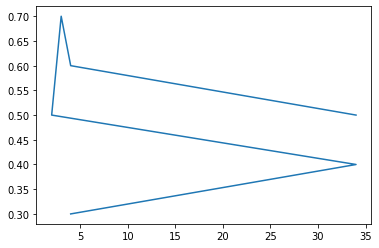

In [546]:
pyplot.plot(x,y)
pyplot.show()

In [45]:
Hi = Cross_over_mutation(20,30,40,50,512,1024)

9
10
10100
11110
101000
110010
After adding 0 bit
000010100
0000011110
000101000
0000110010
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
0b101010100
0b000000000
0b1000111010
0b1000110010


In [46]:
print(Hi)

(340, 570, 0, 562)


1000


10